In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


In [2]:
df= pd.read_csv("E:\customer_chrun.csv")
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
#removing the unwanted column 
df = df.drop(['columns4'], axis=1)


In [4]:
# Define the new column names
new_columns = [
    "State",
    "Account Length",
    "Area Code",
    "International Plan",
    "VMail Plan",
    "VMail Message",
    "Day Mins",
    "Day Calls",
    "Day Charge",
    "Eve Mins",
    "Eve Calls",
    "Eve Charge",
    "Night Mins",
    "Night Calls",
    "Night Charge",
    "International Mins",
    "International Calls",
    "International Charge",
    "CustServ Calls",
    "Churn"
]

# Replace the column names
df.columns = new_columns


In [5]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
df=df.drop_duplicates()
df.shape

(4617, 20)

NO duplicates where found so nothing was removed

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [8]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
int64
object
object
int64
float64
int64
float64
float64
int64
float64
float64
int64
float64
float64
int64
float64
int64
object


In [9]:
#Checking for null values
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

isnull() for Standard Missing Values:

Identifies standard representations of missing values such as NaN, None, and null.
Custom Missing Value Check:

Searches for additional placeholders for missing values (e.g., "NA", "N/A", "null", " ").
Combine Results:

Combines the counts of standard and custom missing values to calculate the total missing count.
Output:

Displays a summary showing the count of missing values (both standard and additional) for each column.

In [11]:
import pandas as pd
import numpy as np

def check_missing_values(data):
    # Standard missing values
    missing_count = data.isnull().sum()
    
    # Check for other representations of missing values
    other_missing_values = ["", " ", "NA", "N/A", "n/a", "null", "NULL", "NaN", "nan", "-", "--"]
    
    additional_missing = pd.DataFrame({
        col: data[col].apply(lambda x: x in other_missing_values).sum()
        for col in data.columns
    }, index=["Other Missing Count"]).T
    
    # Combine both checks
    total_missing = pd.DataFrame({
        "Standard Missing Count": missing_count,
        "Other Missing Count": additional_missing["Other Missing Count"],
        "Total Missing Count": missing_count + additional_missing["Other Missing Count"]
    })
    
    print("Summary of Missing Values:")
    print(total_missing)
    return total_missing

# Call the function on your dataset
missing_summary = check_missing_values(data)


Summary of Missing Values:
                      Standard Missing Count  Other Missing Count  \
State                                      0                    0   
Account Length                             0                    0   
Area Code                                  0                    0   
International Plan                         0                    0   
VMail Plan                                 0                    0   
VMail Message                              0                    0   
Day Mins                                   0                    0   
Day Calls                                  0                    0   
Day Charge                                 0                    0   
Eve Mins                                   0                    0   
Eve Calls                                  0                    0   
Eve Charge                                 0                    0   
Night Mins                                 0                    0   
Night C

In [12]:
data=df.copy()

In [13]:
data.nunique()


State                     51
Account Length           218
Area Code                  3
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International Calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [14]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       State  Account Length    Area Code International Plan VMail Plan  \
count   4617     4617.000000  4617.000000               4617       4617   
unique    51             NaN          NaN                  2          2   
top       WV             NaN          NaN                 no         no   
freq     149             NaN          NaN               4171       3381   
mean     NaN      100.645224   437.046350                NaN        NaN   
std      NaN       39.597194    42.288212                NaN        NaN   
min      NaN        1.000000   408.000000                NaN        NaN   
25%      NaN       74.000000   408.000000                NaN        NaN   
50%      NaN      100.000000   415.000000                NaN        NaN   
75%      NaN      127.000000   510.000000                NaN        NaN   
max      NaN      243.000000   510.000000                NaN        NaN   

        VMail Message     Day Mins    Day Calls   Day Charge     Eve Mins  \
count     4617.000000 

In [15]:
data['State'] = data['State'].str.strip()  # Remove leading/trailing spaces


In [16]:
data['International Plan'] = data['International Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['VMail Plan'] = data['VMail Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['State'] = data['State'].str.replace(r'[,.:;]', '', regex=True).str.strip()

In [17]:
# Apply Label Encoding
for col in ['International Plan', 'VMail Plan']:
    data[col] = LabelEncoder().fit_transform(data[col])

In [18]:
# Frequency Encoding
for col in ['State']:
    freq = data[col].value_counts() / len(data)
    data[col] = data[col].map(freq)

In [19]:
import pandas as pd

def verify_and_correct_frequency_encoding(data, column):
    # Step 1: Recompute frequency encoding
    recomputed_freq = data[column].value_counts() / len(data)
    
    # Step 2: Map the recomputed values to a new column
    recomputed_encoded = data[column].map(recomputed_freq)
    
    # Step 3: Compare original and recomputed values
    mismatches = data[data[column] != recomputed_encoded]
    
    # Step 4: Print mismatched rows (if any)
    if not mismatches.empty:
        print(f"Mismatched values found in column '{column}':")
        print(mismatches[[column]])
        print("\nRecomputing correct encoding...")
        data[column] = recomputed_encoded
        print(f"Corrected the encoding for column '{column}'.")
    else:
        print(f"No mismatches found in column '{column}'.")
    
    return data

# Verify and correct frequency encoding for 'State'
data = verify_and_correct_frequency_encoding(data, 'State')


Mismatched values found in column 'State':
         State
1     0.023825
2     0.022959
3     0.023825
4     0.017327
7     0.018194
...        ...
4611  0.017111
4612  0.023608
4613  0.018194
4614  0.020576
4616  0.019277

[2893 rows x 1 columns]

Recomputing correct encoding...
Corrected the encoding for column 'State'.


In [21]:
# Check unique values in the columns that were encoded
for col in ['International Plan', 'VMail Plan', 'Churn']:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'International Plan': [0 1]
Unique values in column 'VMail Plan': [1 0]
Unique values in column 'Churn': [' False.' ' True.']


In [22]:
data.head(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,0.020793,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,0.047650,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0.045917,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0.047650,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0.034655,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,0.024691,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,0.021009,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,0.036387,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,0.015811,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,0.032272,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [23]:
# Convert 'True' and 'False' to 1 and 0, respectively
data['Chrun']=data['Churn'].map({' True.': 1, ' False.': 0})

In [24]:
data

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.020793,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,0.047650,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,0.045917,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,0.047650,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,0.034655,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.047217,57,510,0,1,25,144.0,81,24.48,187.2,...,15.91,158.6,122,7.14,8.5,6,2.30,3,False.,0
4613,0.036387,177,408,0,1,29,189.0,91,32.13,303.1,...,25.76,163.6,116,7.36,15.7,1,4.24,3,False.,0
4614,0.041152,67,408,0,1,33,127.5,126,21.68,296.1,...,25.17,200.9,91,9.04,13.0,3,3.51,1,False.,0
4615,0.021226,98,415,0,1,23,168.9,98,28.71,226.3,...,19.24,165.5,96,7.45,14.3,3,3.86,0,False.,0


In [27]:

# Drop the 'Churn' column
data = data.drop(columns=['Churn'])

# Verify the result
print(data.head())


      State  Account Length  Area Code  International Plan  VMail Plan  \
0  0.020793             128        415                   0           1   
1  0.047650             107        415                   0           1   
2  0.045917             137        415                   0           0   
3  0.047650              84        408                   1           0   
4  0.034655              75        415                   1           0   

   VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve Charge  Night Mins  Night Calls  Night Charge  International Mins  \
0       16.78       244.7         

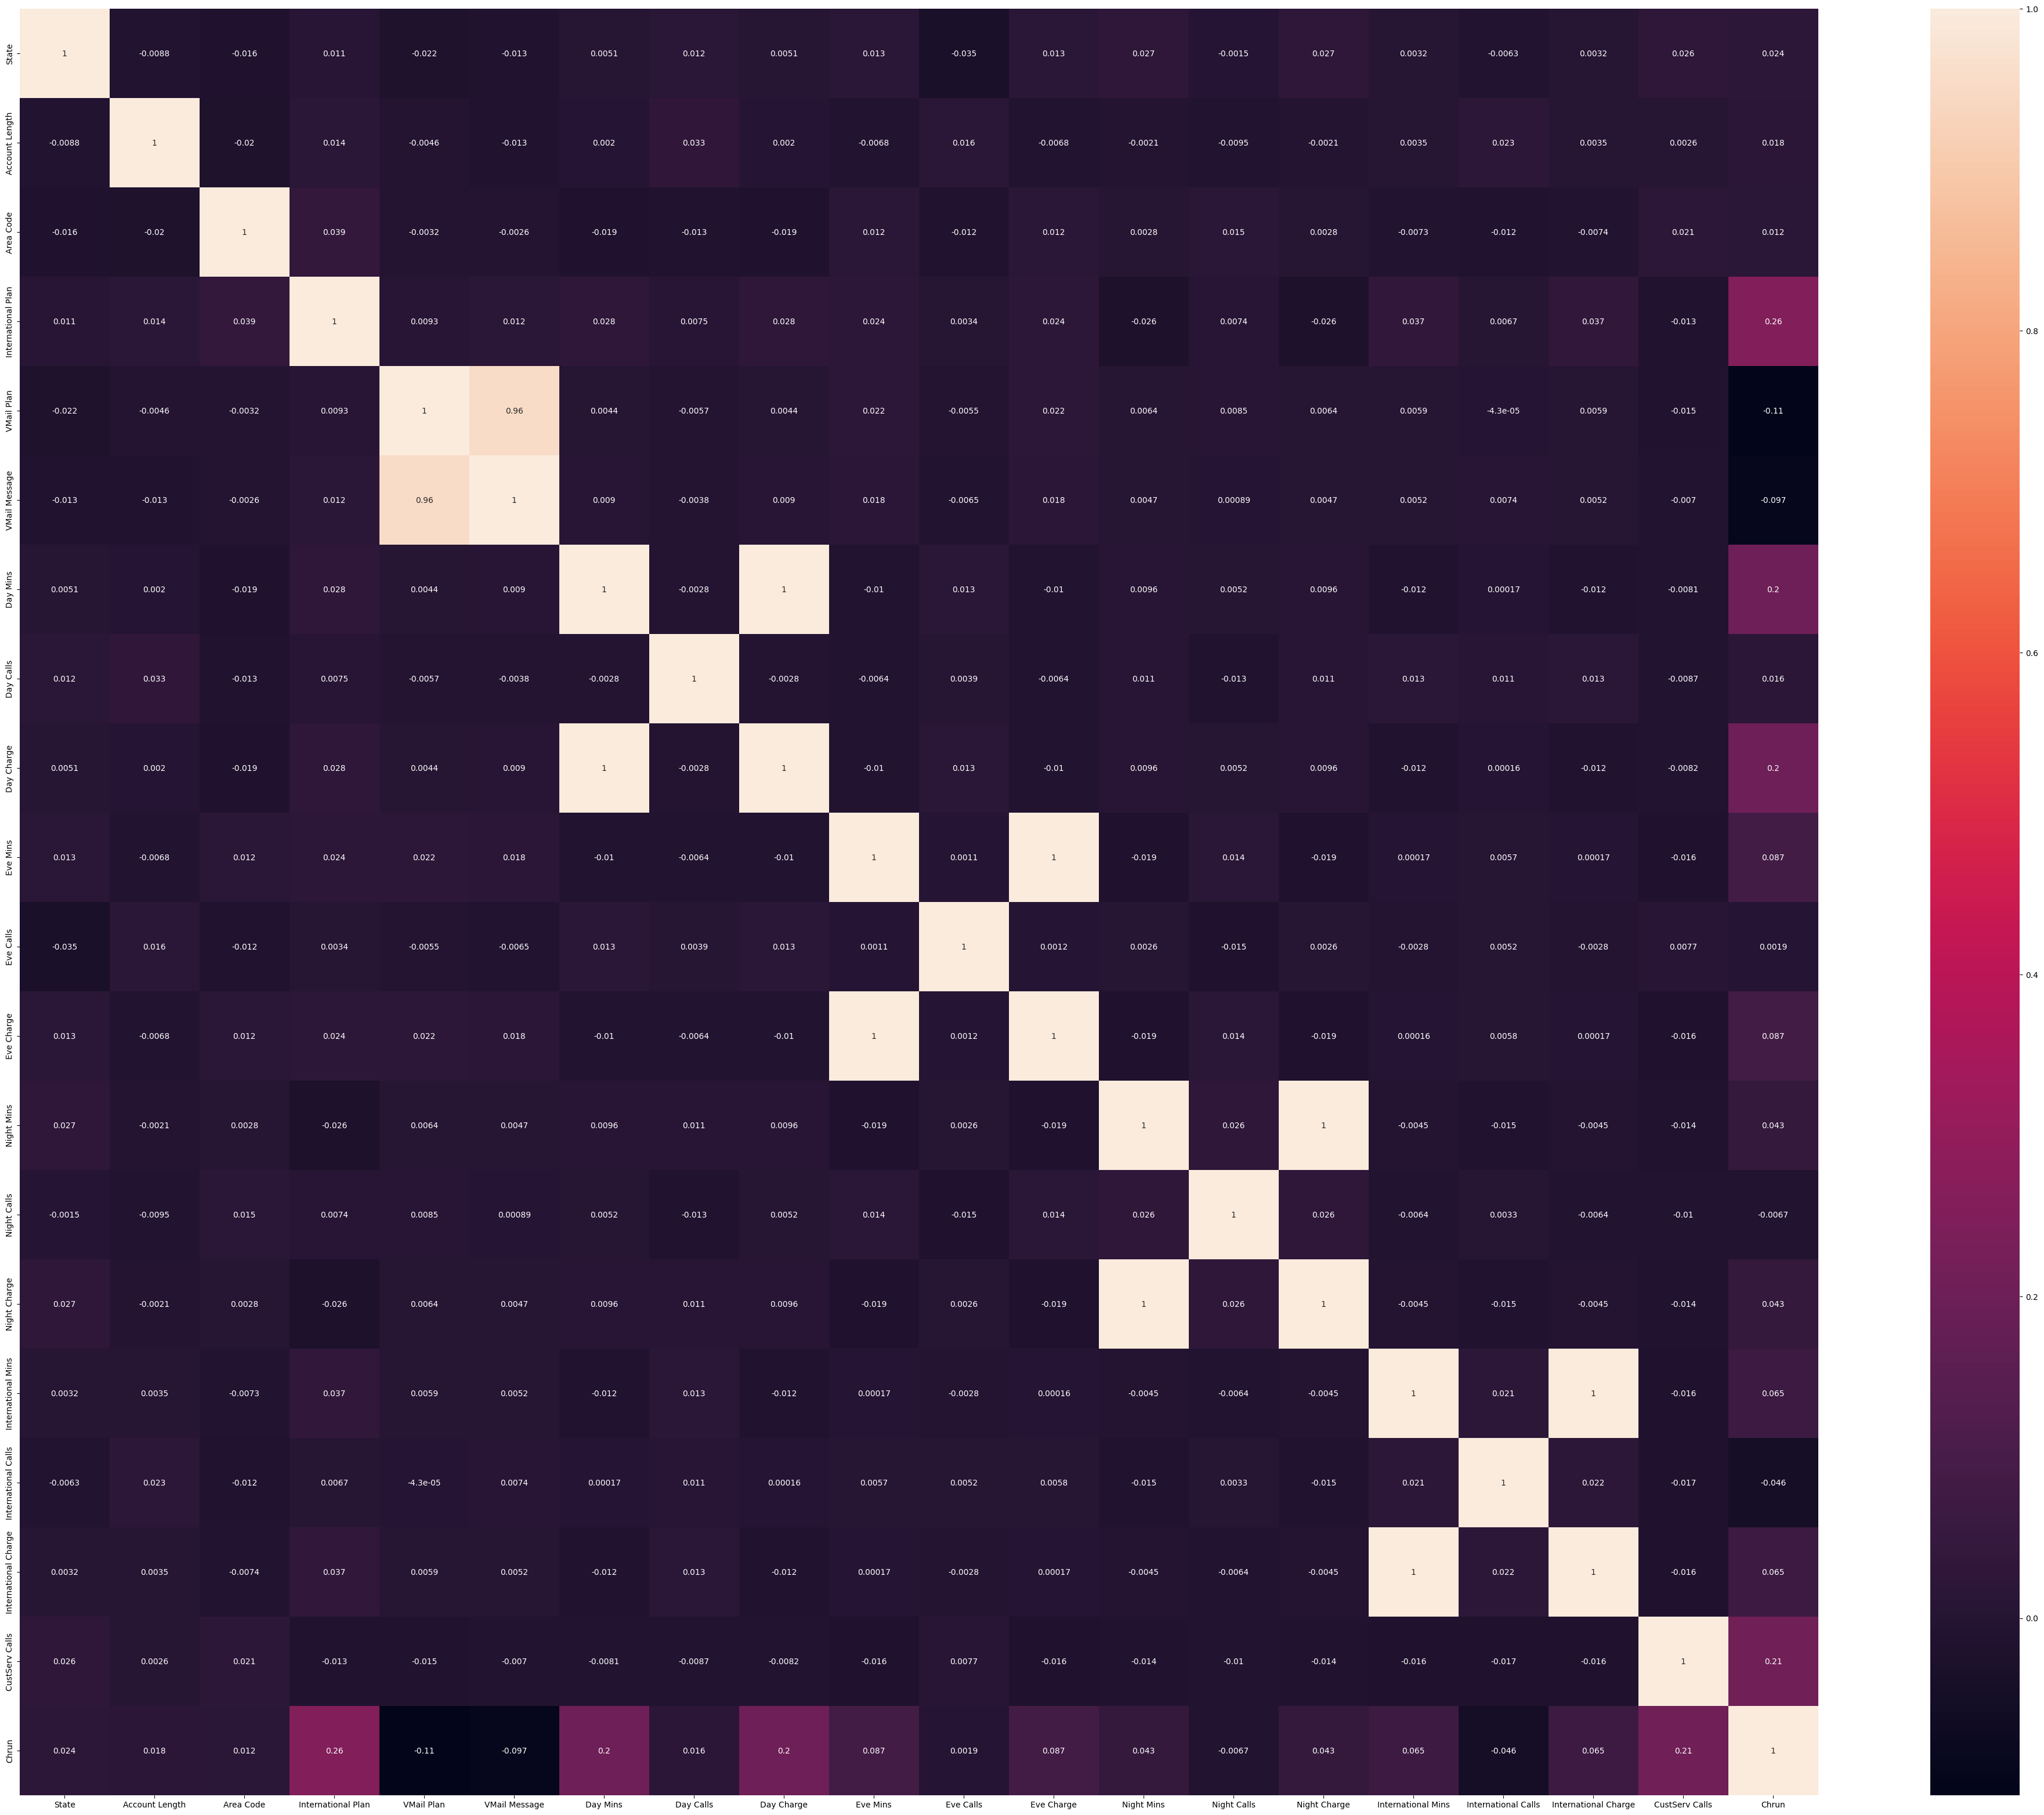

In [32]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(70,40)
plt.show()

Ignoring the columns which have negative corealtion 
'VMail Plan','VMail Message','Night Calls','International Calls'

In [33]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')

In [34]:
data = data.drop(['VMail Plan', 'VMail Message', 'Night Calls', 'International Calls'], axis=1)

In [35]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')

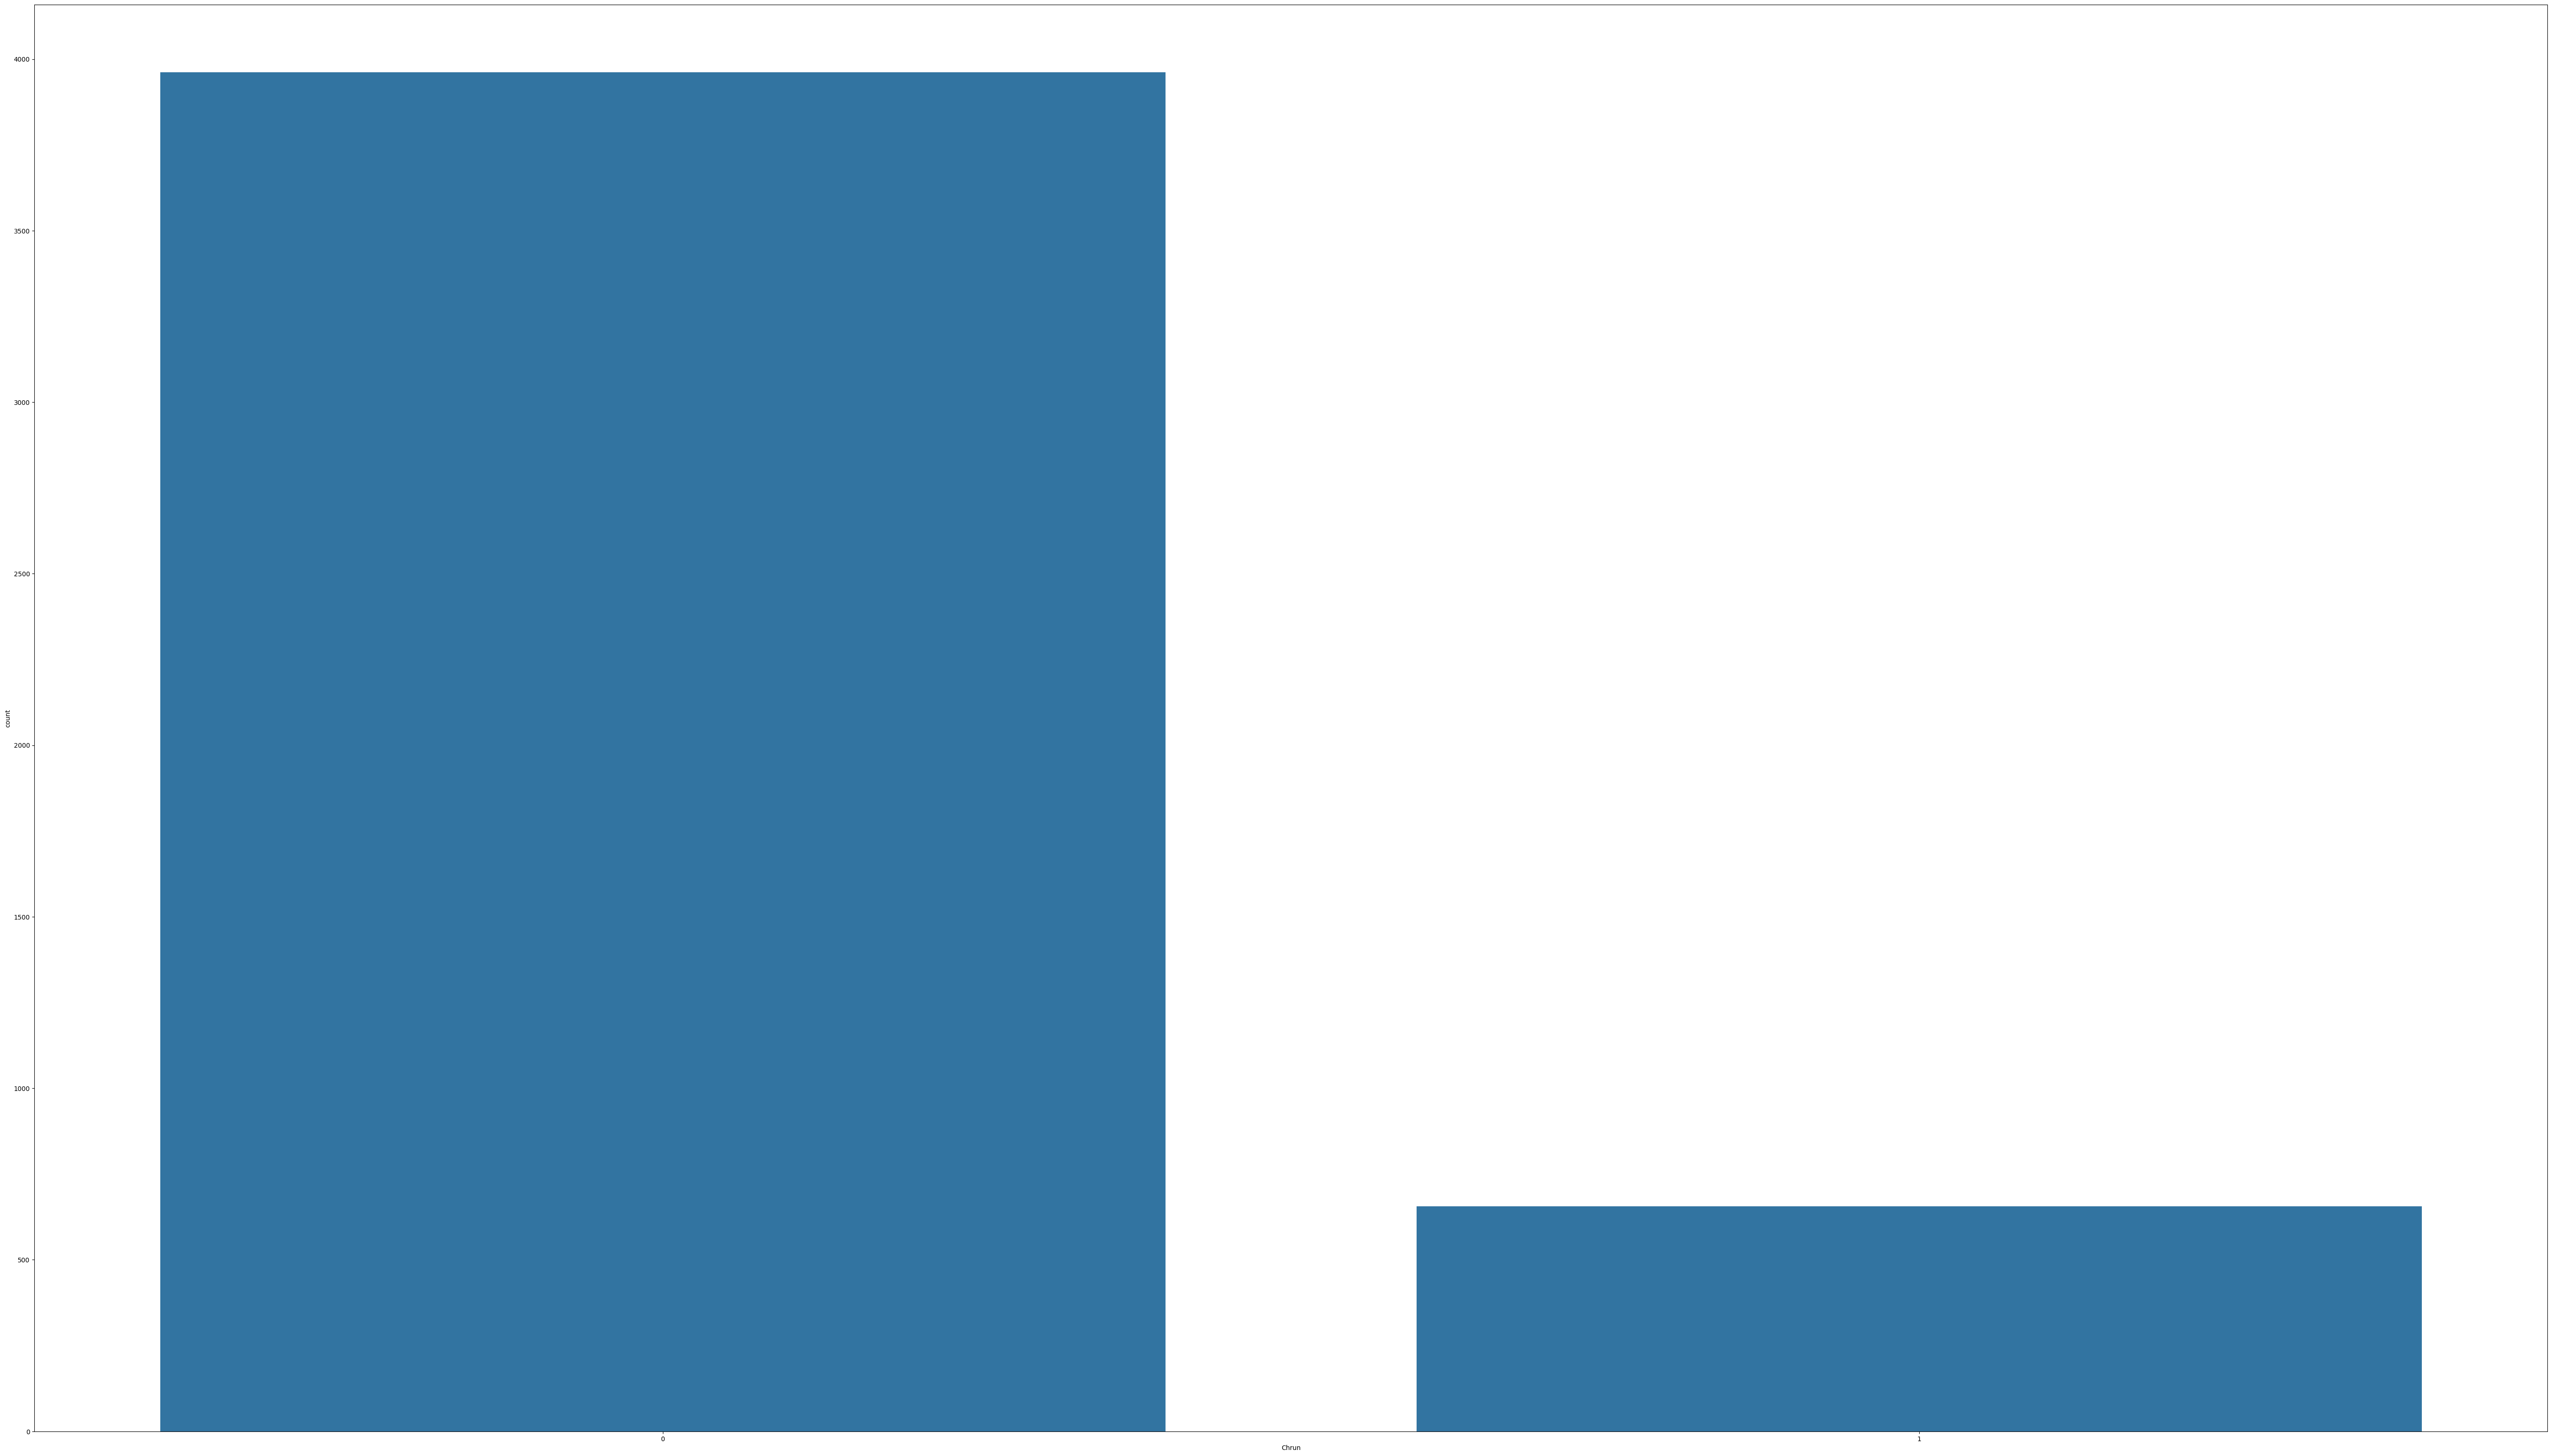

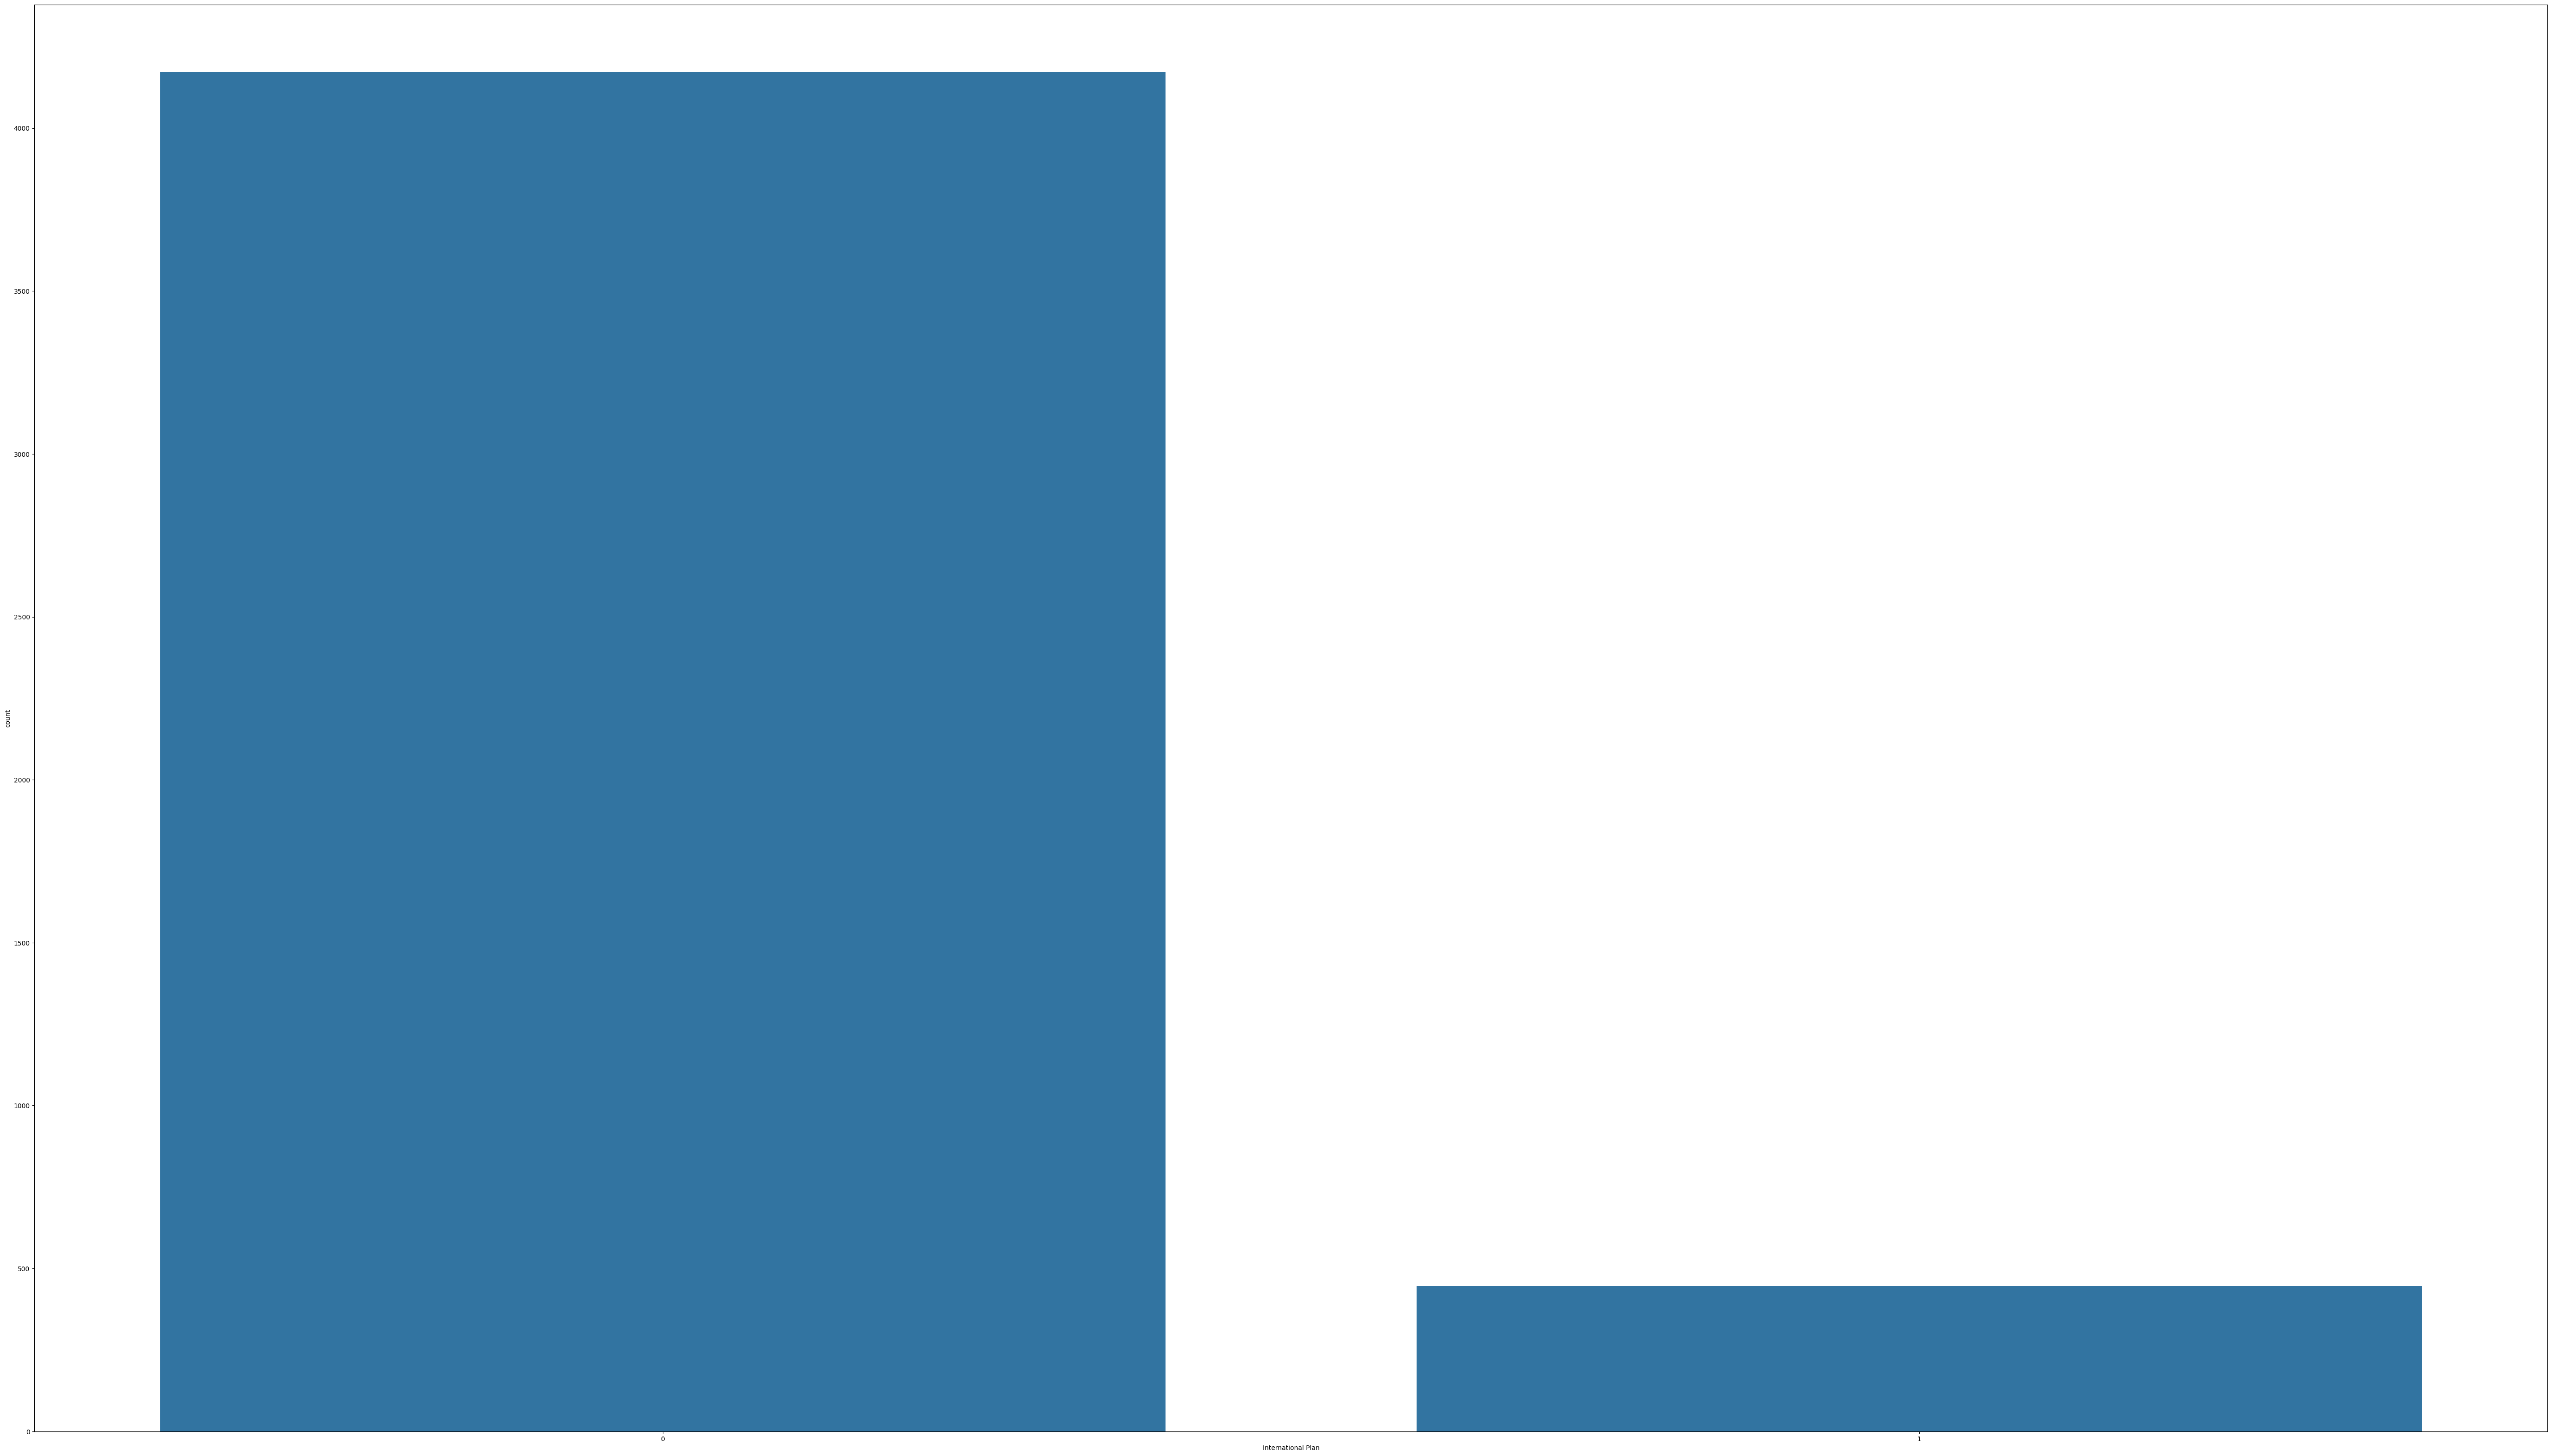

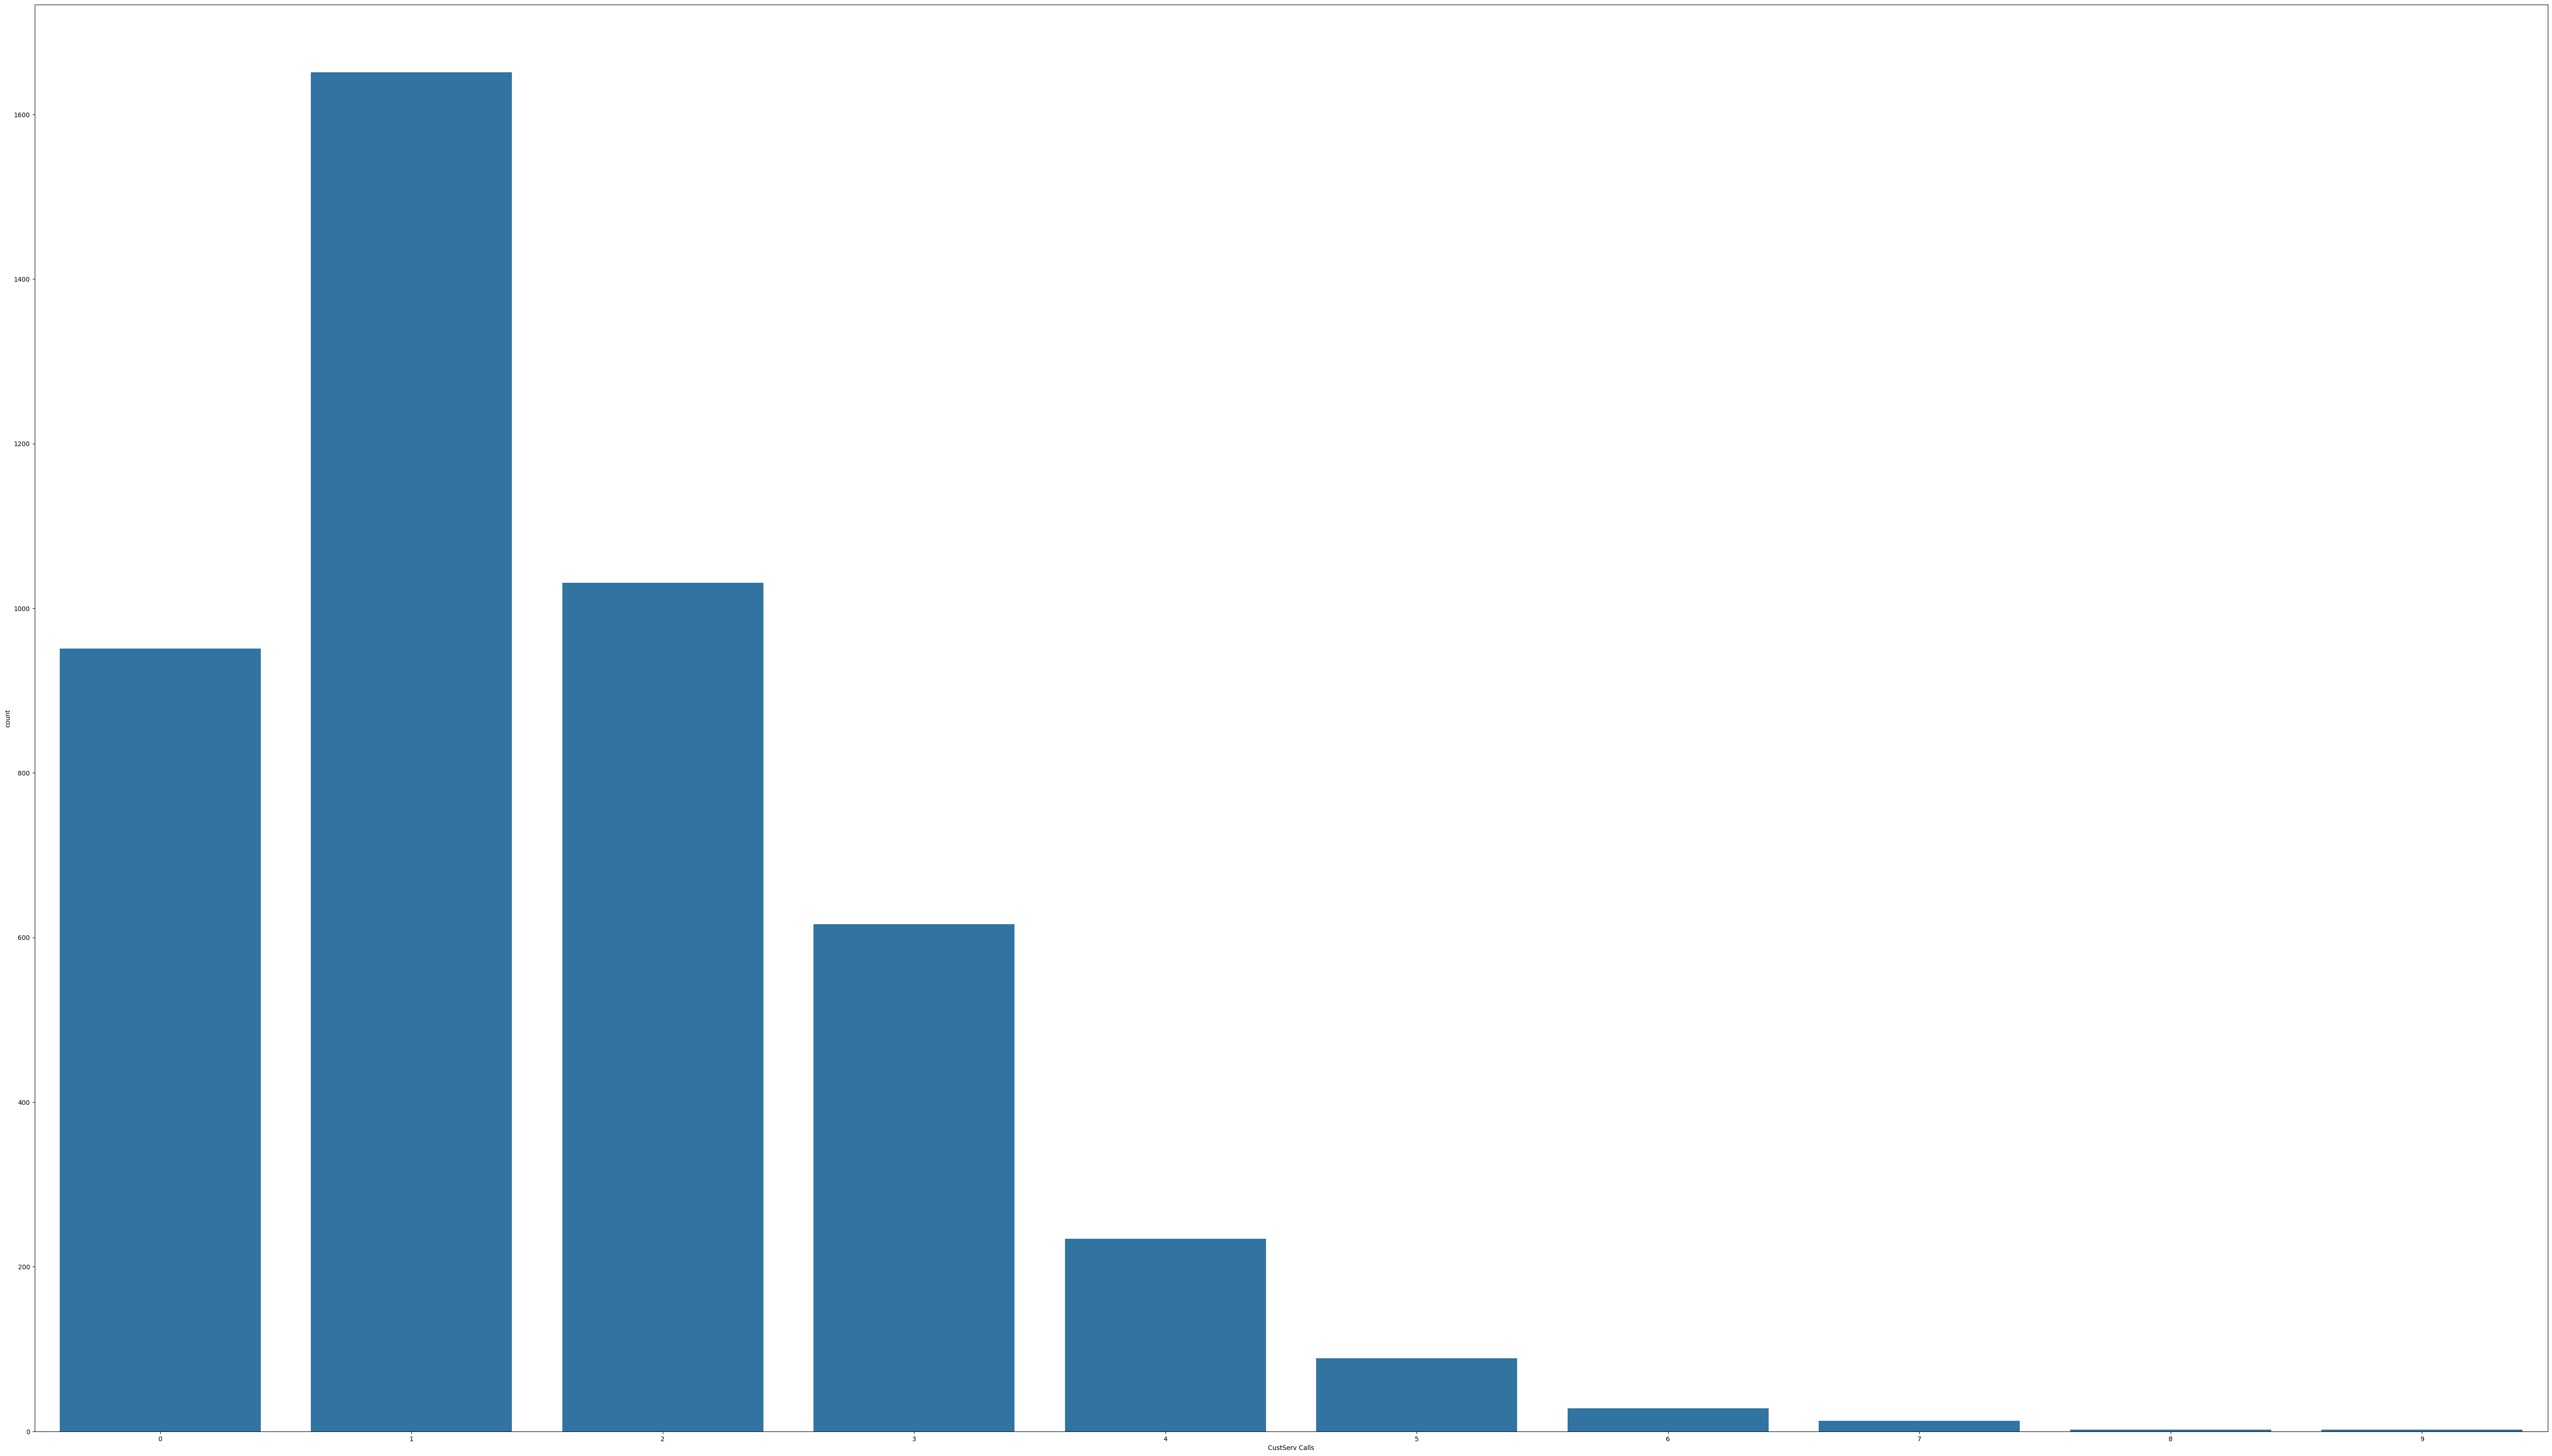

In [37]:
sns.countplot(x='Chrun', data=data)
plt.show()
sns.countplot(x='International Plan', data=data)
plt.show()
sns.countplot(x='CustServ Calls', data=data)
plt.show()


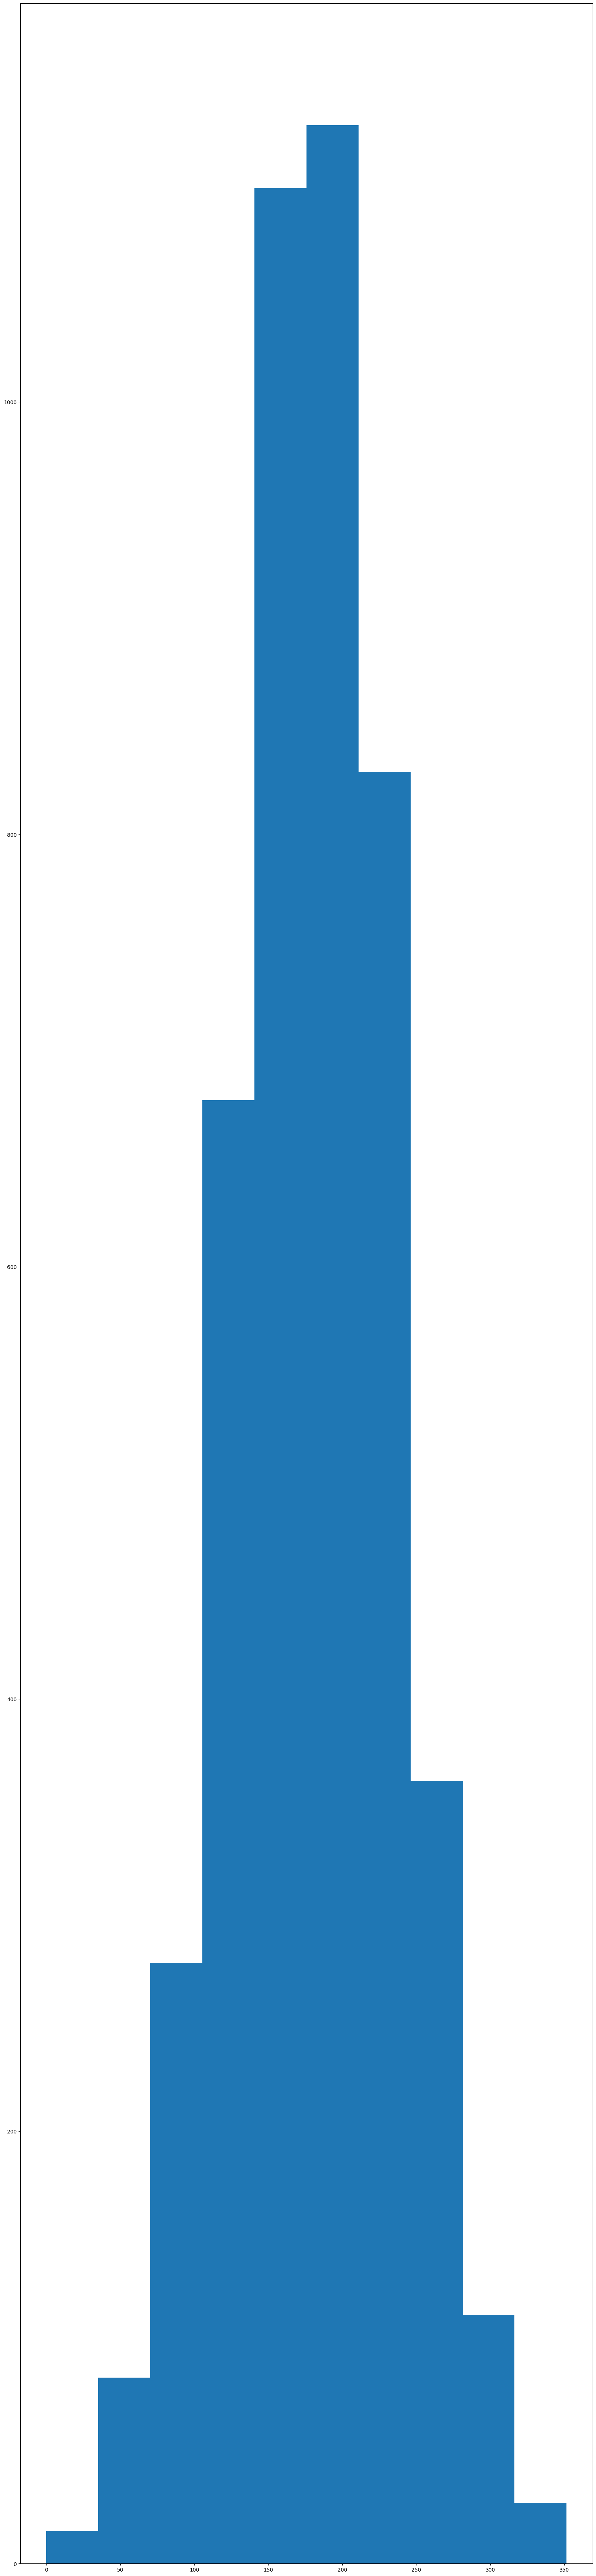

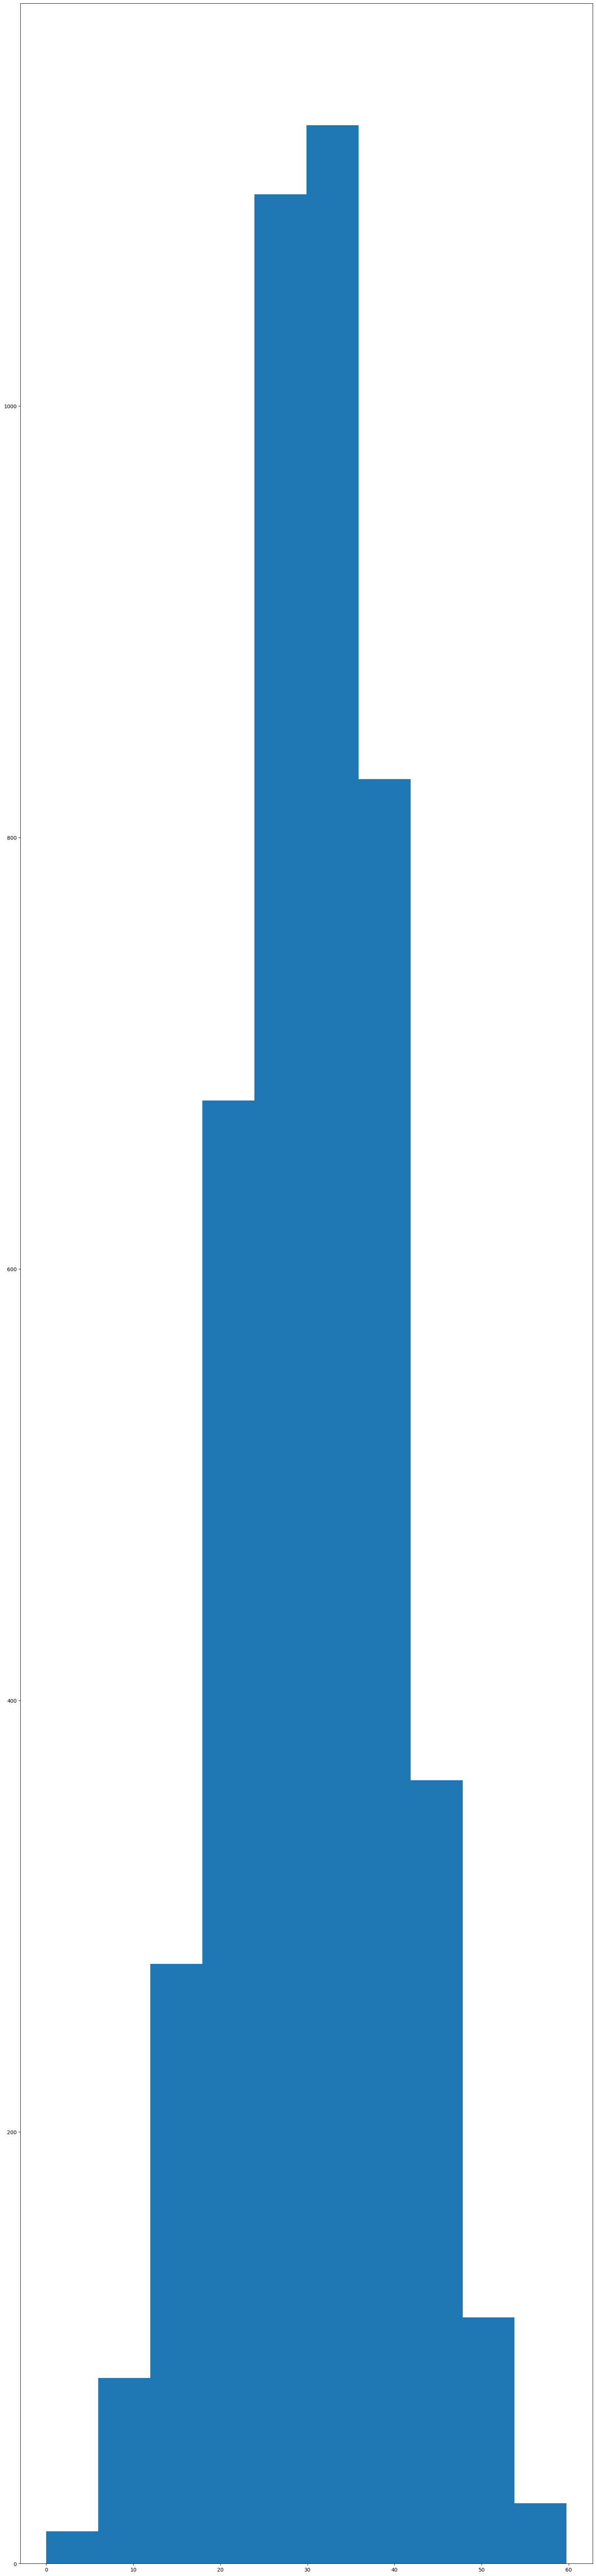

In [31]:
plt.hist(data['Day Mins'])
plt.show()
plt.hist(data['Day Charge'])
plt.show()

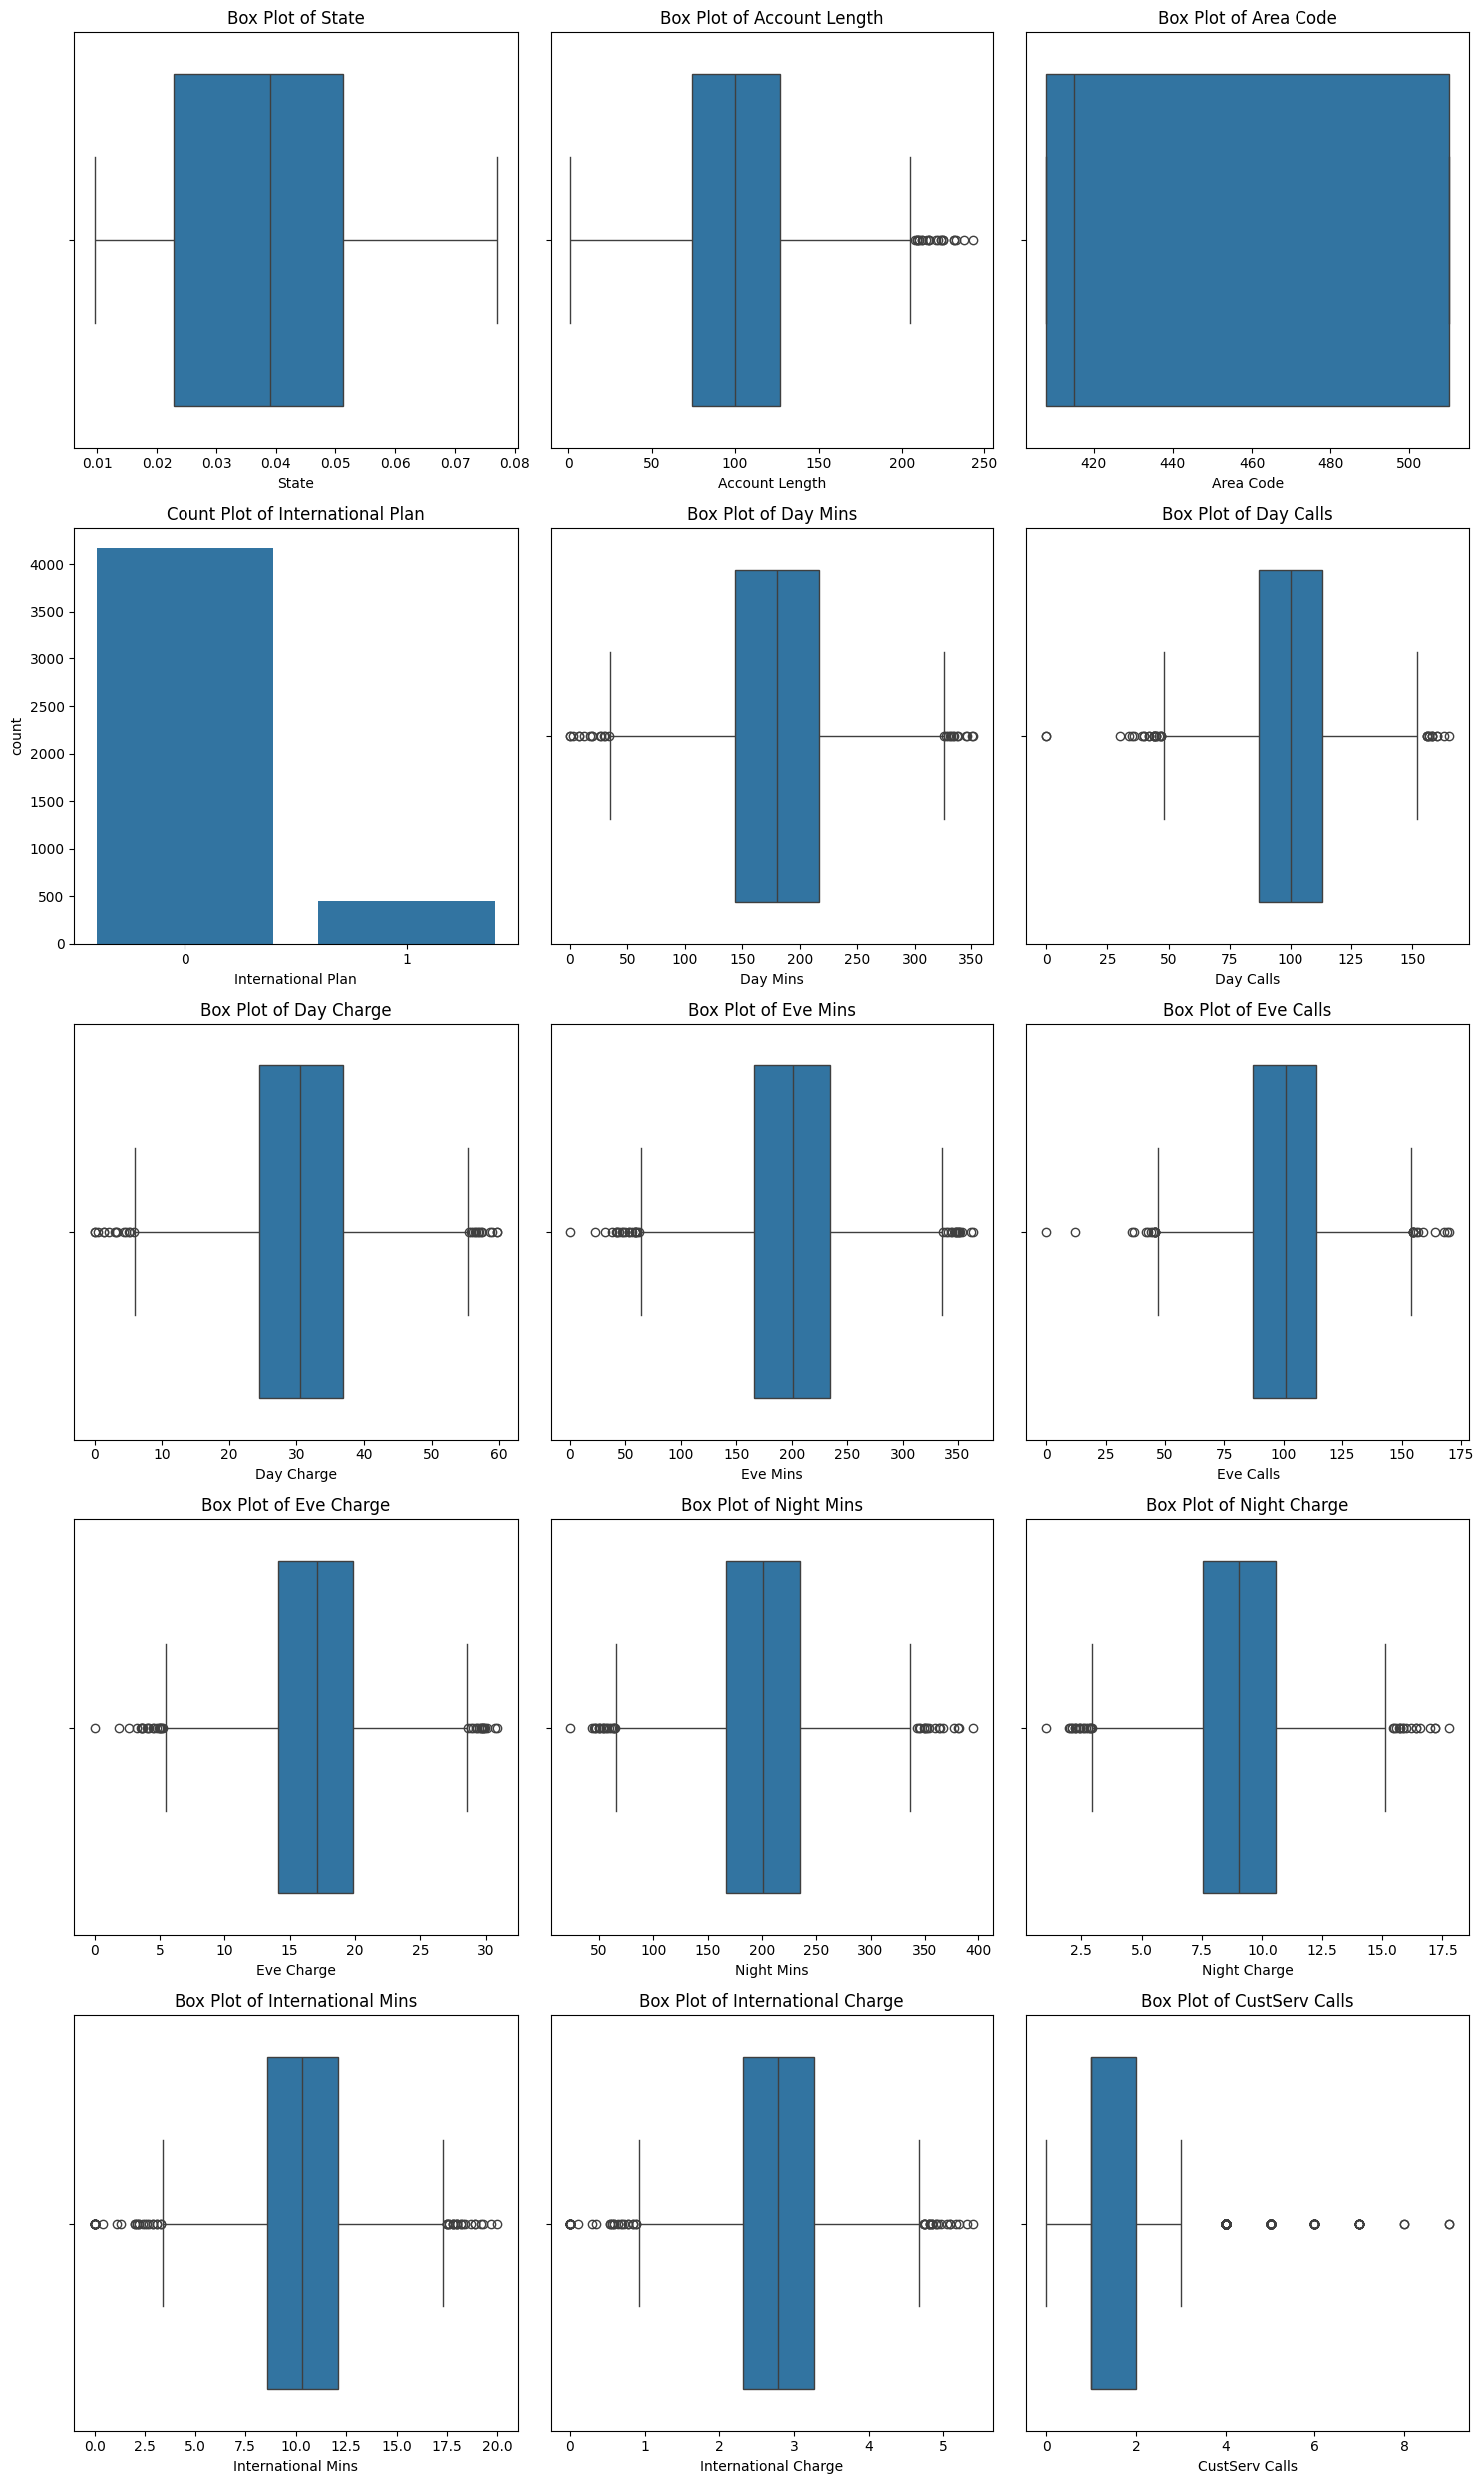

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which box plots need to be created
columns = [
    'State', 'Account Length', 'Area Code', 'International Plan',
    'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
    'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
    'International Charge', 'CustServ Calls',
]

# Number of columns to display per row in the plot grid
columns_per_row = 3

# Calculate the number of rows needed
num_rows = (len(columns) + columns_per_row - 1) // columns_per_row

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    # Plotting only numerical columns, skip non-numeric ones
    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col])
    else:
        sns.countplot(x=data[col])  # Use countplot for categorical variables
    plt.title(f'Box Plot of {col}' if data[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Quantile Calculation:

𝑄
1
Q1 (25th percentile) and 
𝑄
3
Q3 (75th percentile) are calculated for each numeric column.
The IQR is computed as 
𝑄
3
−
𝑄
1
Q3−Q1.
Outlier Detection:

Outliers are defined as values outside the range 
[
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR].
Result Summary:

For each column, the function prints the lower and upper bounds, the count of outliers, and the actual outlier values.
Output:

The function returns a dictionary (outlier_summary) where you can access the detailed analysis for each column.

'International Plan', 'Churn' not included as these are categorical columns which also tend to have the unbalnced data.

In [39]:
import pandas as pd

def analyze_outliers_iqr(data, columns):
    outlier_summary = {}
    
    for column in columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            Q1 = data[column].quantile(0.25)  # First Quartile
            Q3 = data[column].quantile(0.75)  # Third Quartile
            IQR = Q3 - Q1  # Interquartile Range
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            outlier_count = len(outliers)
            
            # Store the analysis in a dictionary
            outlier_summary[column] = {
                "Lower Bound": lower_bound,
                "Upper Bound": upper_bound,
                "Number of Outliers": outlier_count,
                "Outliers": outliers[[column]]
            }
            
            print(f"\nColumn: {column}")
            print(f"Lower Bound: {lower_bound}")
            print(f"Upper Bound: {upper_bound}")
            print(f"Number of Outliers: {outlier_count}")
            print("Outliers:")
            print(outliers[[column]])
            
    return outlier_summary

# List of columns to analyze (numeric columns only)
columns_to_check = [
    "State", "Account Length", "Area Code", "Day Mins", "Day Calls", "Day Charge",
    "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Charge", 
    "International Mins", "International Charge", "CustServ Calls"
]

# Call the function on your dataset
outlier_analysis = analyze_outliers_iqr(data, columns_to_check)



Column: State
Lower Bound: -0.02014294996751137
Upper Bound: 0.09421702404158544
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [State]
Index: []

Column: Account Length
Lower Bound: -5.5
Upper Bound: 206.5
Number of Outliers: 23
Outliers:
      Account Length
197              208
238              215
309              209
416              224
817              243
1045             217
1093             210
1387             212
1408             232
1551             225
1751             225
1886             224
2150             212
2259             210
2277             217
2700             209
3216             221
3227             209
4260             238
4342             216
4379             222
4389             232
4395             233

Column: Area Code
Lower Bound: 255.0
Upper Bound: 663.0
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Area Code]
Index: []

Column: Day Mins
Lower Bound: 34.049999999999955
Upper Bound: 326.45000000000005
Number of Outliers: 27
Outl

In [40]:
# import pandas as pd
# from scipy.stats.mstats import winsorize
# import matplotlib.pyplot as plt

# # Define the columns to Winsorize
# columns_to_winsorize = [
#     'State', 'Account Length', 'Area Code', 'International Plan',
#     'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
#     'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
#     'Night Charge', 'International Mins', 'International Calls',
#     'International Charge', 'CustServ Calls'
# ]

# # Define the percentile limits for Winsorization (e.g., 1% and 99%)
# lower_limit = 0.05  # Lower 5%
# upper_limit = 0.05  # Upper 5% (complement for 95%)

# # Apply Winsorization
# for col in columns_to_winsorize:
#     if col in data.columns:  # Ensure the column exists in the dataset
#         try:
#             # Winsorize the column
#             data[col] = winsorize(data[col], limits=(lower_limit, upper_limit))
#         except Exception as e:
#             print(f"Error processing column {col}: {e}")

# # Visualize Before and After Winsorization
# plt.figure(figsize=(15, 7))

# # Before Winsorization (if you have the original data backed up)
# plt.subplot(1, 2, 1)
# data[columns_to_winsorize].boxplot(rot=90)
# plt.title('Before Winsorization')

# # After Winsorization
# plt.subplot(1, 2, 2)
# data[columns_to_winsorize].boxplot(rot=90)
# plt.title('After Winsorization')
# plt.tight_layout()
# plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16096\3487166172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')  # Customize palette


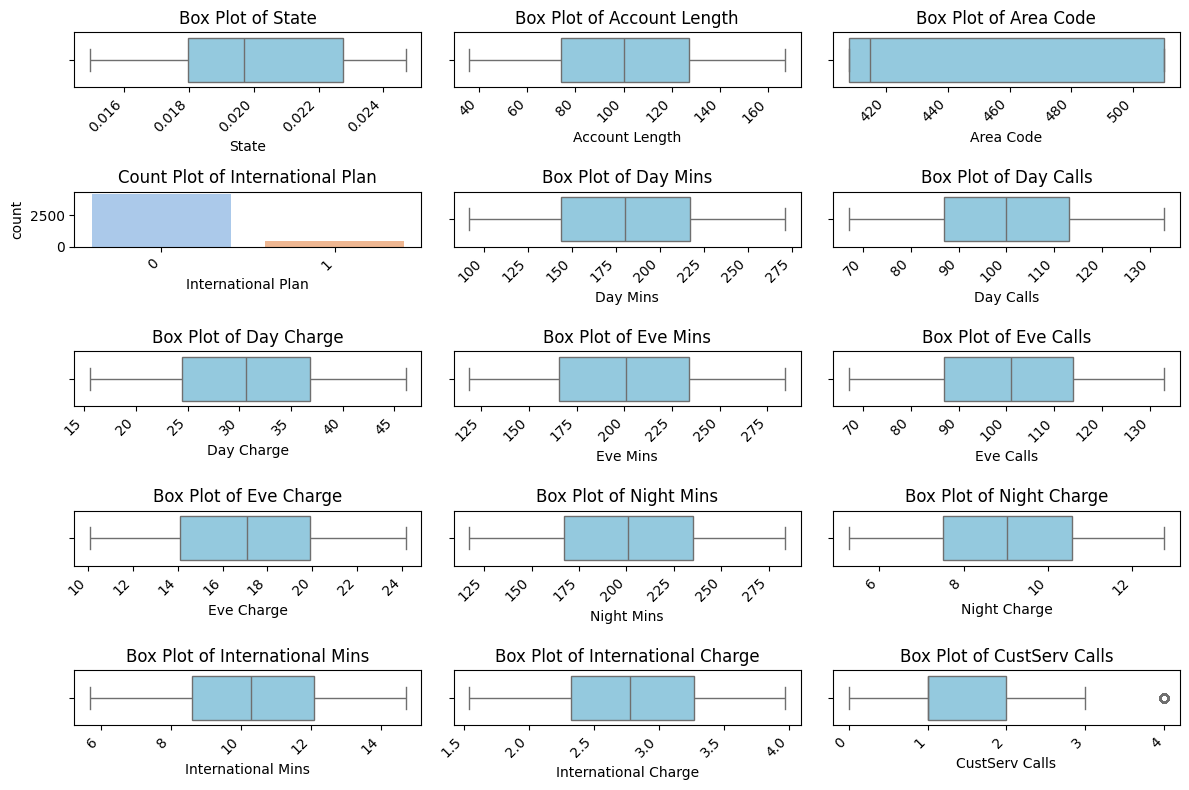

In [25]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)

    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data[col], color='skyblue')  # Customize color
    else:
        sns.countplot(x=data[col], palette='pastel')  # Customize palette

    plt.title(f'Box Plot of {col}' if data[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout for better spacing
plt.show() 

C:\Users\user\AppData\Local\Temp\ipykernel_18192\3907456891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.index, y=churn_corr.values, palette="coolwarm")


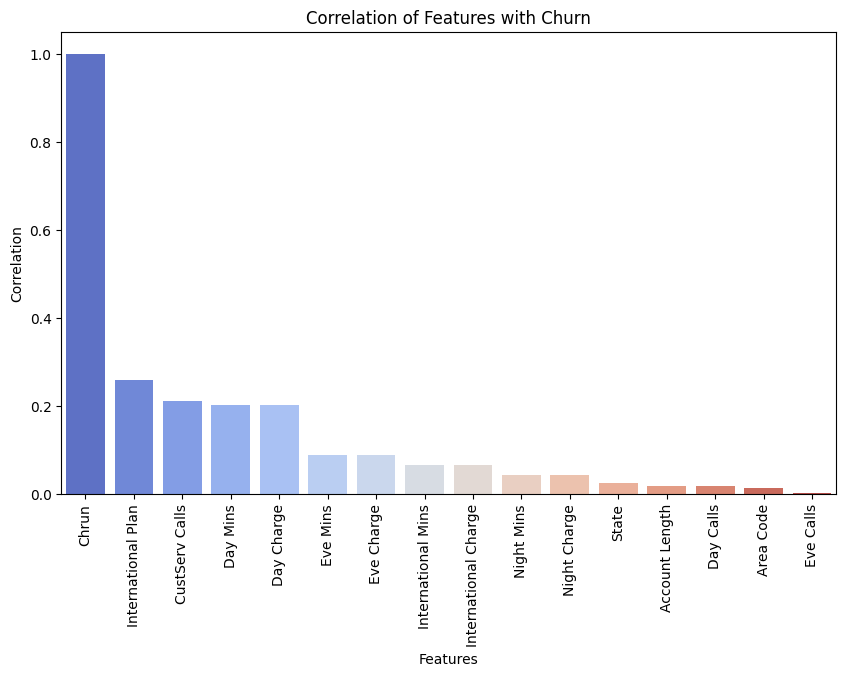

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation of all variables with 'Churn'
churn_corr = data.corr()['Chrun'].sort_values(ascending=False)

# Plot a bar graph to highlight the correlation of variables with 'Churn'
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_corr.index, y=churn_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation of Features with Churn")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.show()


Examine the relationships between key variables  call duration, charges, and international plans.check how the presence of an International Plan affects the relationship between Day Mins and Day Charges.


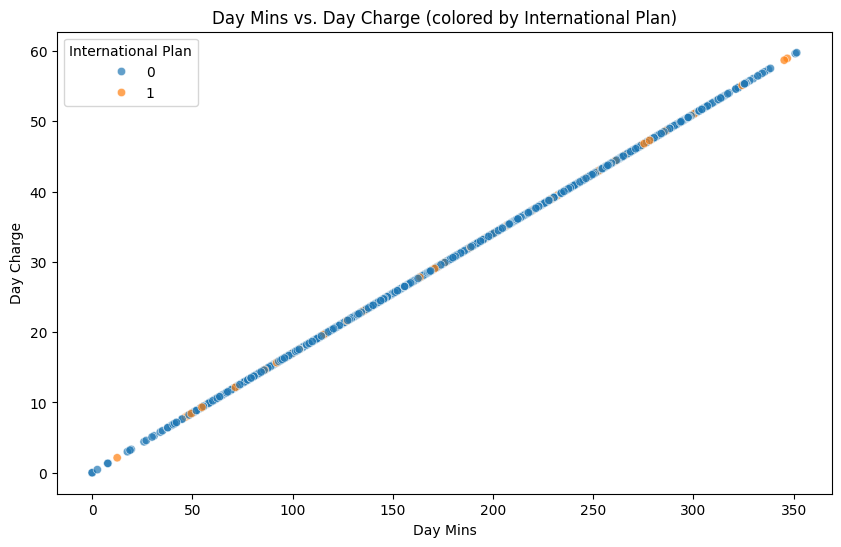

In [44]:
# Scatterplot to examine interaction between Day Mins and Day Charges, separated by International Plan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day Mins', y='Day Charge', hue='International Plan', alpha=0.7)
plt.title("Day Mins vs. Day Charge (colored by International Plan)")
plt.xlabel("Day Mins")
plt.ylabel("Day Charge")
plt.legend(title="International Plan")
plt.show()


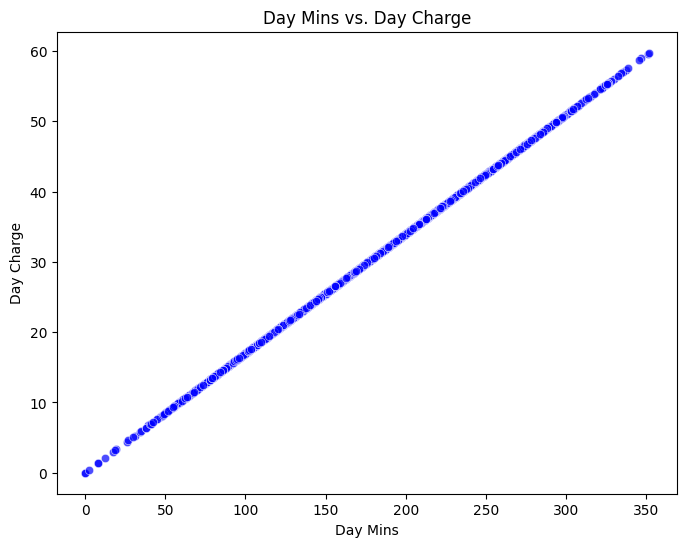

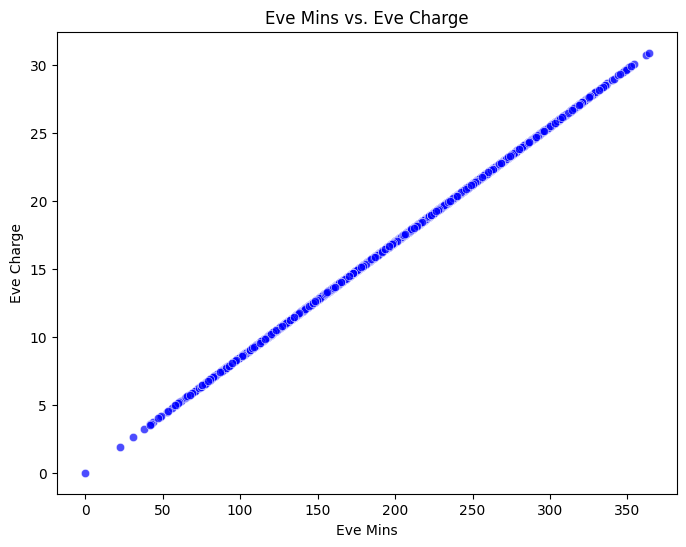

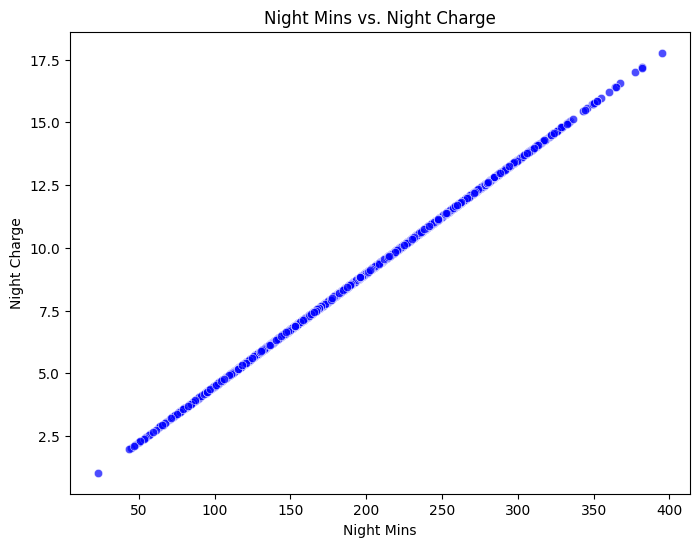

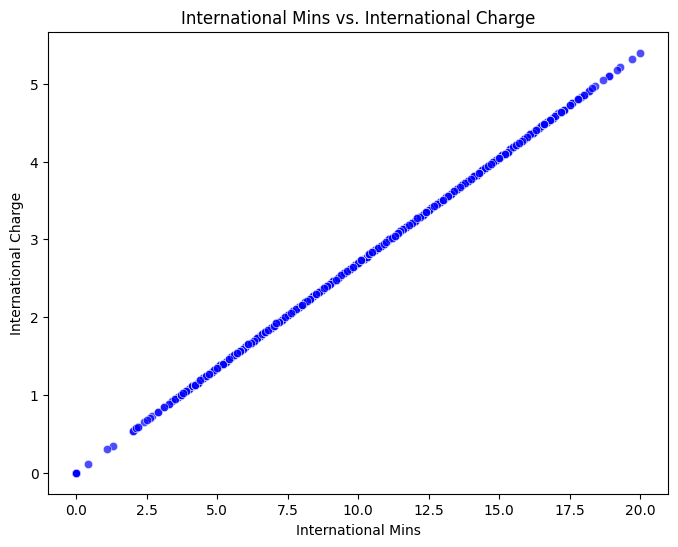

In [46]:
# Define a list of variable pairs with strong correlations
strong_pairs = [
    ('Day Mins', 'Day Charge'),
    ('Eve Mins', 'Eve Charge'),
    ('Night Mins', 'Night Charge'),
    ('International Mins', 'International Charge')
]

# Create scatter plots for each pair
for x, y in strong_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, alpha=0.7, color="blue")
    plt.title(f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


By going though the data and understanding hoe each column is imapcting the process, I have decided that there is "no need to remove outliers" from any columns.

In [50]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')

In [51]:
data = data.rename(columns={'Churn': 'Chrun'})

C:\Users\user\AppData\Local\Temp\ipykernel_18192\1573477109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Chrun', y='Day Mins', palette="coolwarm")


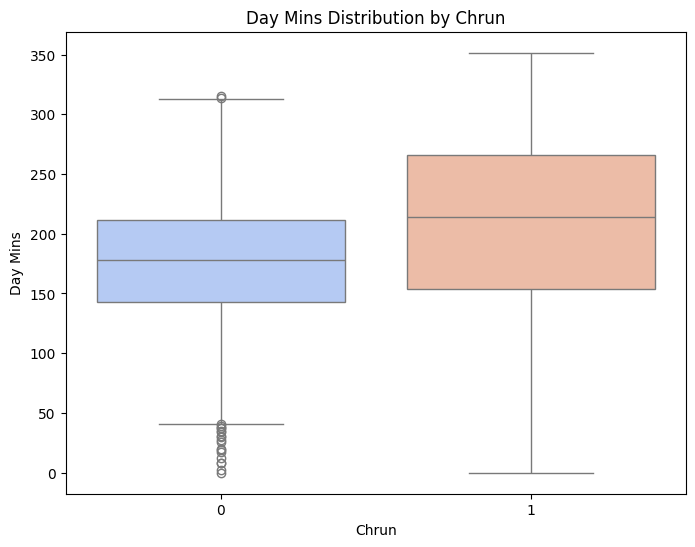

In [53]:
# Boxplot of Day Mins by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Chrun', y='Day Mins', palette="coolwarm")
plt.title("Day Mins Distribution by Chrun")
plt.xlabel("Chrun")
plt.ylabel("Day Mins")
plt.show()


Shapiro-Wilk Test:
The Shapiro-Wilk test is a statistical test used to check whether a sample of data is drawn from a normally distributed population. It tests the null hypothesis:

Null Hypothesis (H₀): The data follows a normal distribution.
Alternative Hypothesis (H₁): The data does not follow a normal distribution.
Steps to Perform Shapiro-Wilk Test:

Compute the test statistic and p-value for each numerical column in the dataset.
Compare the p-value with a significance level (commonly 0.05):
If p-value > 0.05, we fail to reject H₀ (the data is likely normal).
If p-value <= 0.05, we reject H₀ (the data is not normal).

In [57]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np

# Function to perform Shapiro-Wilk test only on numerical columns
def shapiro_test_on_data(data):
    results = []
    for i, column_data in enumerate(data):
        # Check if column data is numeric
        if np.issubdtype(column_data.dtype, np.number):
            # Perform the Shapiro-Wilk test
            test_stat, p_value = shapiro(column_data)
            results.append({
                'Index': i,
                'Shapiro-Wilk Test Statistic': test_stat,
                'p-value': p_value,
                'Result': 'Normal Distribution' if p_value > 0.05 else 'Not Normal Distribution'
            })
        else:
            results.append({
                'Index': i,
                'Shapiro-Wilk Test Statistic': None,
                'p-value': None,
                'Result': 'Non-Numeric Data'
            })

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Apply the Shapiro-Wilk test
shapiro_results = shapiro_test_on_data(data)

# Display results
print(shapiro_results)


AttributeError: 'str' object has no attribute 'dtype'

In [59]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np

# Function to perform Shapiro-Wilk test only on numerical columns
def shapiro_test_on_data(data):
    results = []
    for column in data.columns:
        # Check if column is numeric
        if np.issubdtype(data[column].dtype, np.number):
            # Perform the Shapiro-Wilk test
            test_stat, p_value = shapiro(data[column])
            results.append({
                'Column': column,
                'Shapiro-Wilk Test Statistic': test_stat,
                'p-value': p_value,
                'Result': 'Normal Distribution' if p_value > 0.05 else 'Not Normal Distribution'
            })
        else:
            results.append({
                'Column': column,
                'Shapiro-Wilk Test Statistic': None,
                'p-value': None,
                'Result': 'Non-Numeric Data'
            })

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Apply the Shapiro-Wilk test
shapiro_results = shapiro_test_on_data(data)

# Display results
print(shapiro_results)


                  Column  Shapiro-Wilk Test Statistic       p-value  \
0                  State                     0.941728  2.691601e-39   
1         Account Length                     0.998263  5.477851e-05   
2              Area Code                     0.589243  4.148756e-74   
3     International Plan                     0.335452  2.022664e-84   
4               Day Mins                     0.999662  6.625623e-01   
5              Day Calls                     0.998539  3.195091e-04   
6             Day Charge                     0.999663  6.629197e-01   
7               Eve Mins                     0.999593  4.713576e-01   
8              Eve Calls                     0.998979  6.619153e-03   
9             Eve Charge                     0.999592  4.689810e-01   
10            Night Mins                     0.999690  7.398256e-01   
11          Night Charge                     0.999688  7.344695e-01   
12    International Mins                     0.993784  2.902376e-13   
13  In

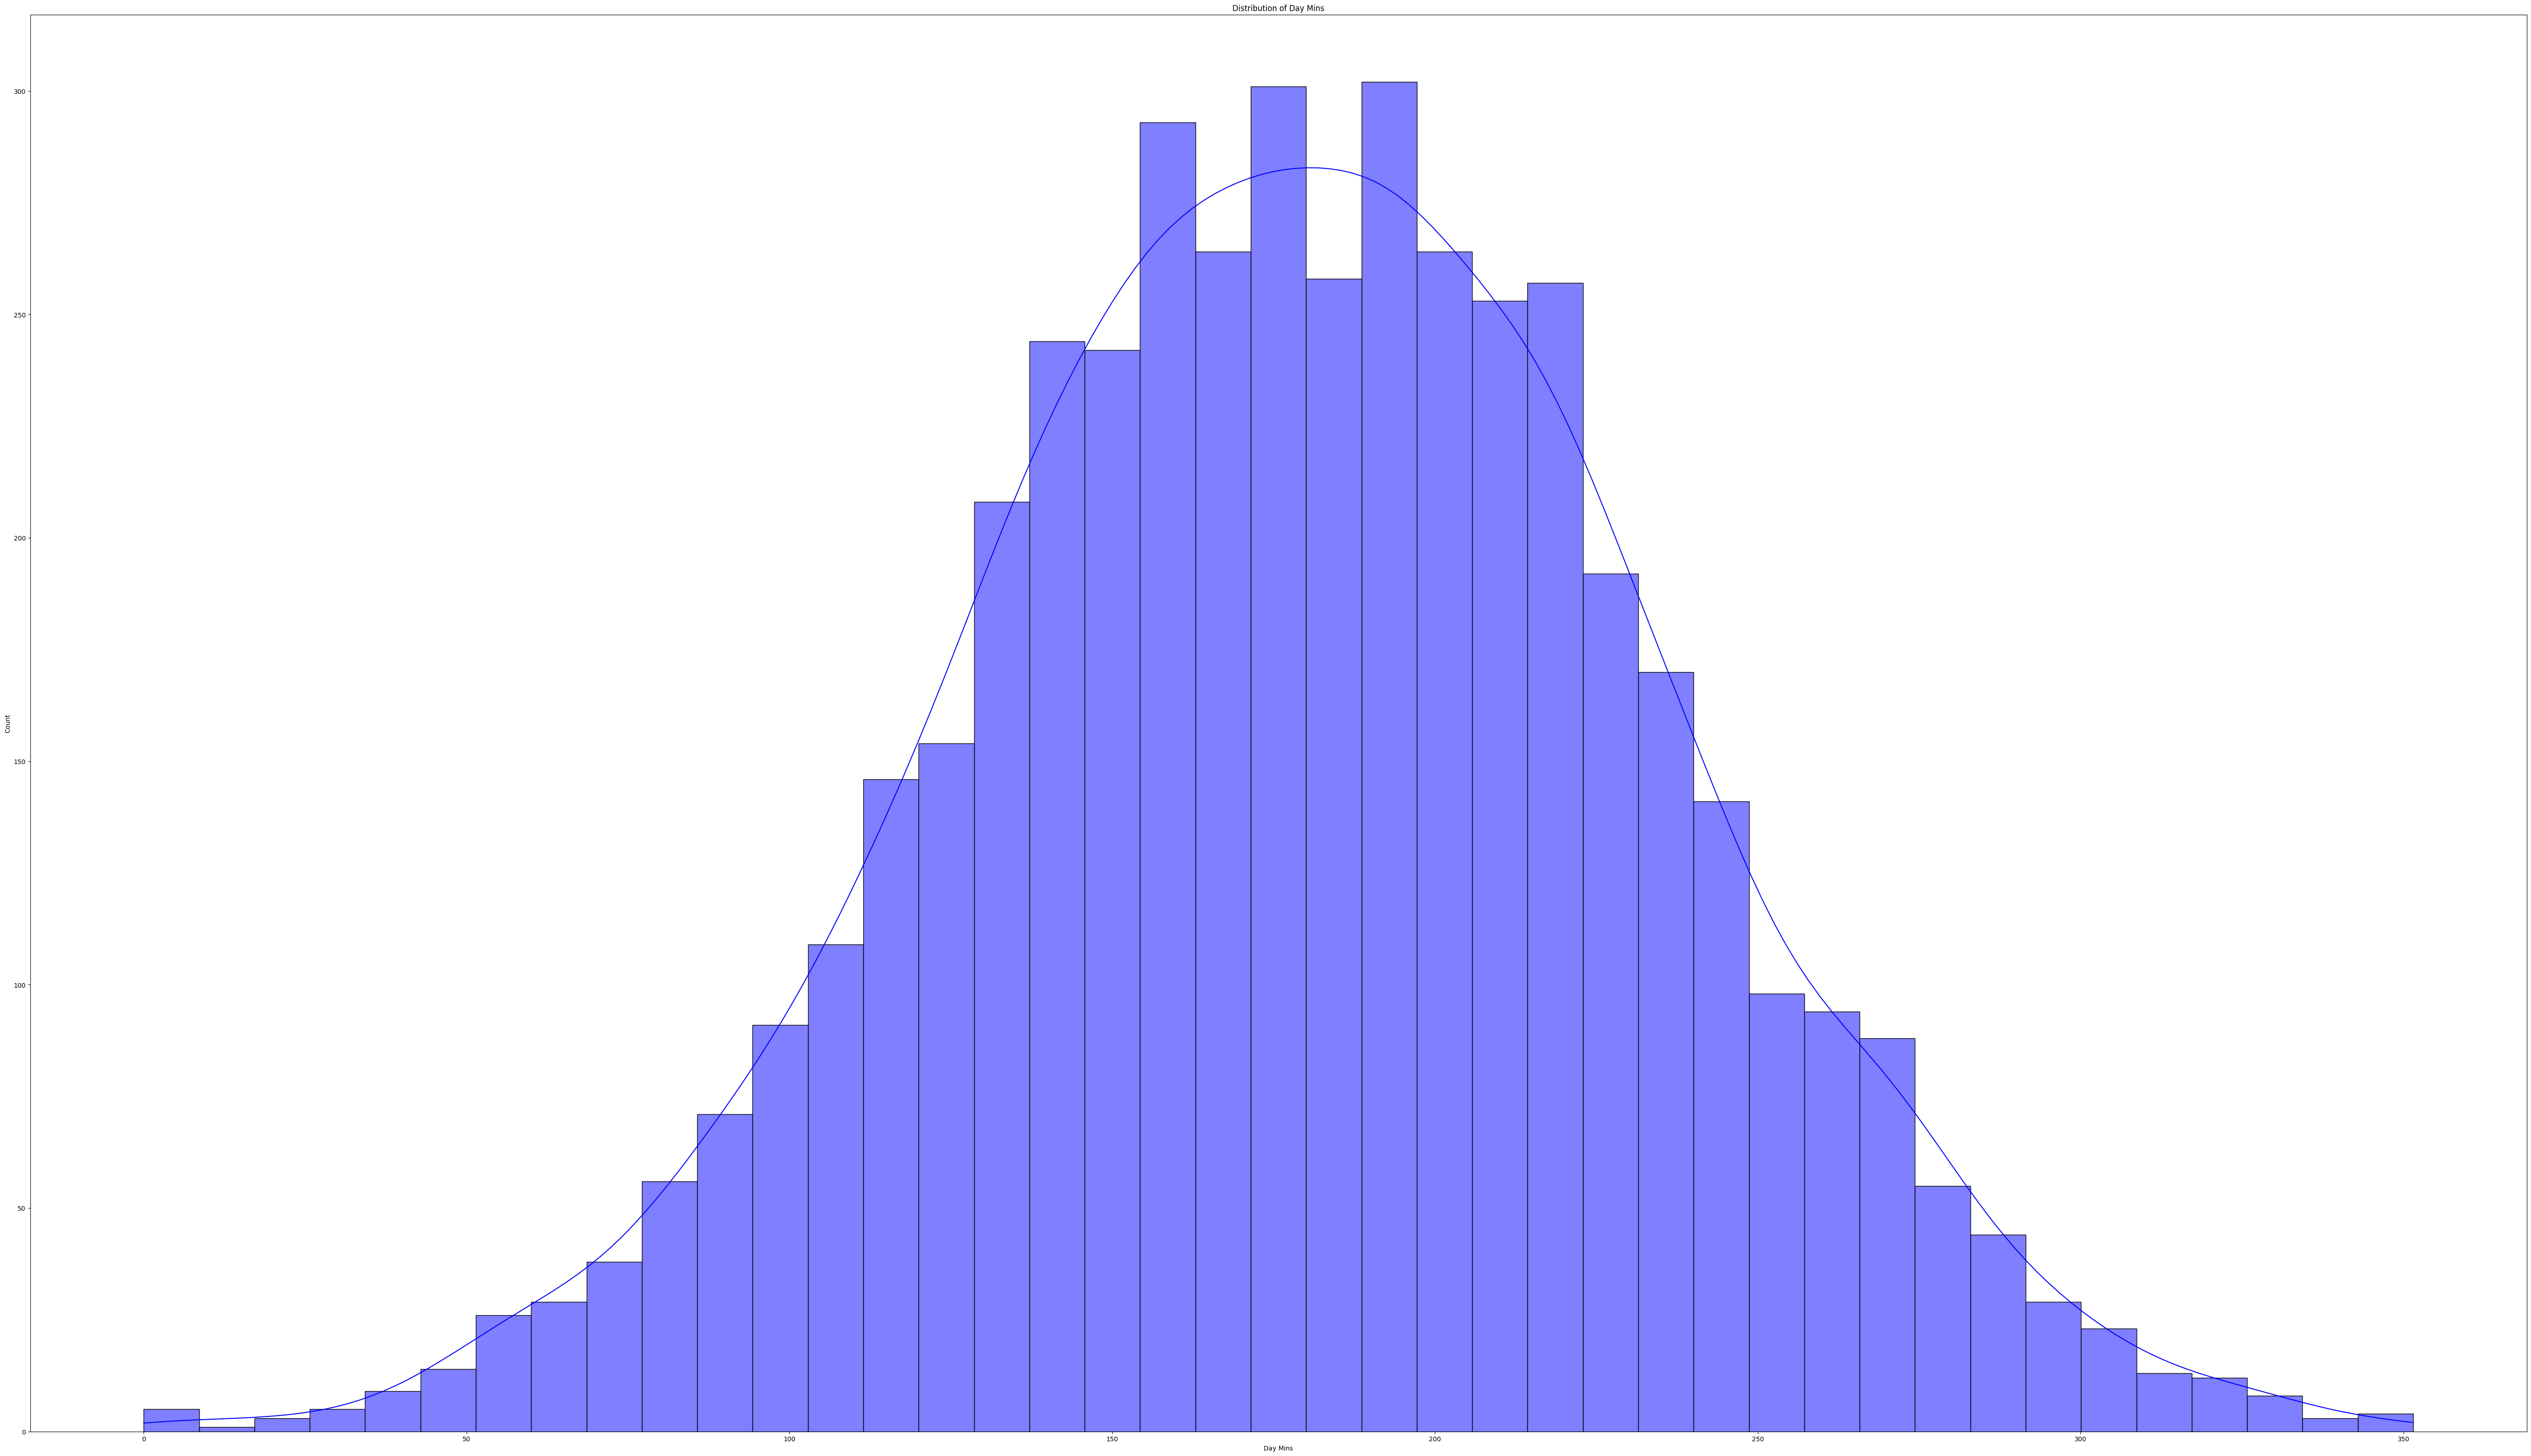

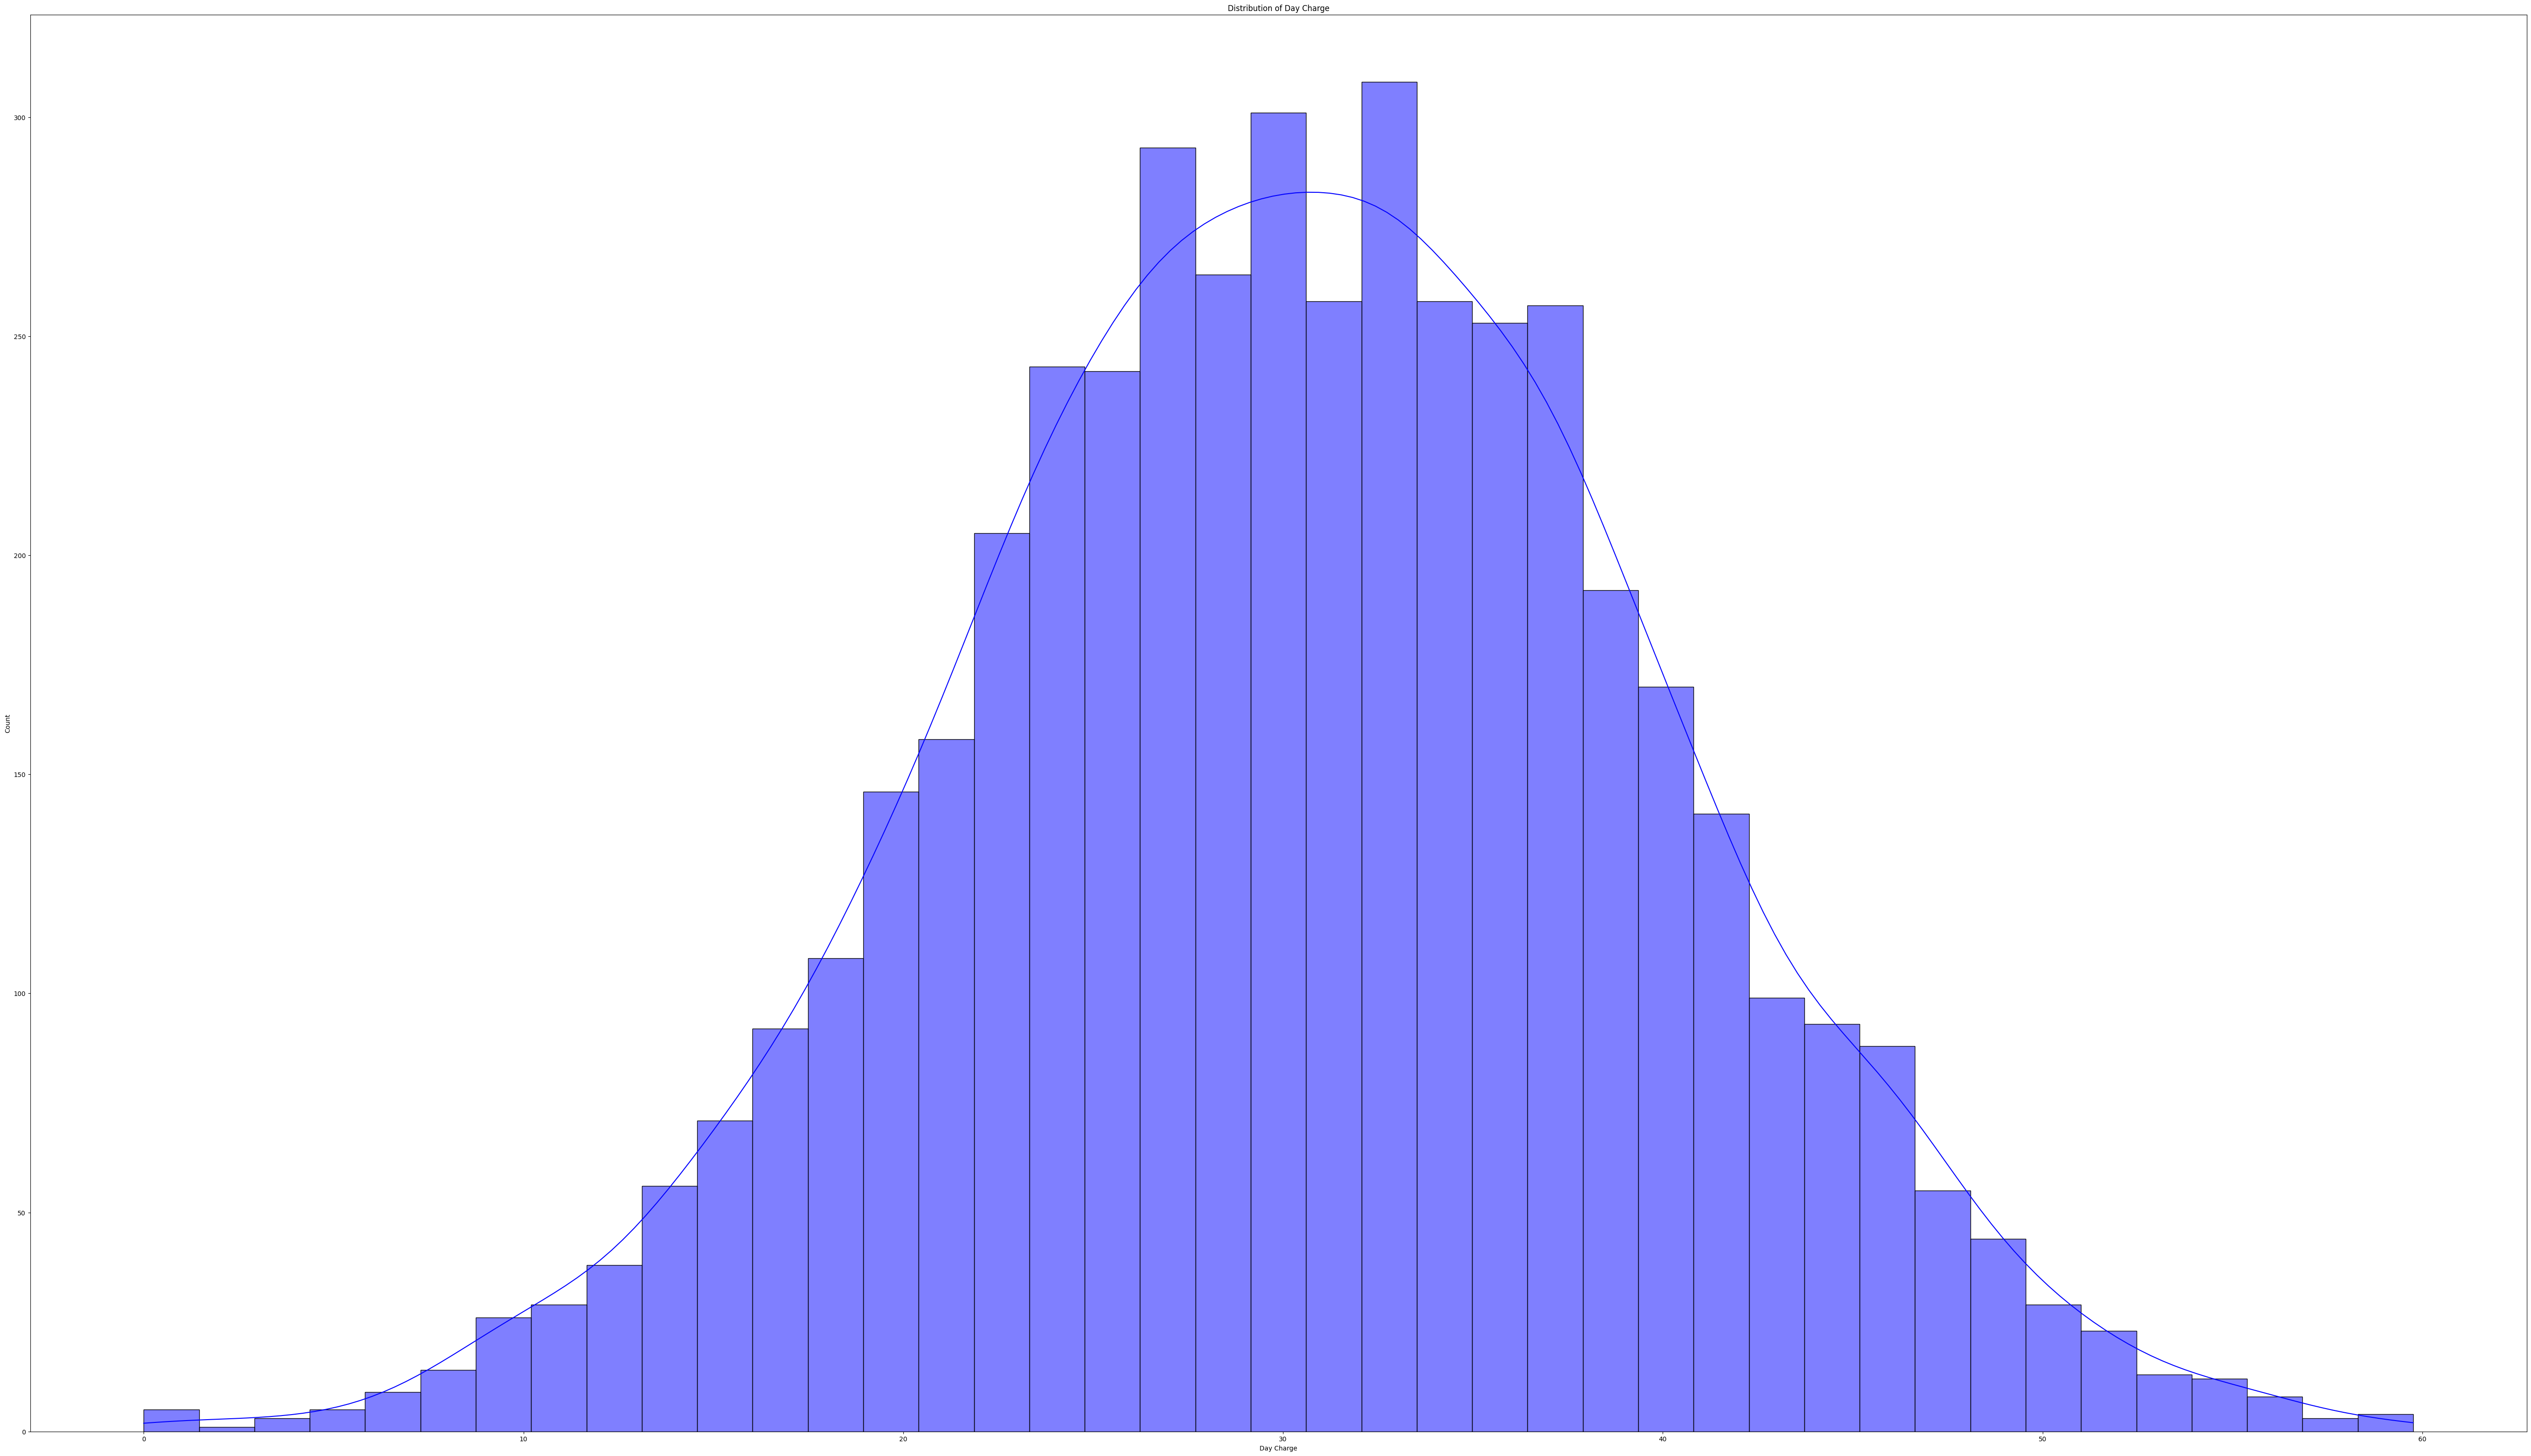

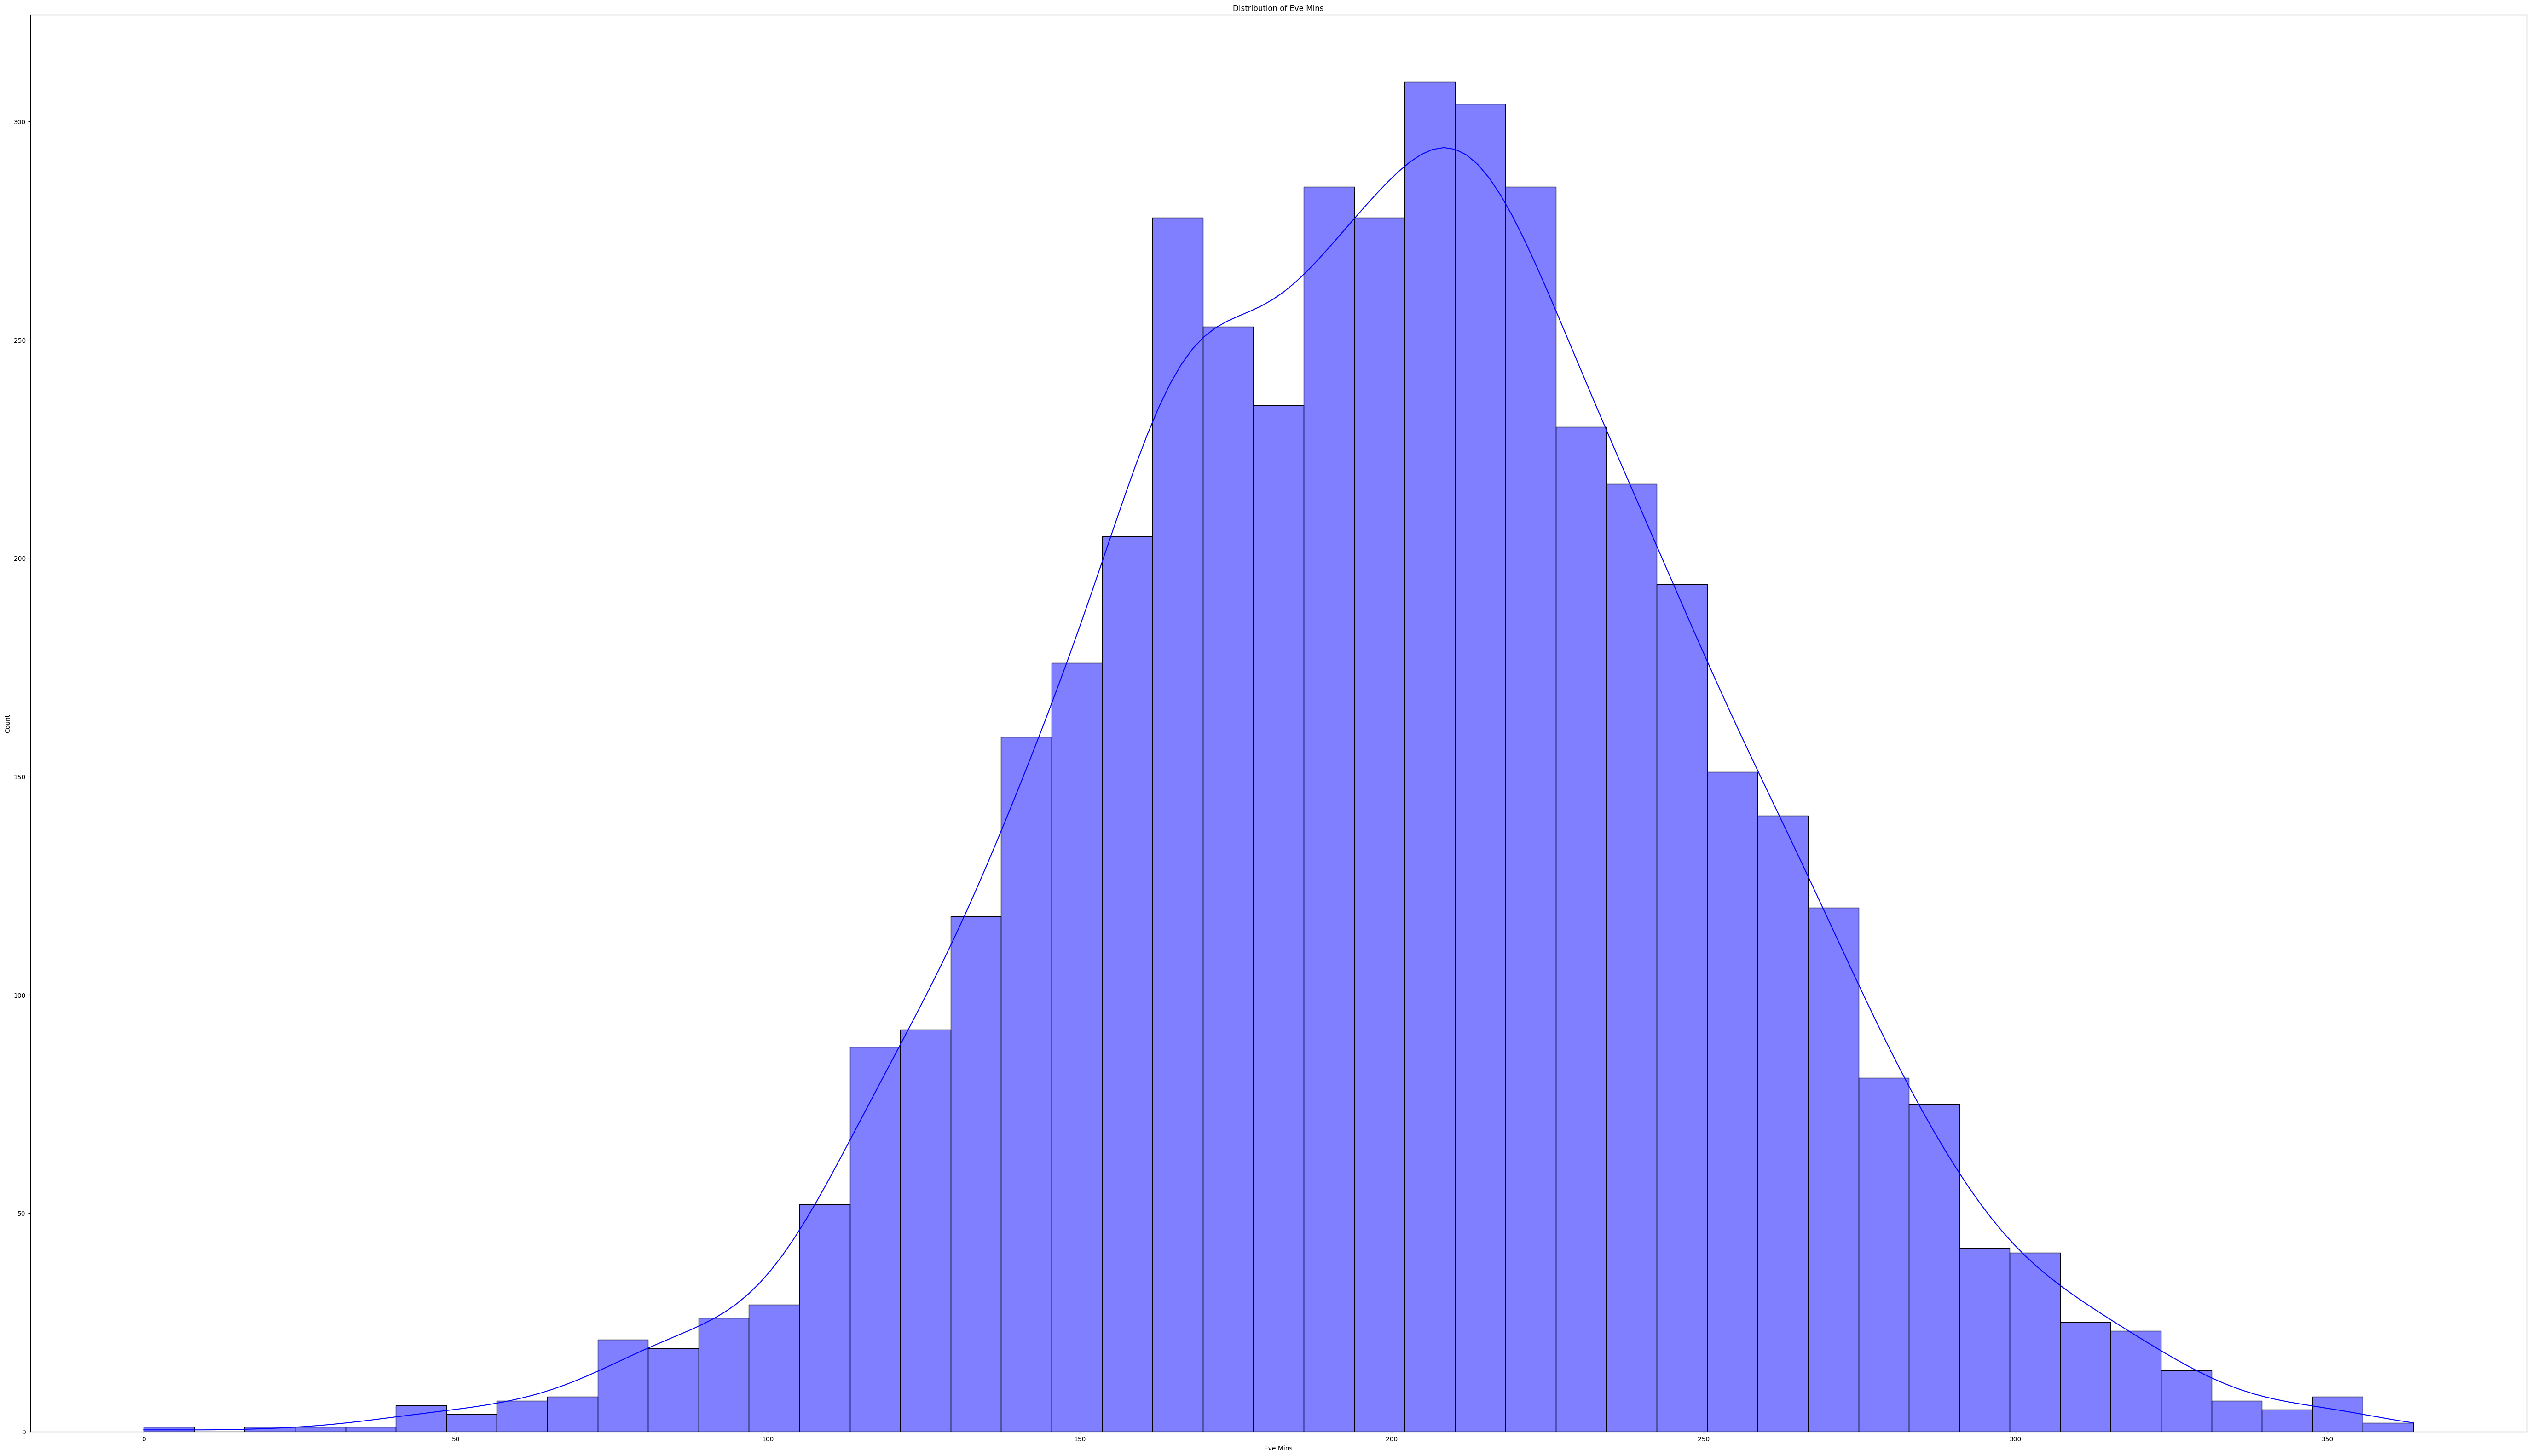

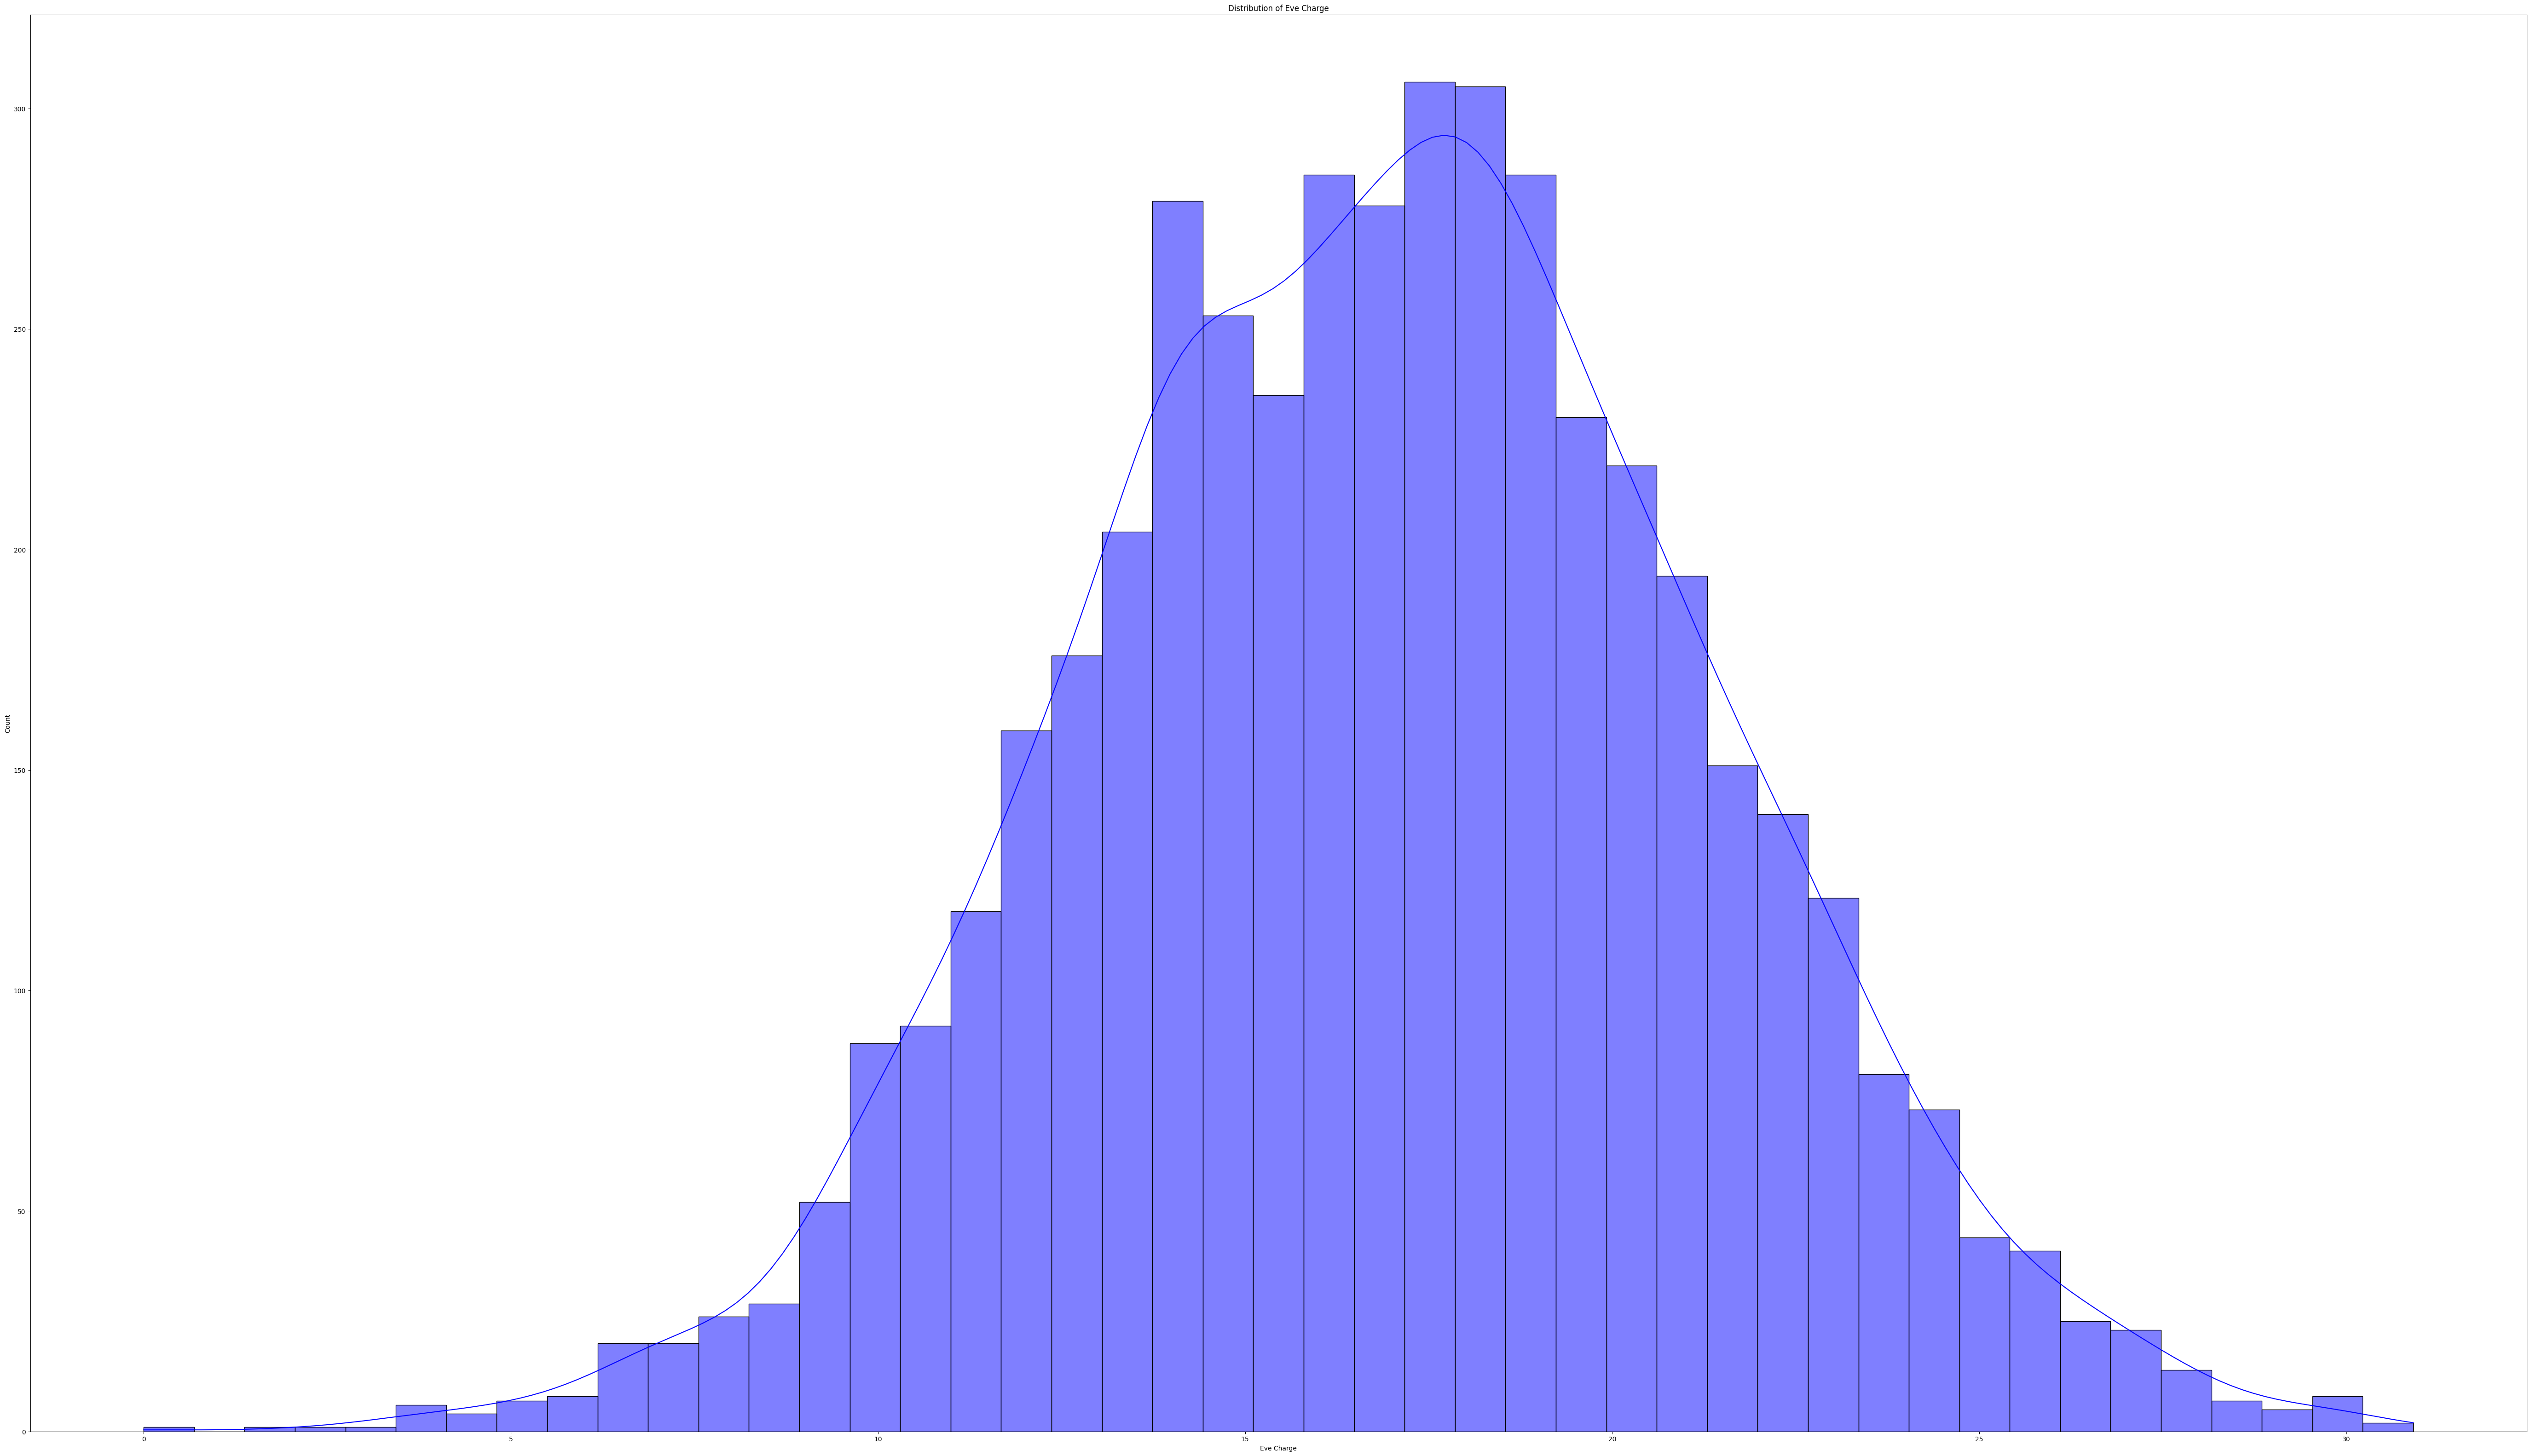

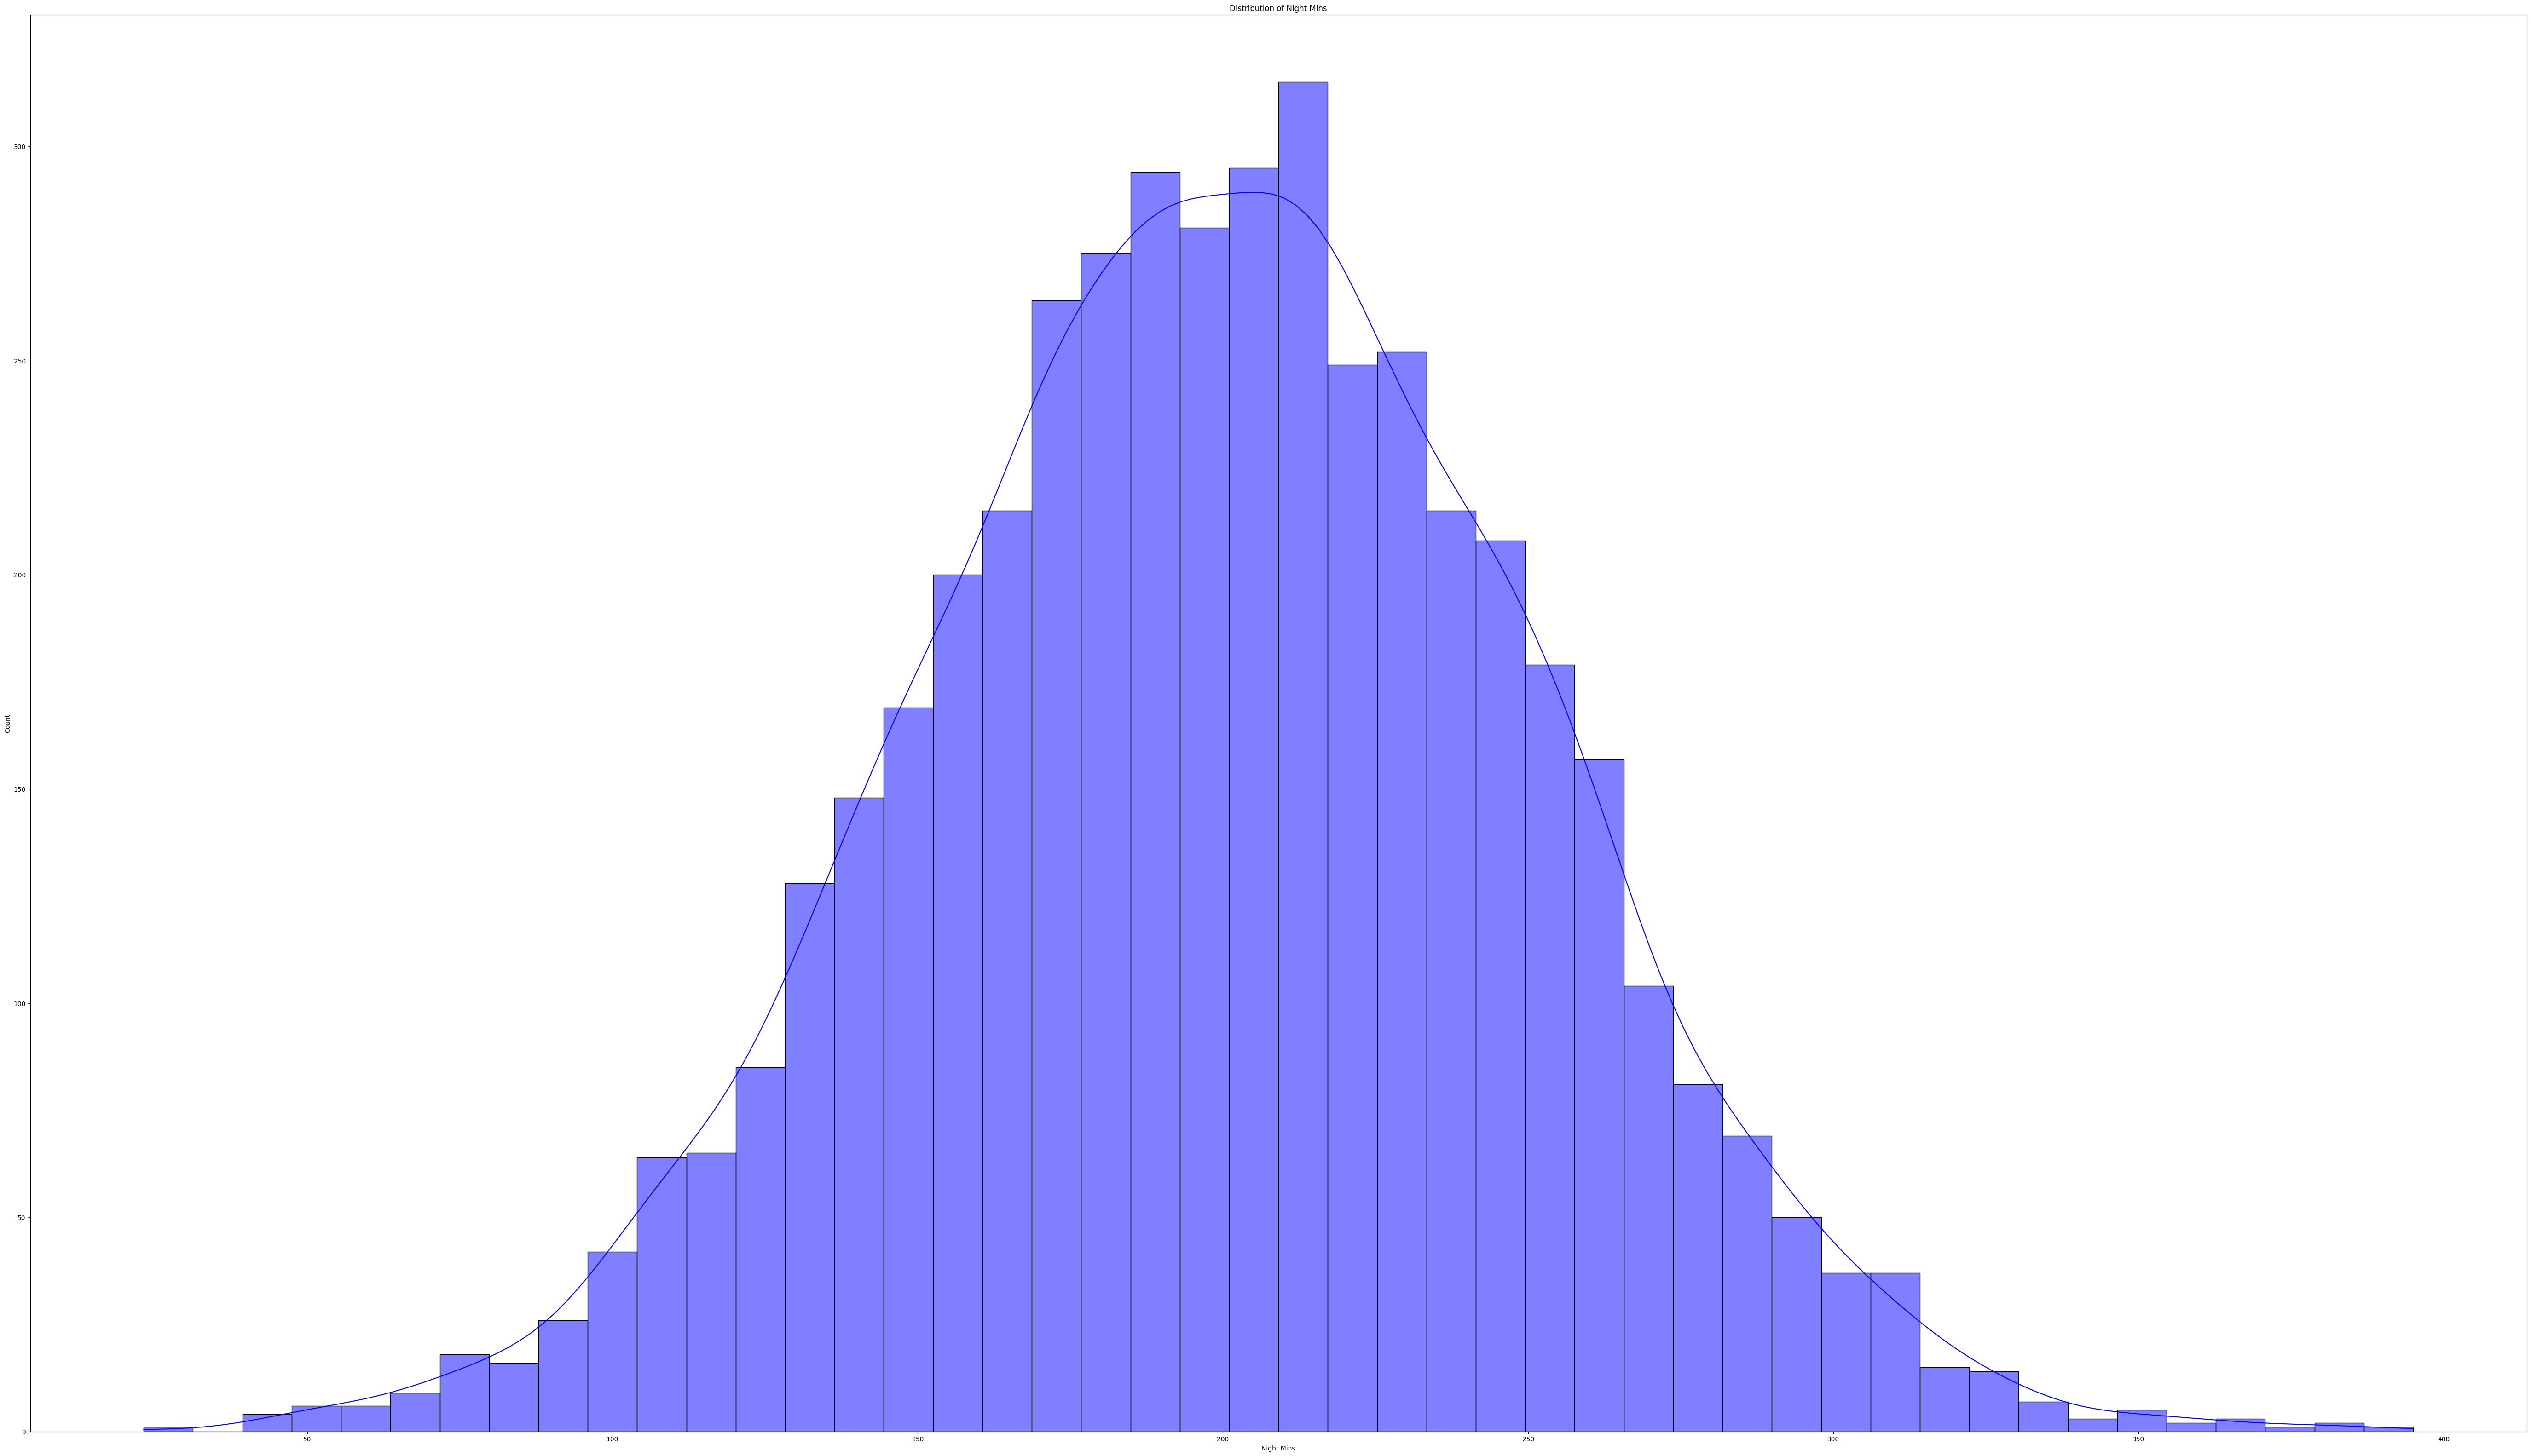

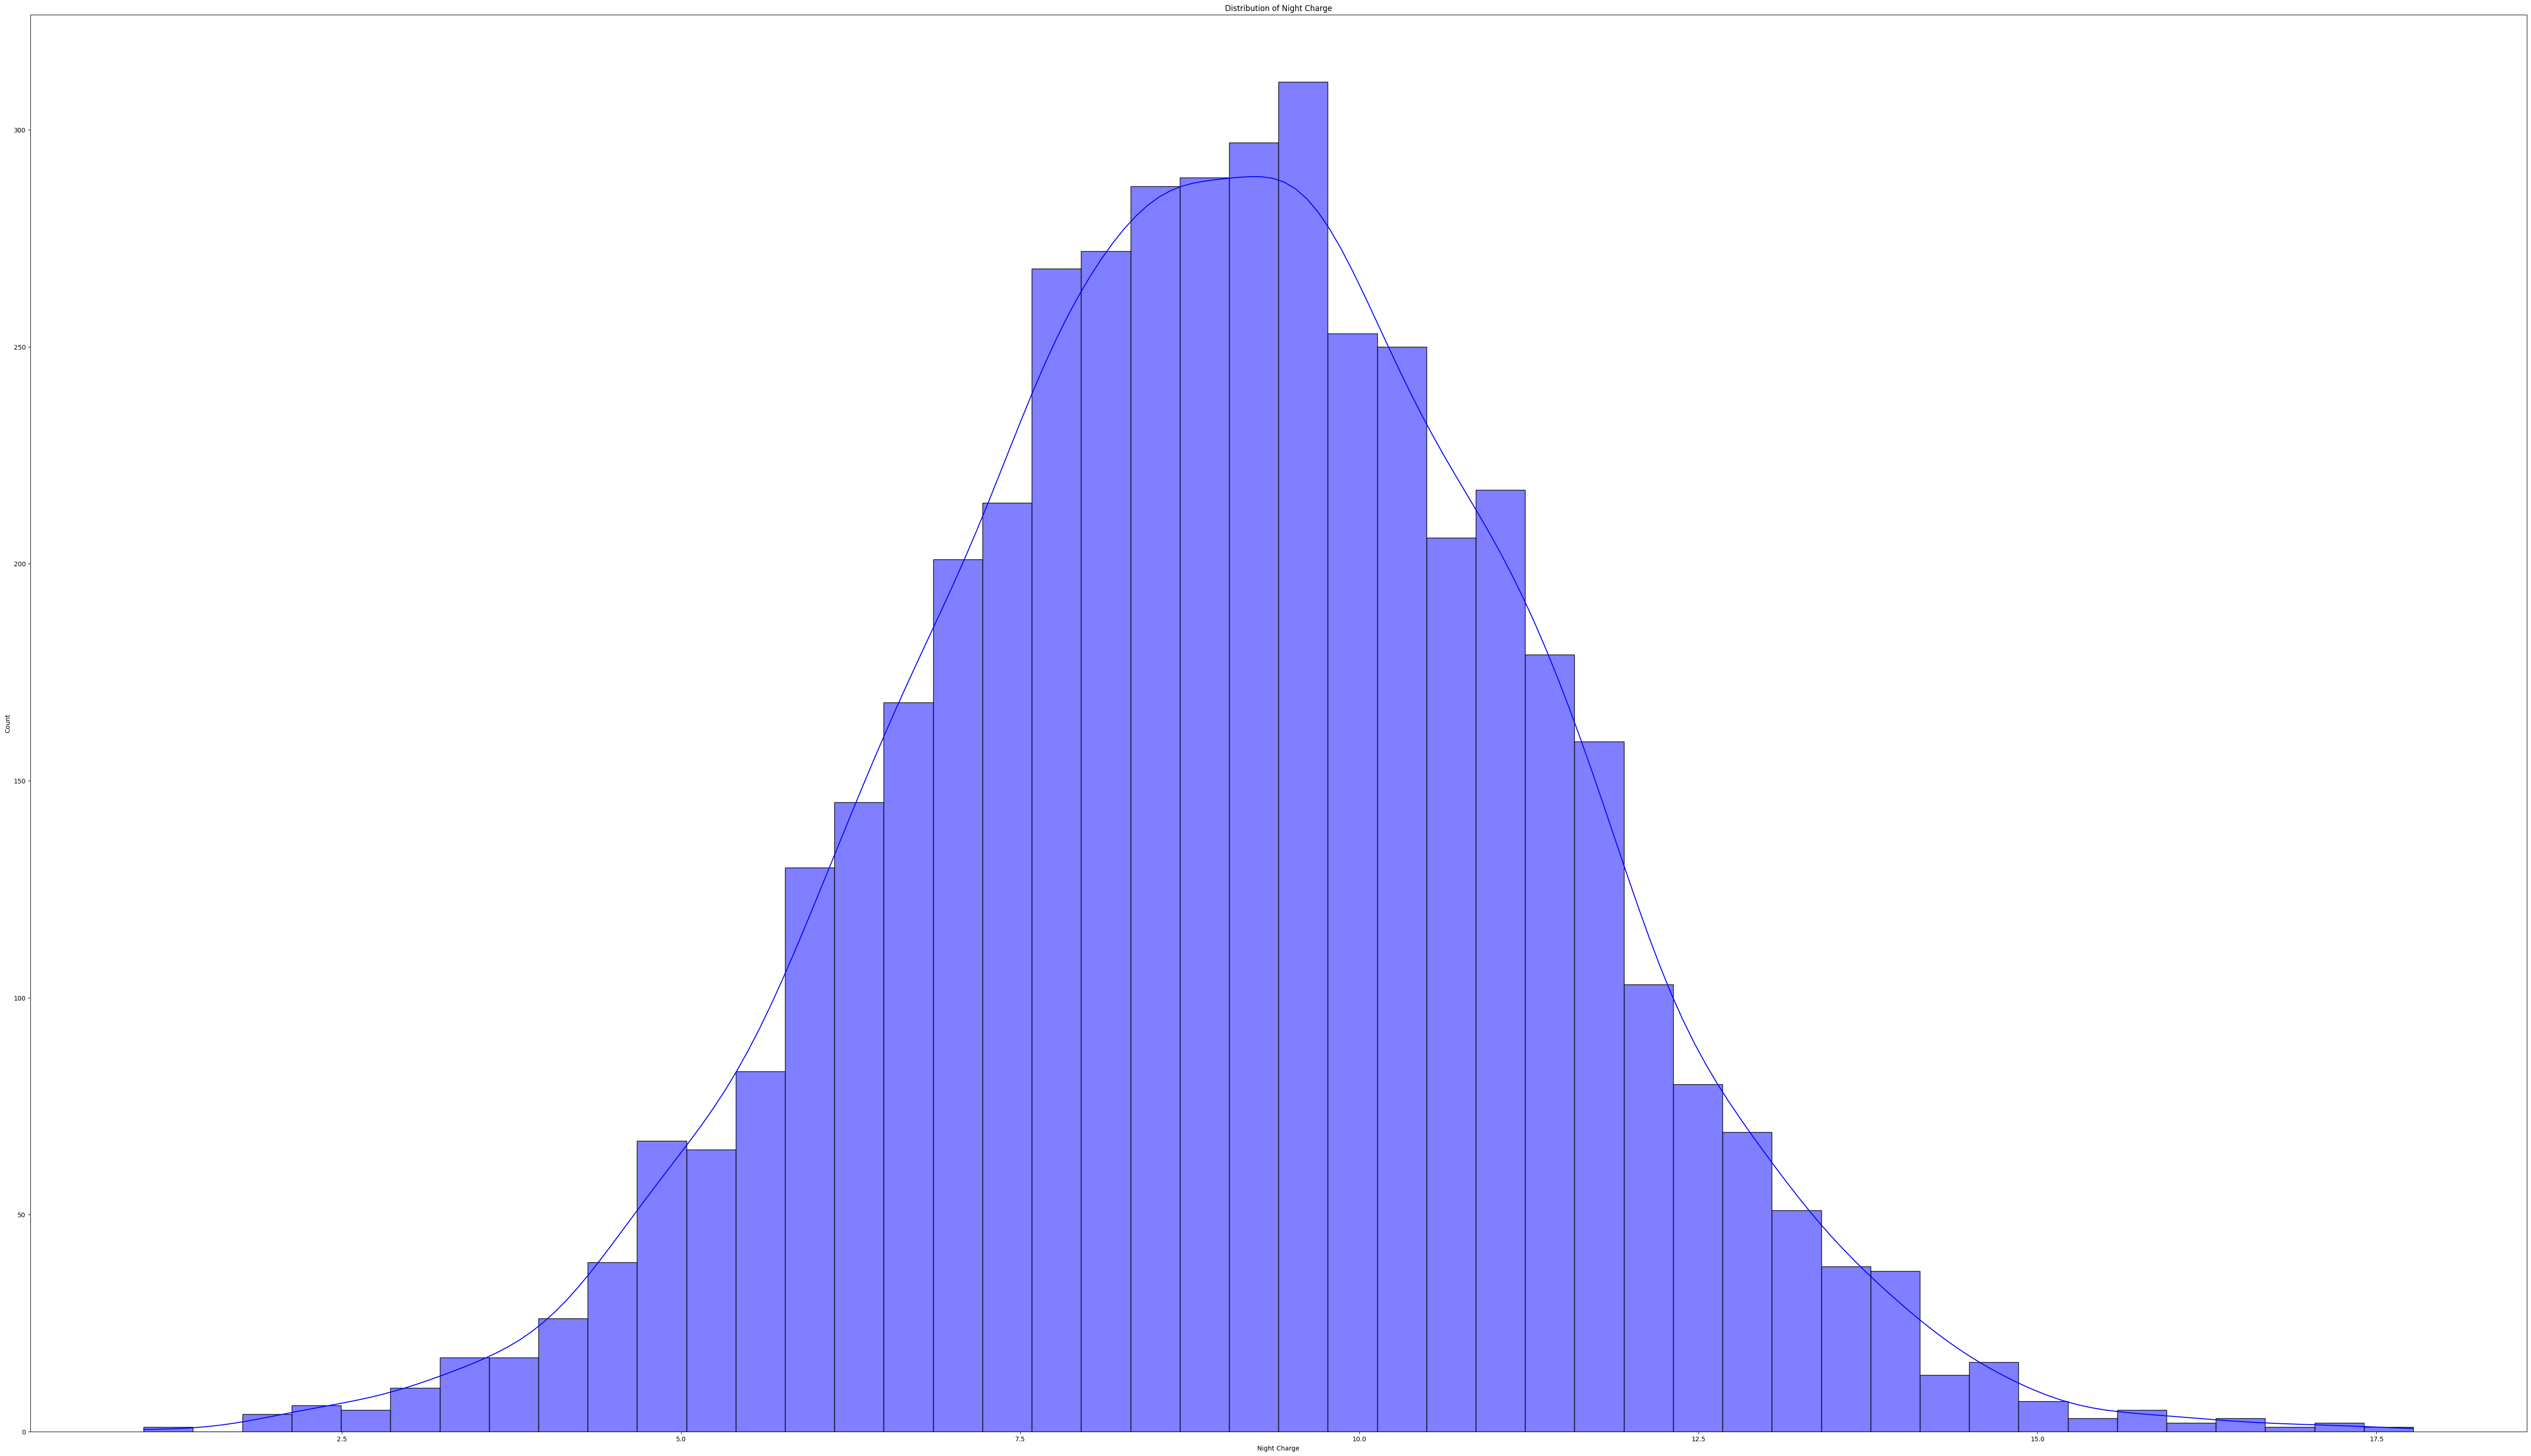

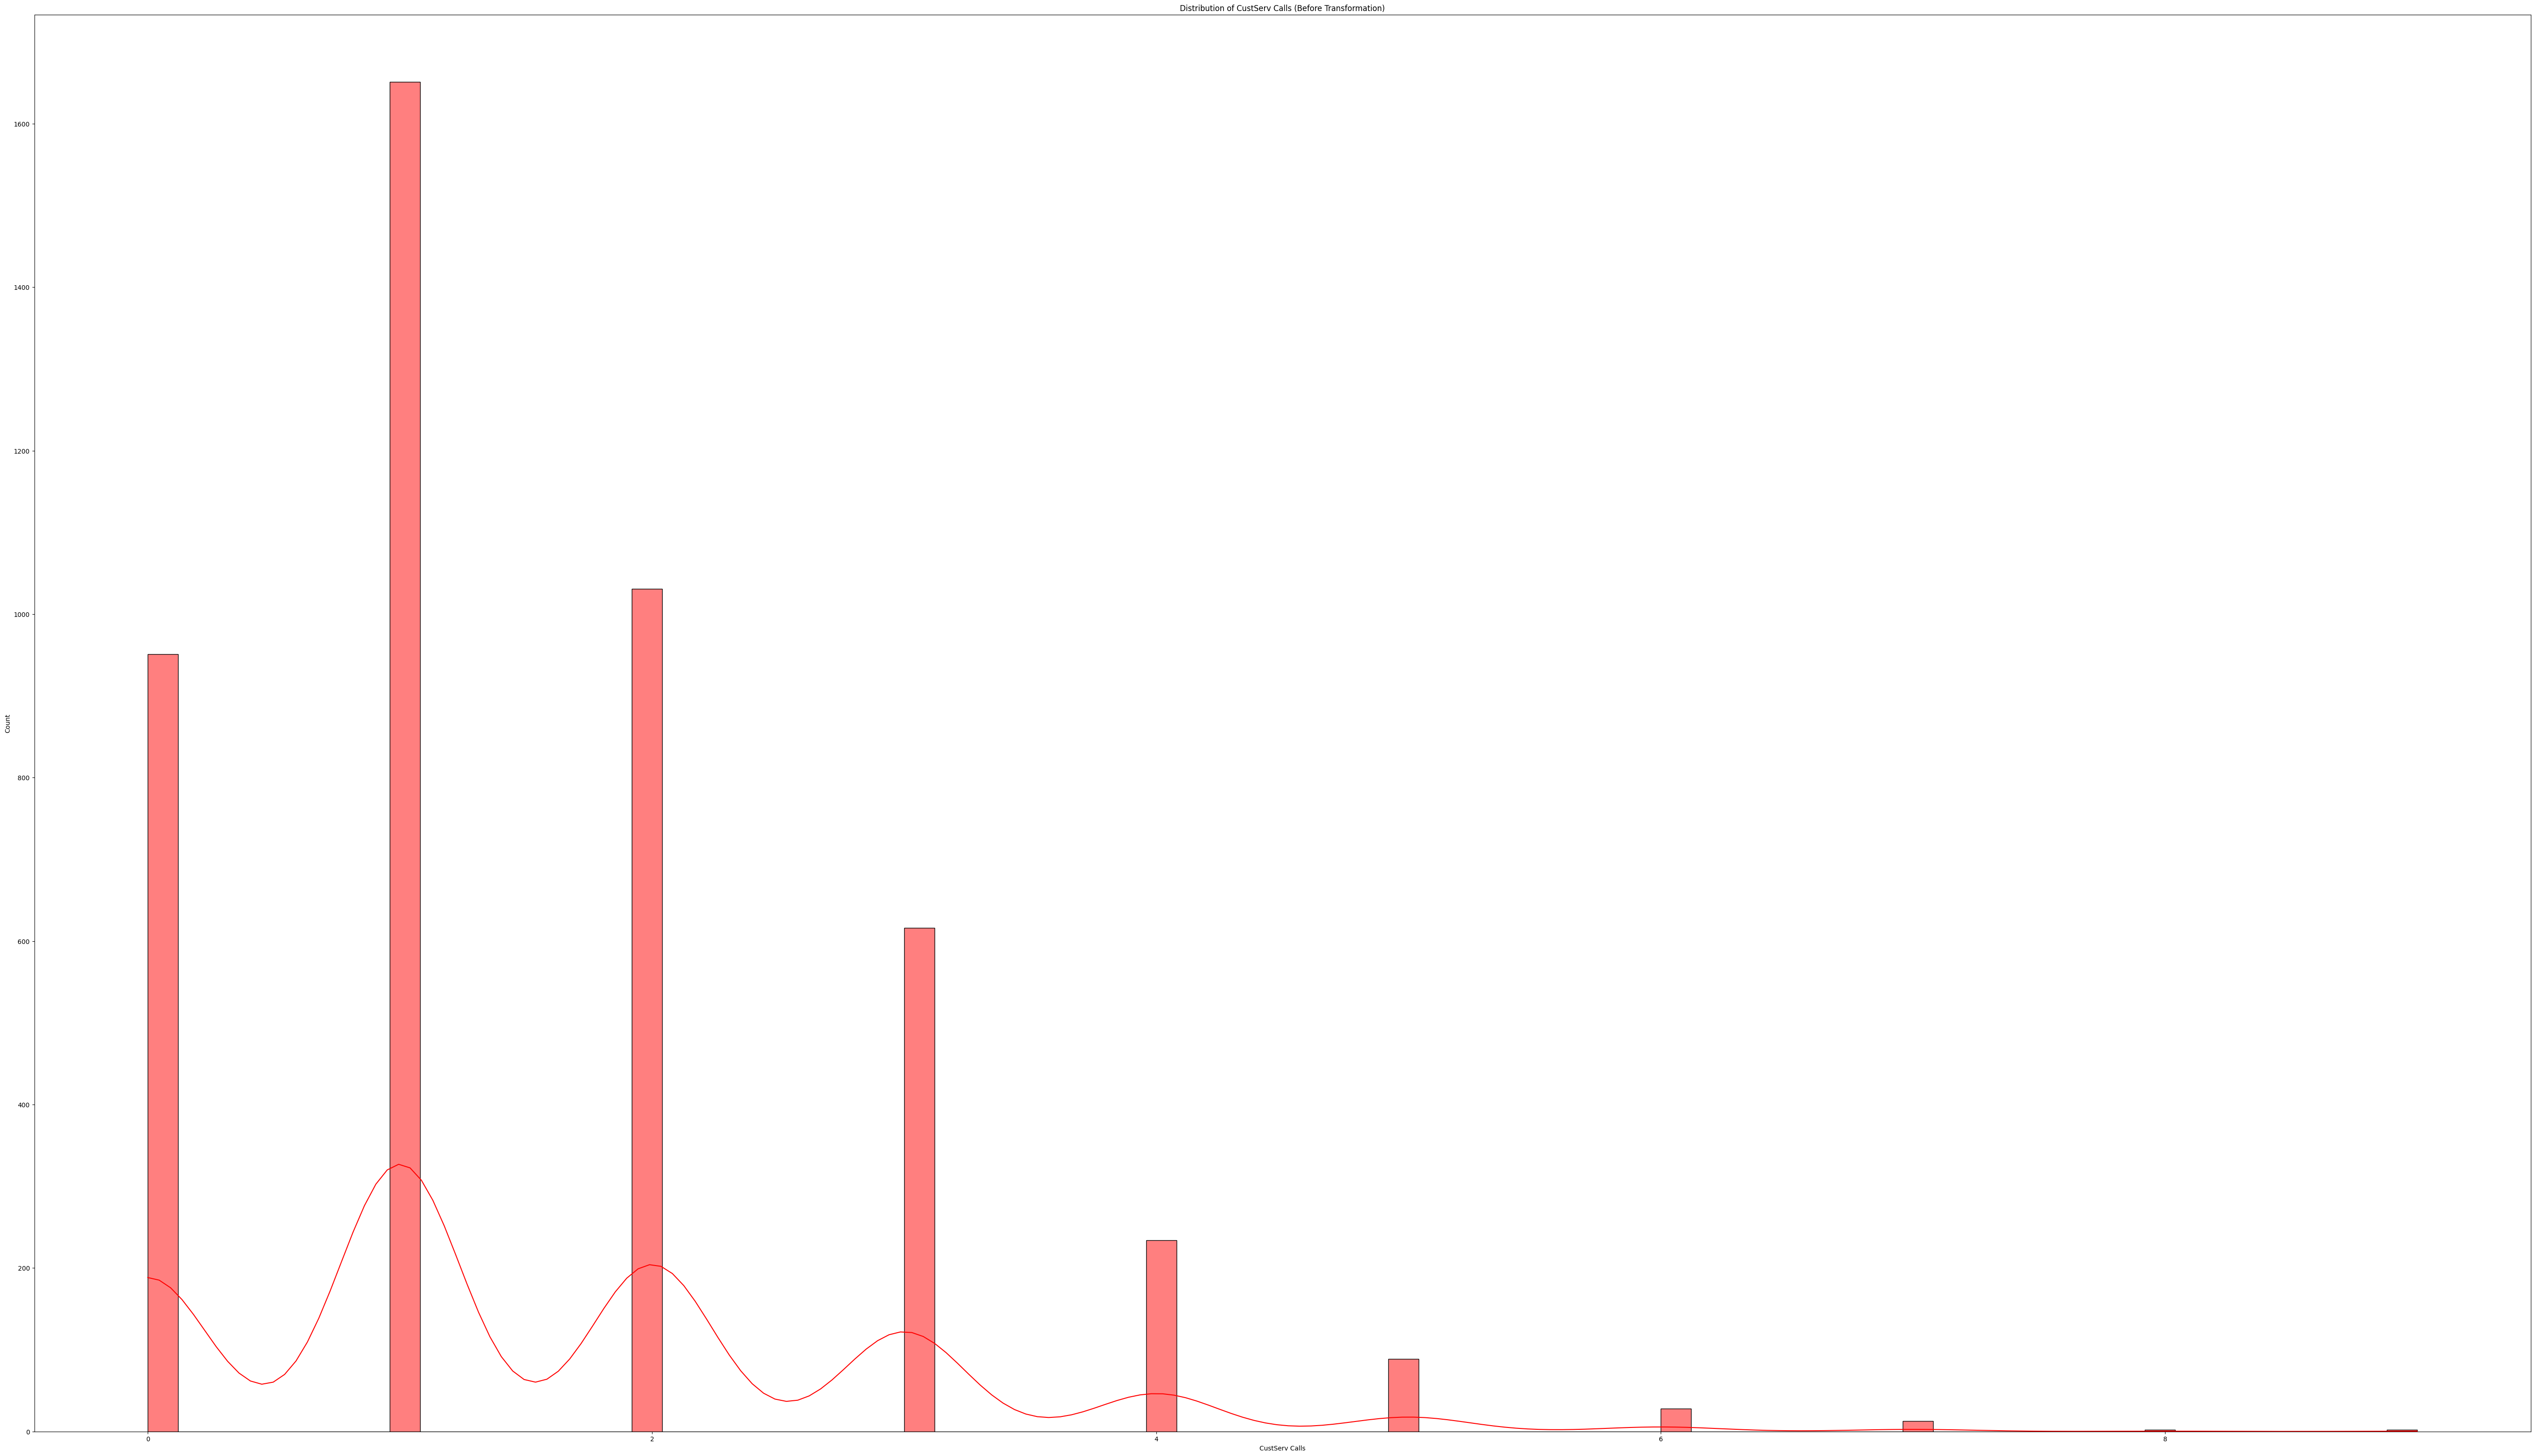

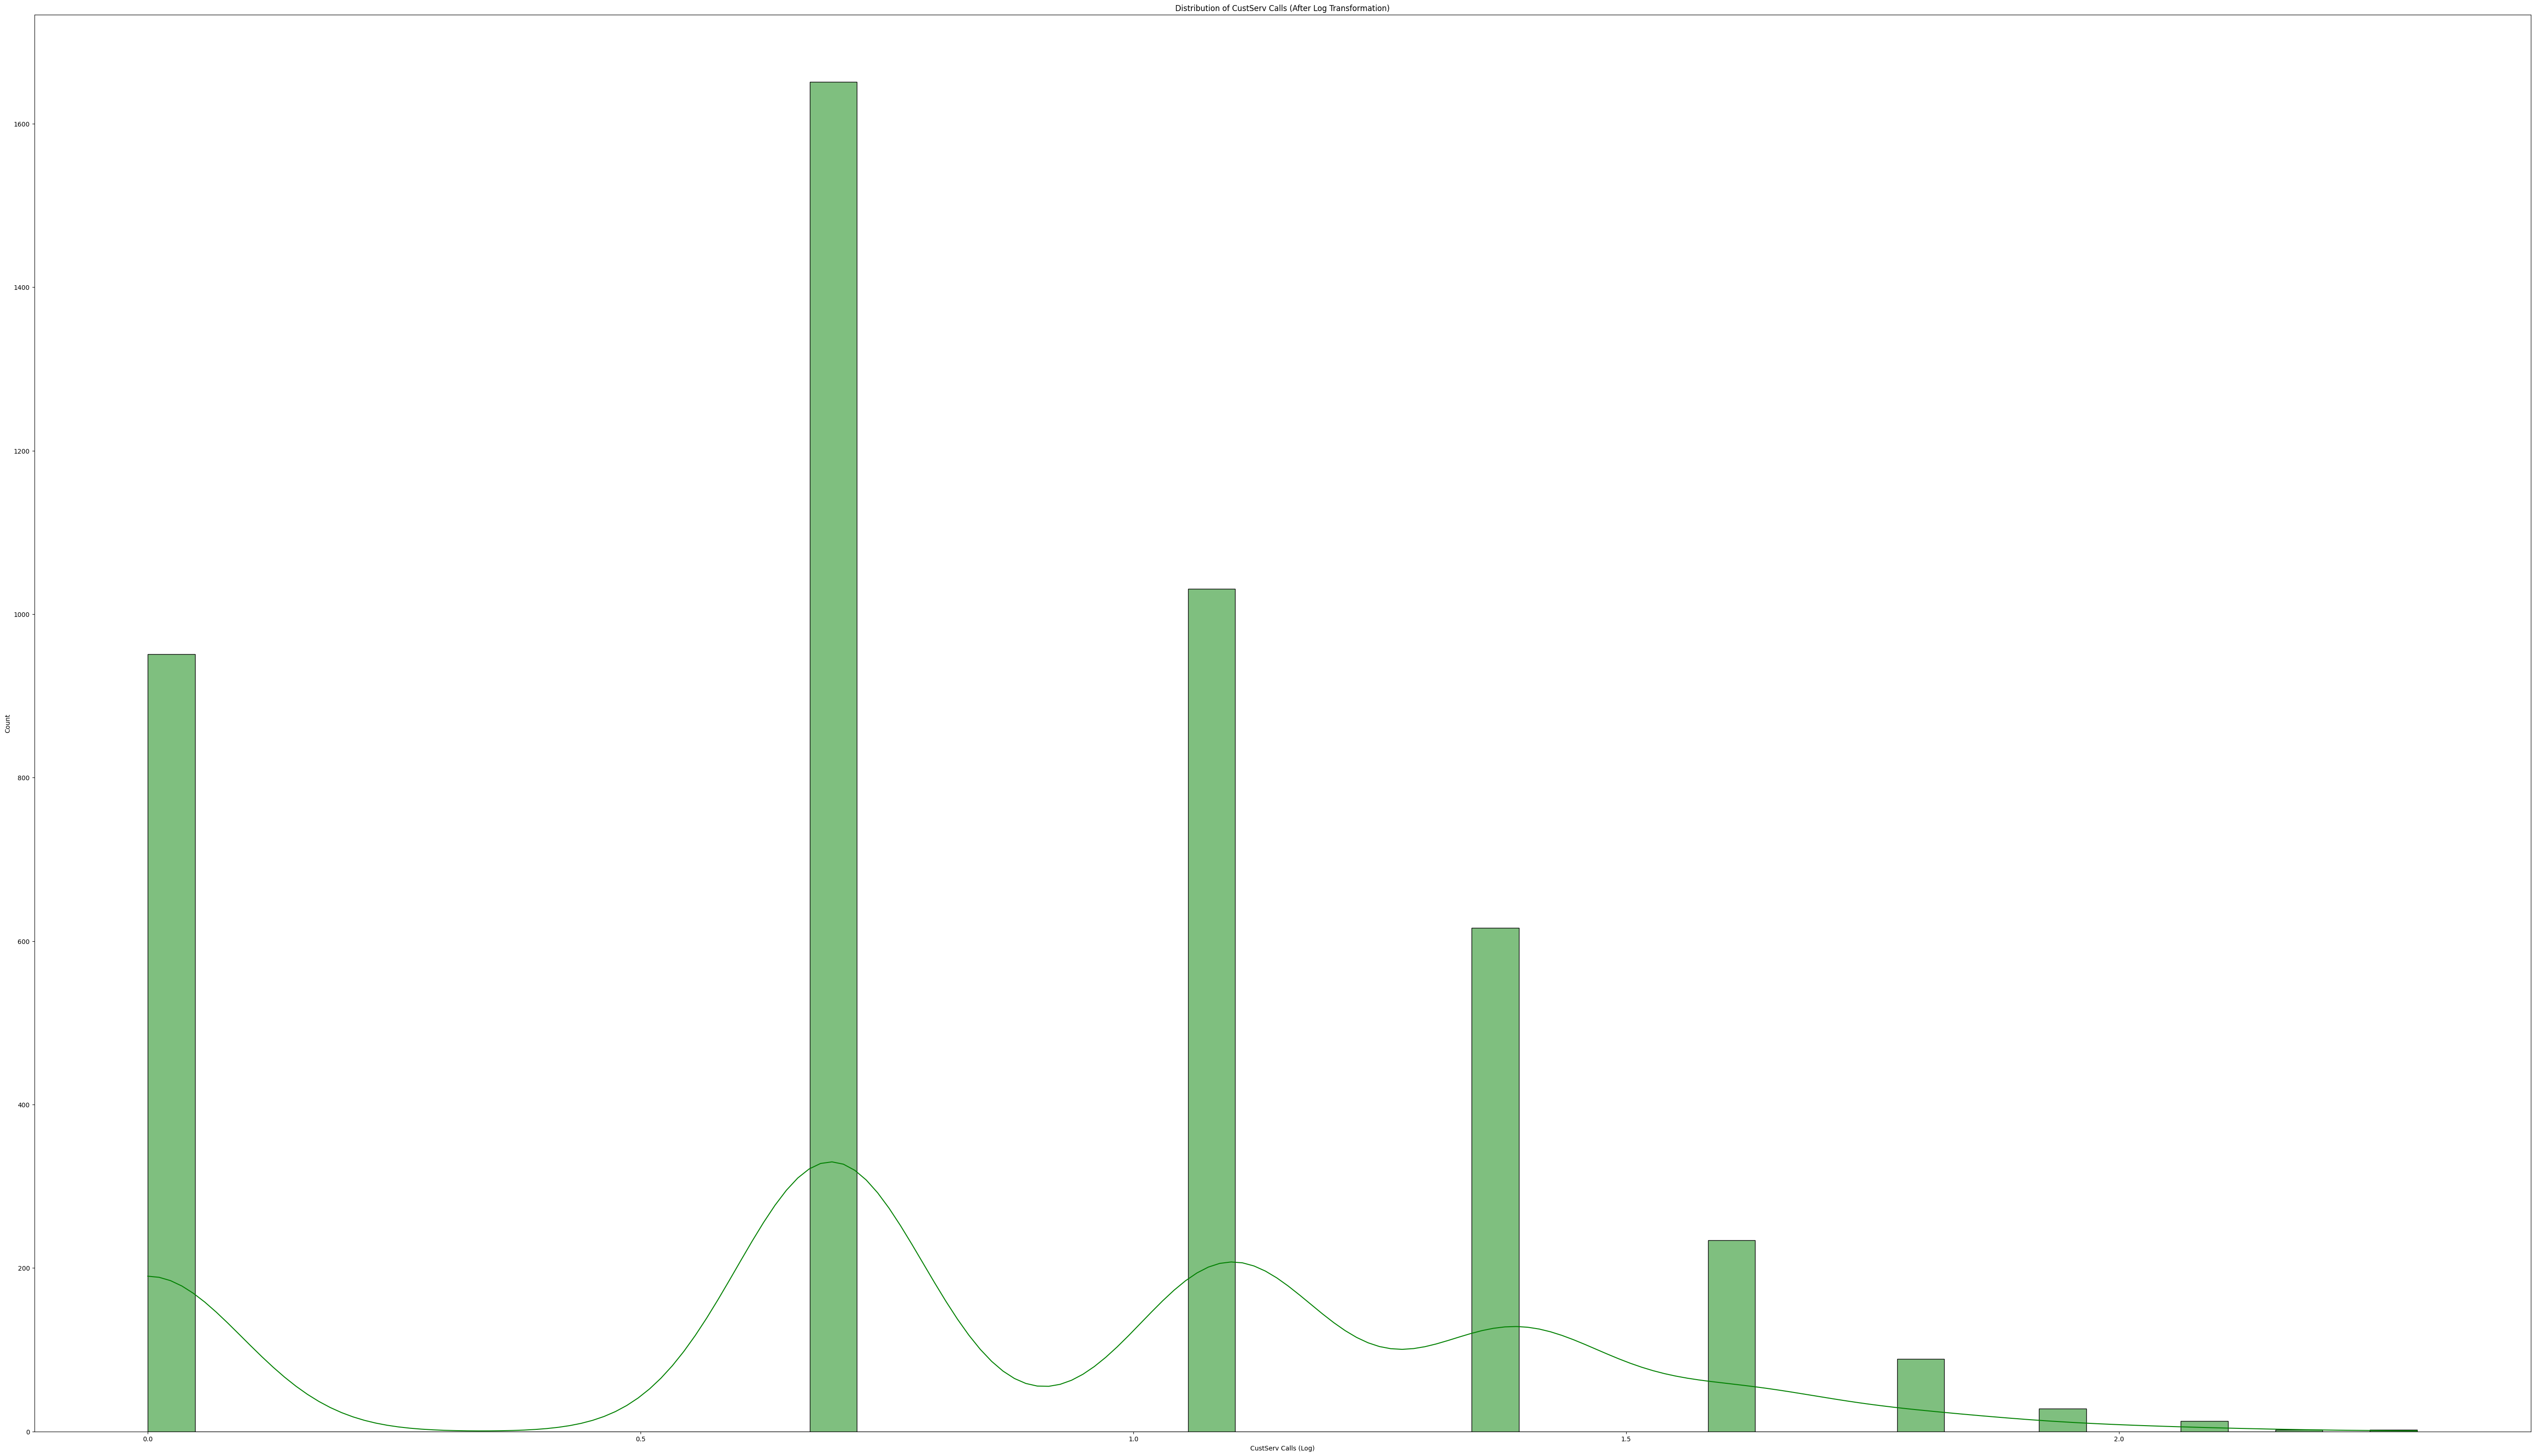

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot normal variables
normal_vars = ['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins', 'Night Charge']
for var in normal_vars:
    sns.histplot(data[var], kde=True, color='blue')
    plt.title(f'Distribution of {var}')
    plt.show()

# Plot non-normal variable (CustServ Calls) before transformation
sns.histplot(data['CustServ Calls'], kde=True, color='red')
plt.title('Distribution of CustServ Calls (Before Transformation)')
plt.show()

# Apply log transformation and plot after transformation
data['CustServ Calls (Log)'] = np.log1p(data['CustServ Calls'])
sns.histplot(data['CustServ Calls (Log)'], kde=True, color='green')
plt.title('Distribution of CustServ Calls (After Log Transformation)')
plt.show()


In [62]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': [0.02079272 0.04764999 0.04591726 0.03465454 0.02469136 0.02100931
 0.03638726 0.01581113 0.03227204 0.07710635 0.03898635 0.01407841
 0.05977908 0.04721681 0.04115226 0.02274204 0.01841022 0.0591293
 0.01754386 0.05393112 0.05133203 0.03335499 0.01494477 0.0214425
 0.02317522 0.0212259  0.02252545 0.00953    0.02425818 0.01646091
 0.01776045 0.01472818]
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129 

In [63]:
# Drop the 'CustServ Calls' column
data = data.drop(columns=['CustServ Calls'])

In [64]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
       'International Charge', 'Chrun', 'CustServ Calls (Log)'],
      dtype='object')

To verify if your data contains negative values (which would prevent the use of Box-Cox transformation since it only works with positive values), I am checking each column for any negative numbers

In [65]:
# Check for negative values in the dataset
negative_values = data.select_dtypes(include=[np.number]).apply(lambda x: (x < 0).any())

# Display columns with negative values
columns_with_negatives = negative_values[negative_values].index.tolist()

if len(columns_with_negatives) > 0:
    print("Columns with negative values:", columns_with_negatives)
else:
    print("No negative values found in the dataset.")


No negative values found in the dataset.


In [67]:
from scipy.stats import boxcox

# List of columns that need transformation (non-normal distributions)
columns_to_transform = [
    'Account Length', 'Area Code', 'International Plan', 'Day Calls', 
    'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun'
]

# Apply Box-Cox transformation to each column
for col in columns_to_transform:
    # Apply the Box-Cox transformation and replace the original column
    data[col], _ = boxcox(data[col] + 1e-6)  # Adding a small constant to avoid zero values

# Verify if transformation was successful
print("Box-Cox Transformation applied to the following columns:")
print(columns_to_transform)


ValueError: Data must not be constant.

In [70]:
from scipy.stats import boxcox

# List of columns that need transformation (non-normal distributions)
columns_to_transform = [
    'Account Length', 'Area Code', 'International Plan', 'Day Calls', 
    'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun'
]

# Identify and exclude constant columns
non_constant_columns = [col for col in columns_to_transform if data[col].nunique() > 1]

# Apply Box-Cox transformation to each non-constant column
for col in non_constant_columns:
    # Apply the Box-Cox transformation and replace the original column
    data[col], _ = boxcox(data[col] + 1e-6)  # Adding a small constant to avoid zero values

# Verify which columns were transformed
print("Box-Cox Transformation applied to the following non-constant columns:")
print(non_constant_columns)


ValueError: Data must be positive.

The Yeo-Johnson transformation is similar to the Box-Cox transformation but can handle both positive and negative values. It’s a great alternative when your dataset contains zero or negative values.

In [72]:
from sklearn.preprocessing import PowerTransformer

# List of columns that need transformation (non-normal distributions)
columns_to_transform = [
    'Account Length', 'Area Code', 'International Plan', 'Day Calls', 
    'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun'
]

# Initialize the PowerTransformer for Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to each column
for col in columns_to_transform:
    # Reshape the data to 2D as required by PowerTransformer
    data[col] = pt.fit_transform(data[[col]])

# Verify which columns were transformed
print("Yeo-Johnson Transformation applied to the following columns:")
print(columns_to_transform)


Yeo-Johnson Transformation applied to the following columns:
['Account Length', 'Area Code', 'International Plan', 'Day Calls', 'Eve Calls', 'International Mins', 'International Charge', 'CustServ Calls (Log)', 'Chrun']


In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Splitting the data
X = data.drop(columns=['Chrun'])  # Feature columns
y = data['Chrun']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model results
model_results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_results['Logistic Regression'] = {
    'roc_auc': roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_results['Random Forest'] = {
    'roc_auc': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Gradient Boosting (XGBoost)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
model_results['Gradient Boosting'] = {
    'roc_auc': roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Support Vector Machine
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_results['SVM'] = {
    'roc_auc': roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Display results
for model, metrics in model_results.items():
    print(f"Model: {model}")
    print(f"ROC AUC: {metrics['roc_auc']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print("-" * 50)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [74]:
print(data['Chrun'].value_counts())


Chrun
-0.406958    3961
 2.457257     656
Name: count, dtype: int64


In [75]:
# Convert Chrun to binary using a threshold
data['Chrun'] = (data['Chrun'] > 0.5).astype(int)

# Verify
print(data['Chrun'].value_counts())


Chrun
0    3961
1     656
Name: count, dtype: int64


In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Splitting the data
X = data.drop(columns=['Chrun'])  # Feature columns
y = data['Chrun']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store model results
model_results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_results['Logistic Regression'] = {
    'roc_auc': roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_results['Random Forest'] = {
    'roc_auc': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Gradient Boosting (XGBoost)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
model_results['Gradient Boosting'] = {
    'roc_auc': roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Support Vector Machine
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
model_results['SVM'] = {
    'roc_auc': roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1]),
    'classification_report': classification_report(y_test, y_pred)
}

# Display results
for model, metrics in model_results.items():
    print(f"Model: {model}")
    print(f"ROC AUC: {metrics['roc_auc']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print("-" * 50)


Model: Logistic Regression
ROC AUC: 0.776883609445241
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       793
           1       0.48      0.10      0.16       131

    accuracy                           0.86       924
   macro avg       0.67      0.54      0.54       924
weighted avg       0.81      0.86      0.81       924

--------------------------------------------------
Model: Random Forest
ROC AUC: 0.8921190185112098
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       793
           1       0.76      0.60      0.67       131

    accuracy                           0.92       924
   macro avg       0.85      0.78      0.81       924
weighted avg       0.91      0.92      0.91       924

--------------------------------------------------
Model: Gradient Boosting
ROC AUC: 0.8818815398092082
Classification Report:
              preci

c:\Users\user\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Model: Logistic Regression
ROC AUC: 0.7789339930498733
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.93      0.75      0.83       793
       Churn       0.31      0.67      0.42       131

    accuracy                           0.74       924
   macro avg       0.62      0.71      0.62       924
weighted avg       0.84      0.74      0.77       924

Confusion Matrix:
--------------------------------------------------
Model: Random Forest
ROC AUC: 0.8827478990787713
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.94      0.95       793
       Churn       0.67      0.67      0.67       131

    accuracy                           0.91       924
   macro avg       0.81      0.81      0.81       924
weighted avg       0.91      0.91      0.91       924

Confusion Matrix:
-

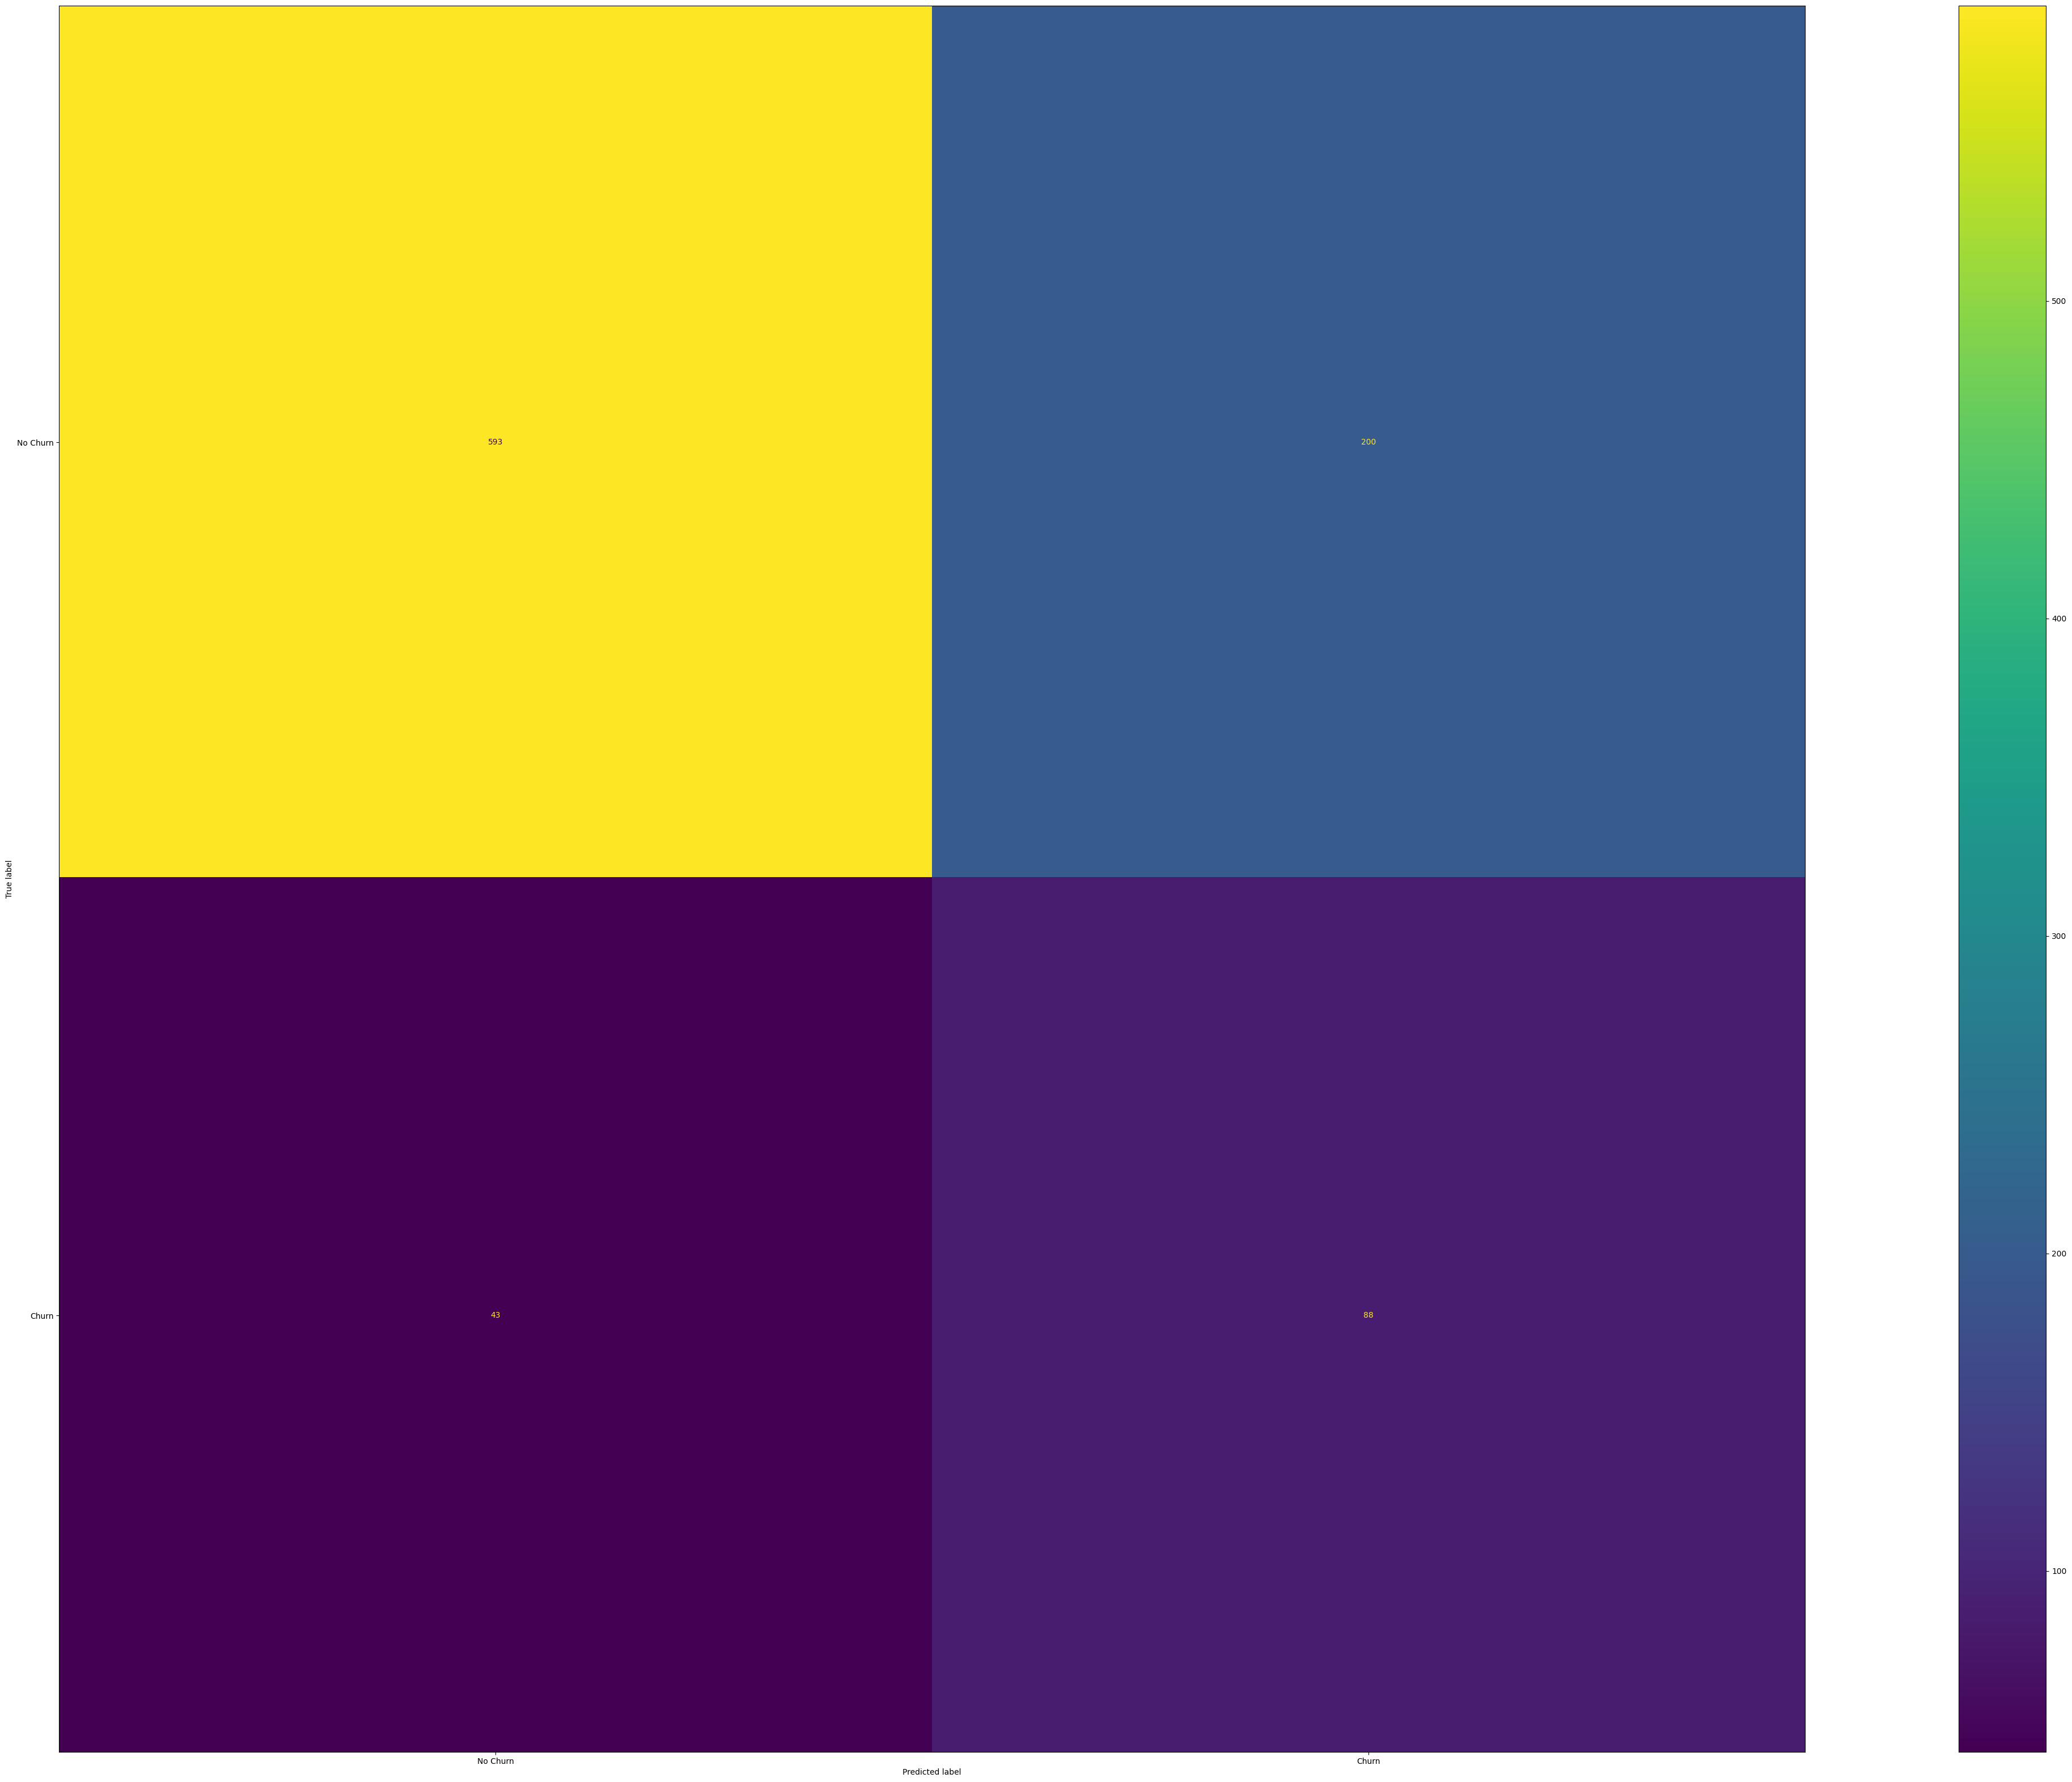

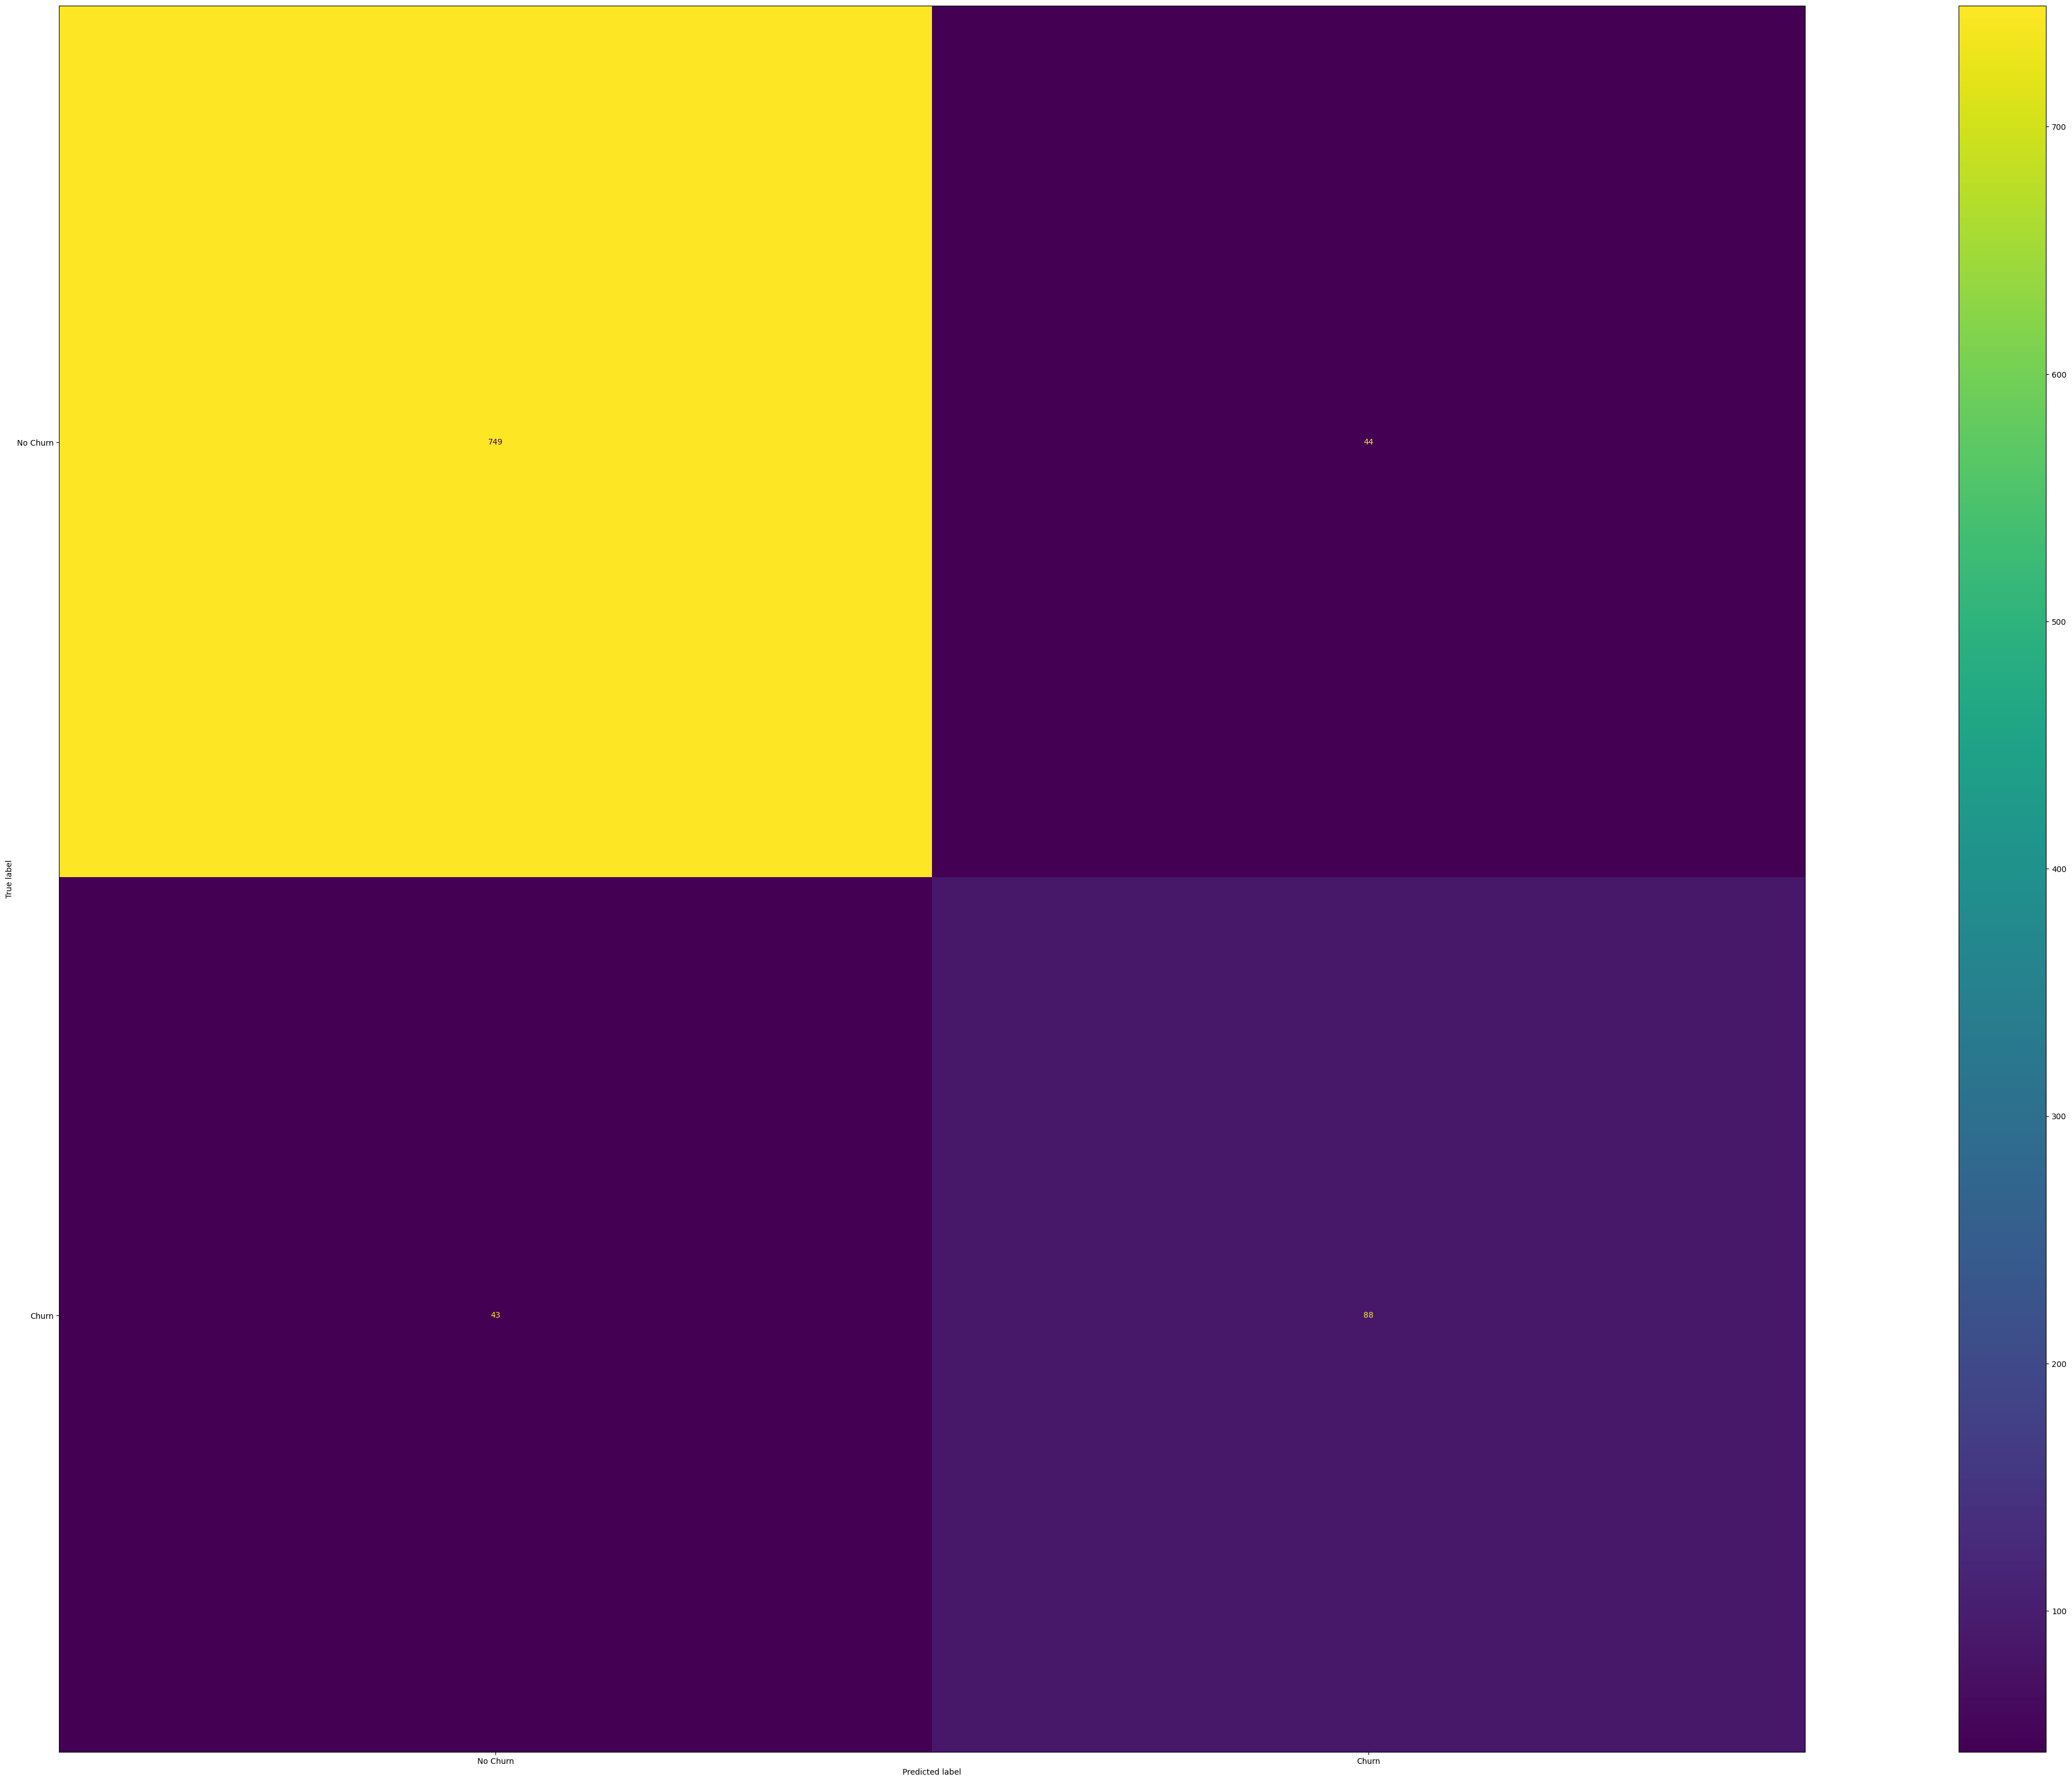

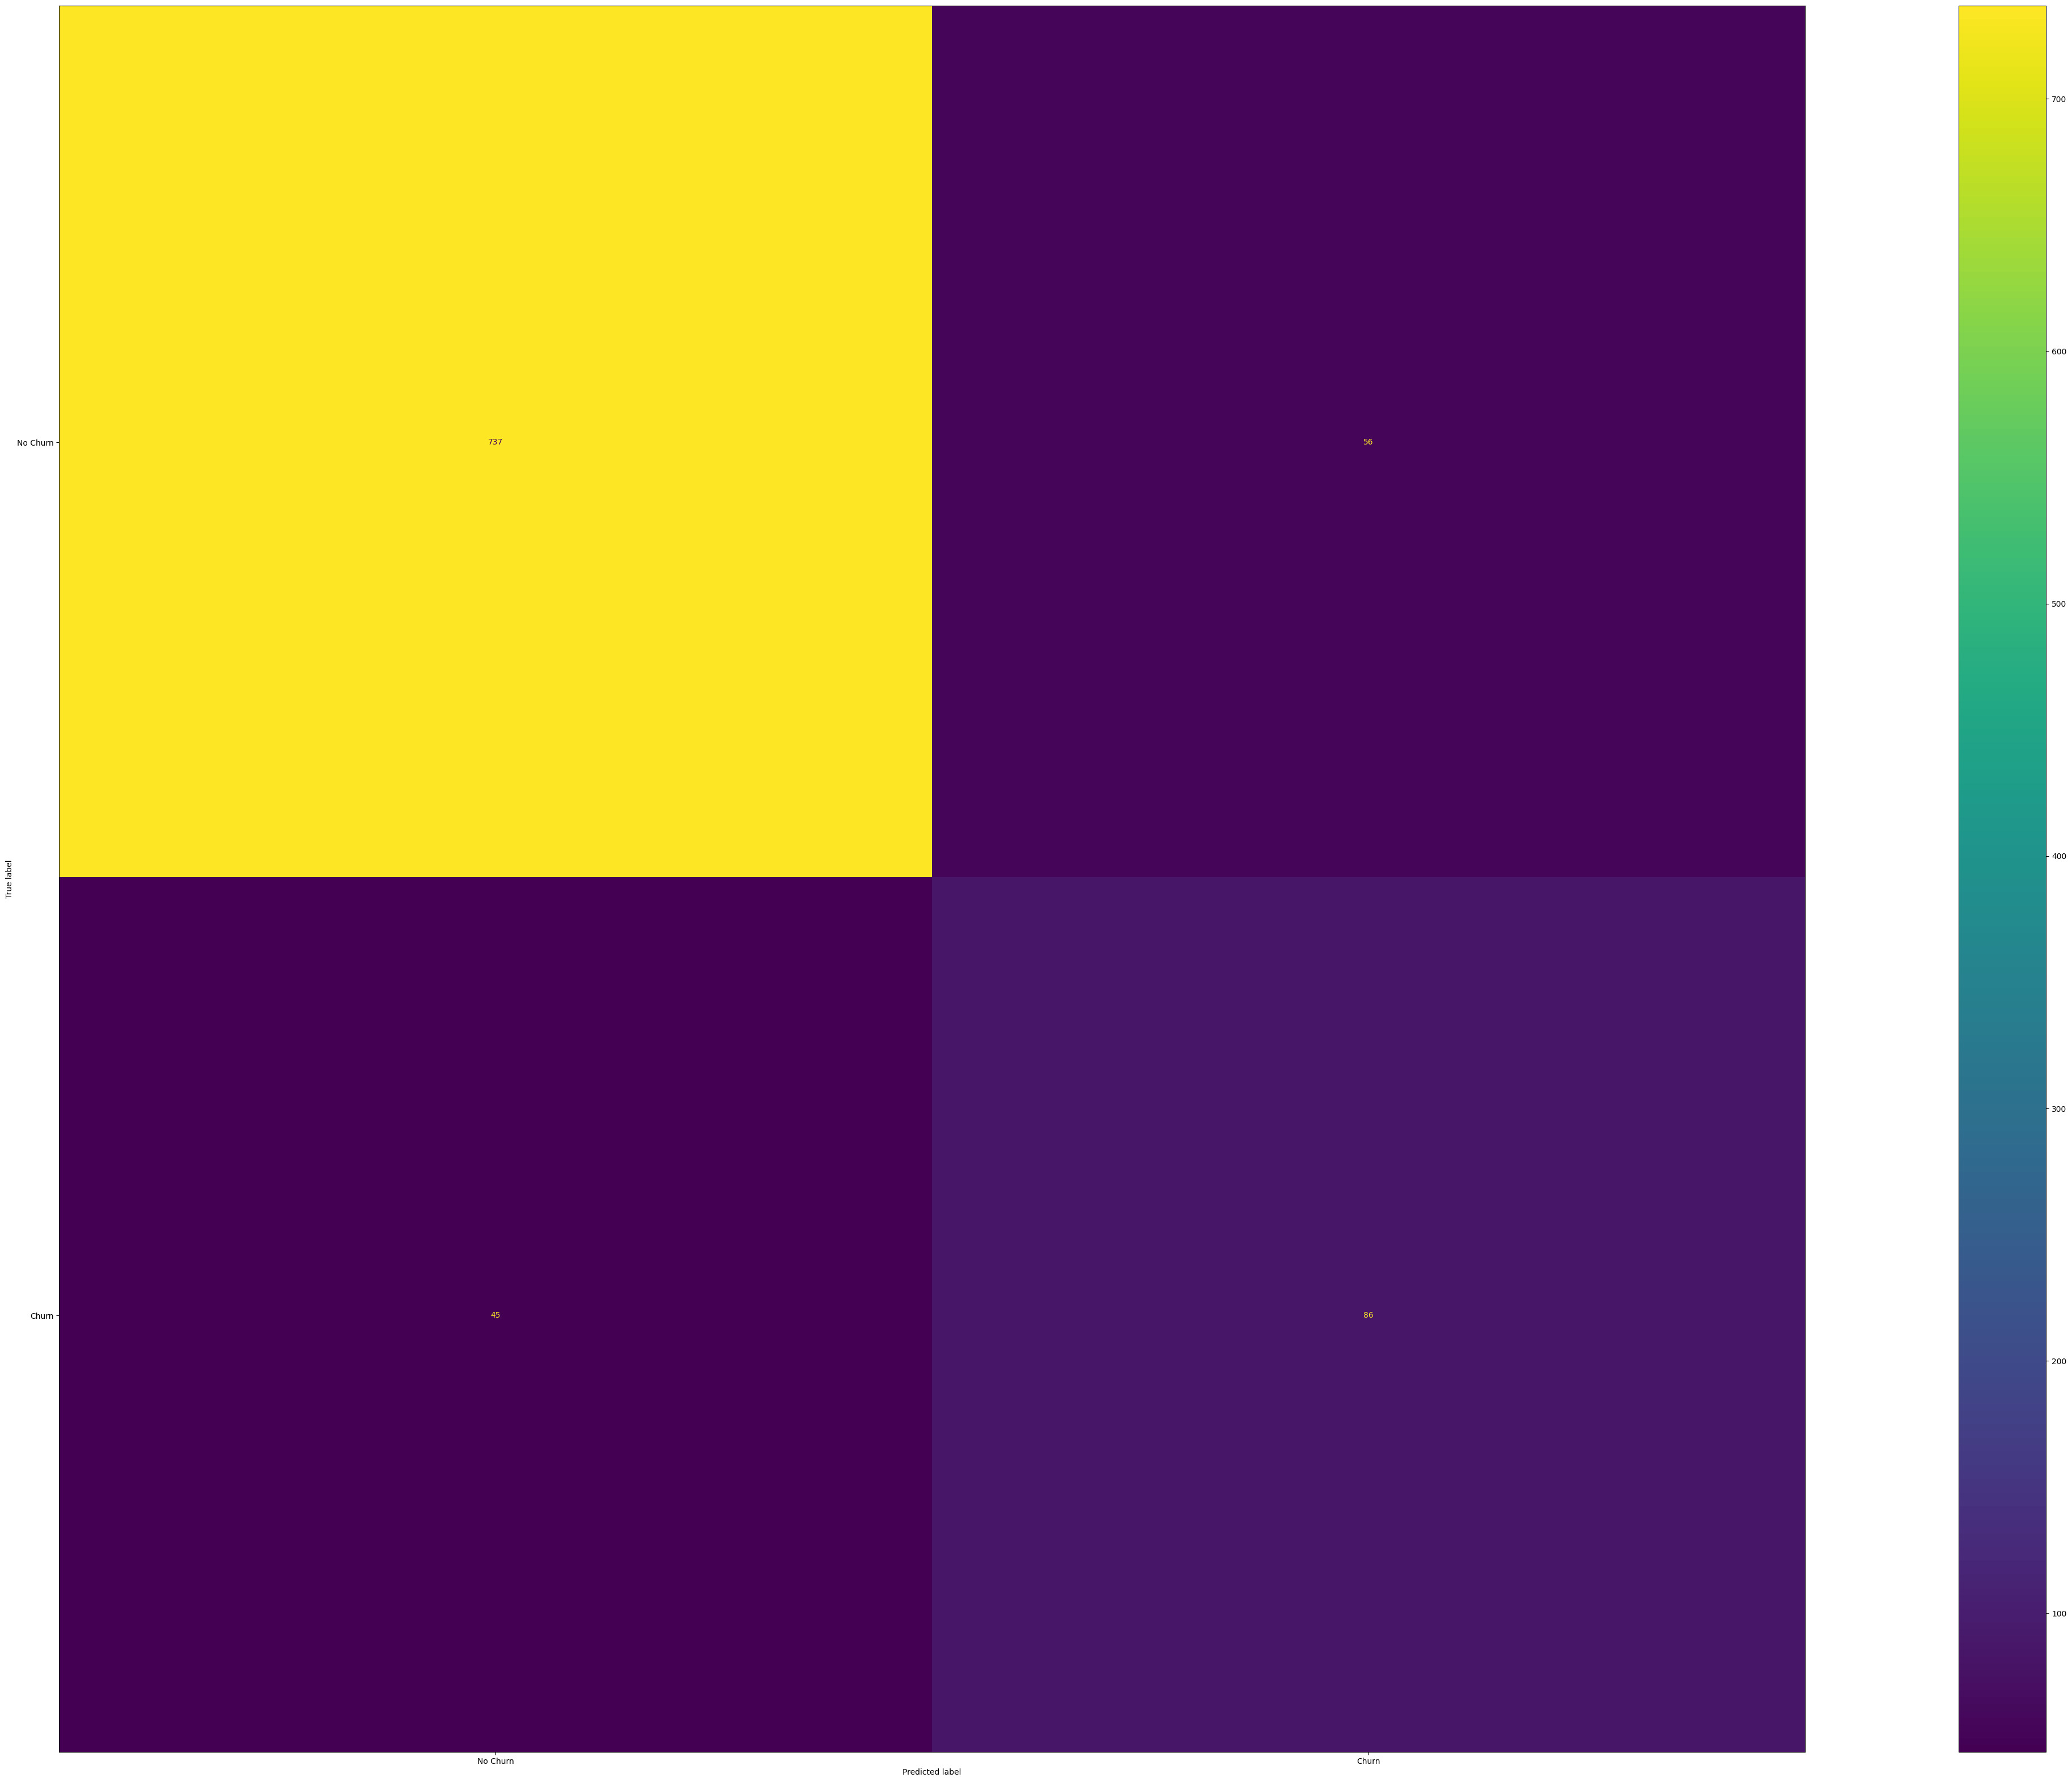

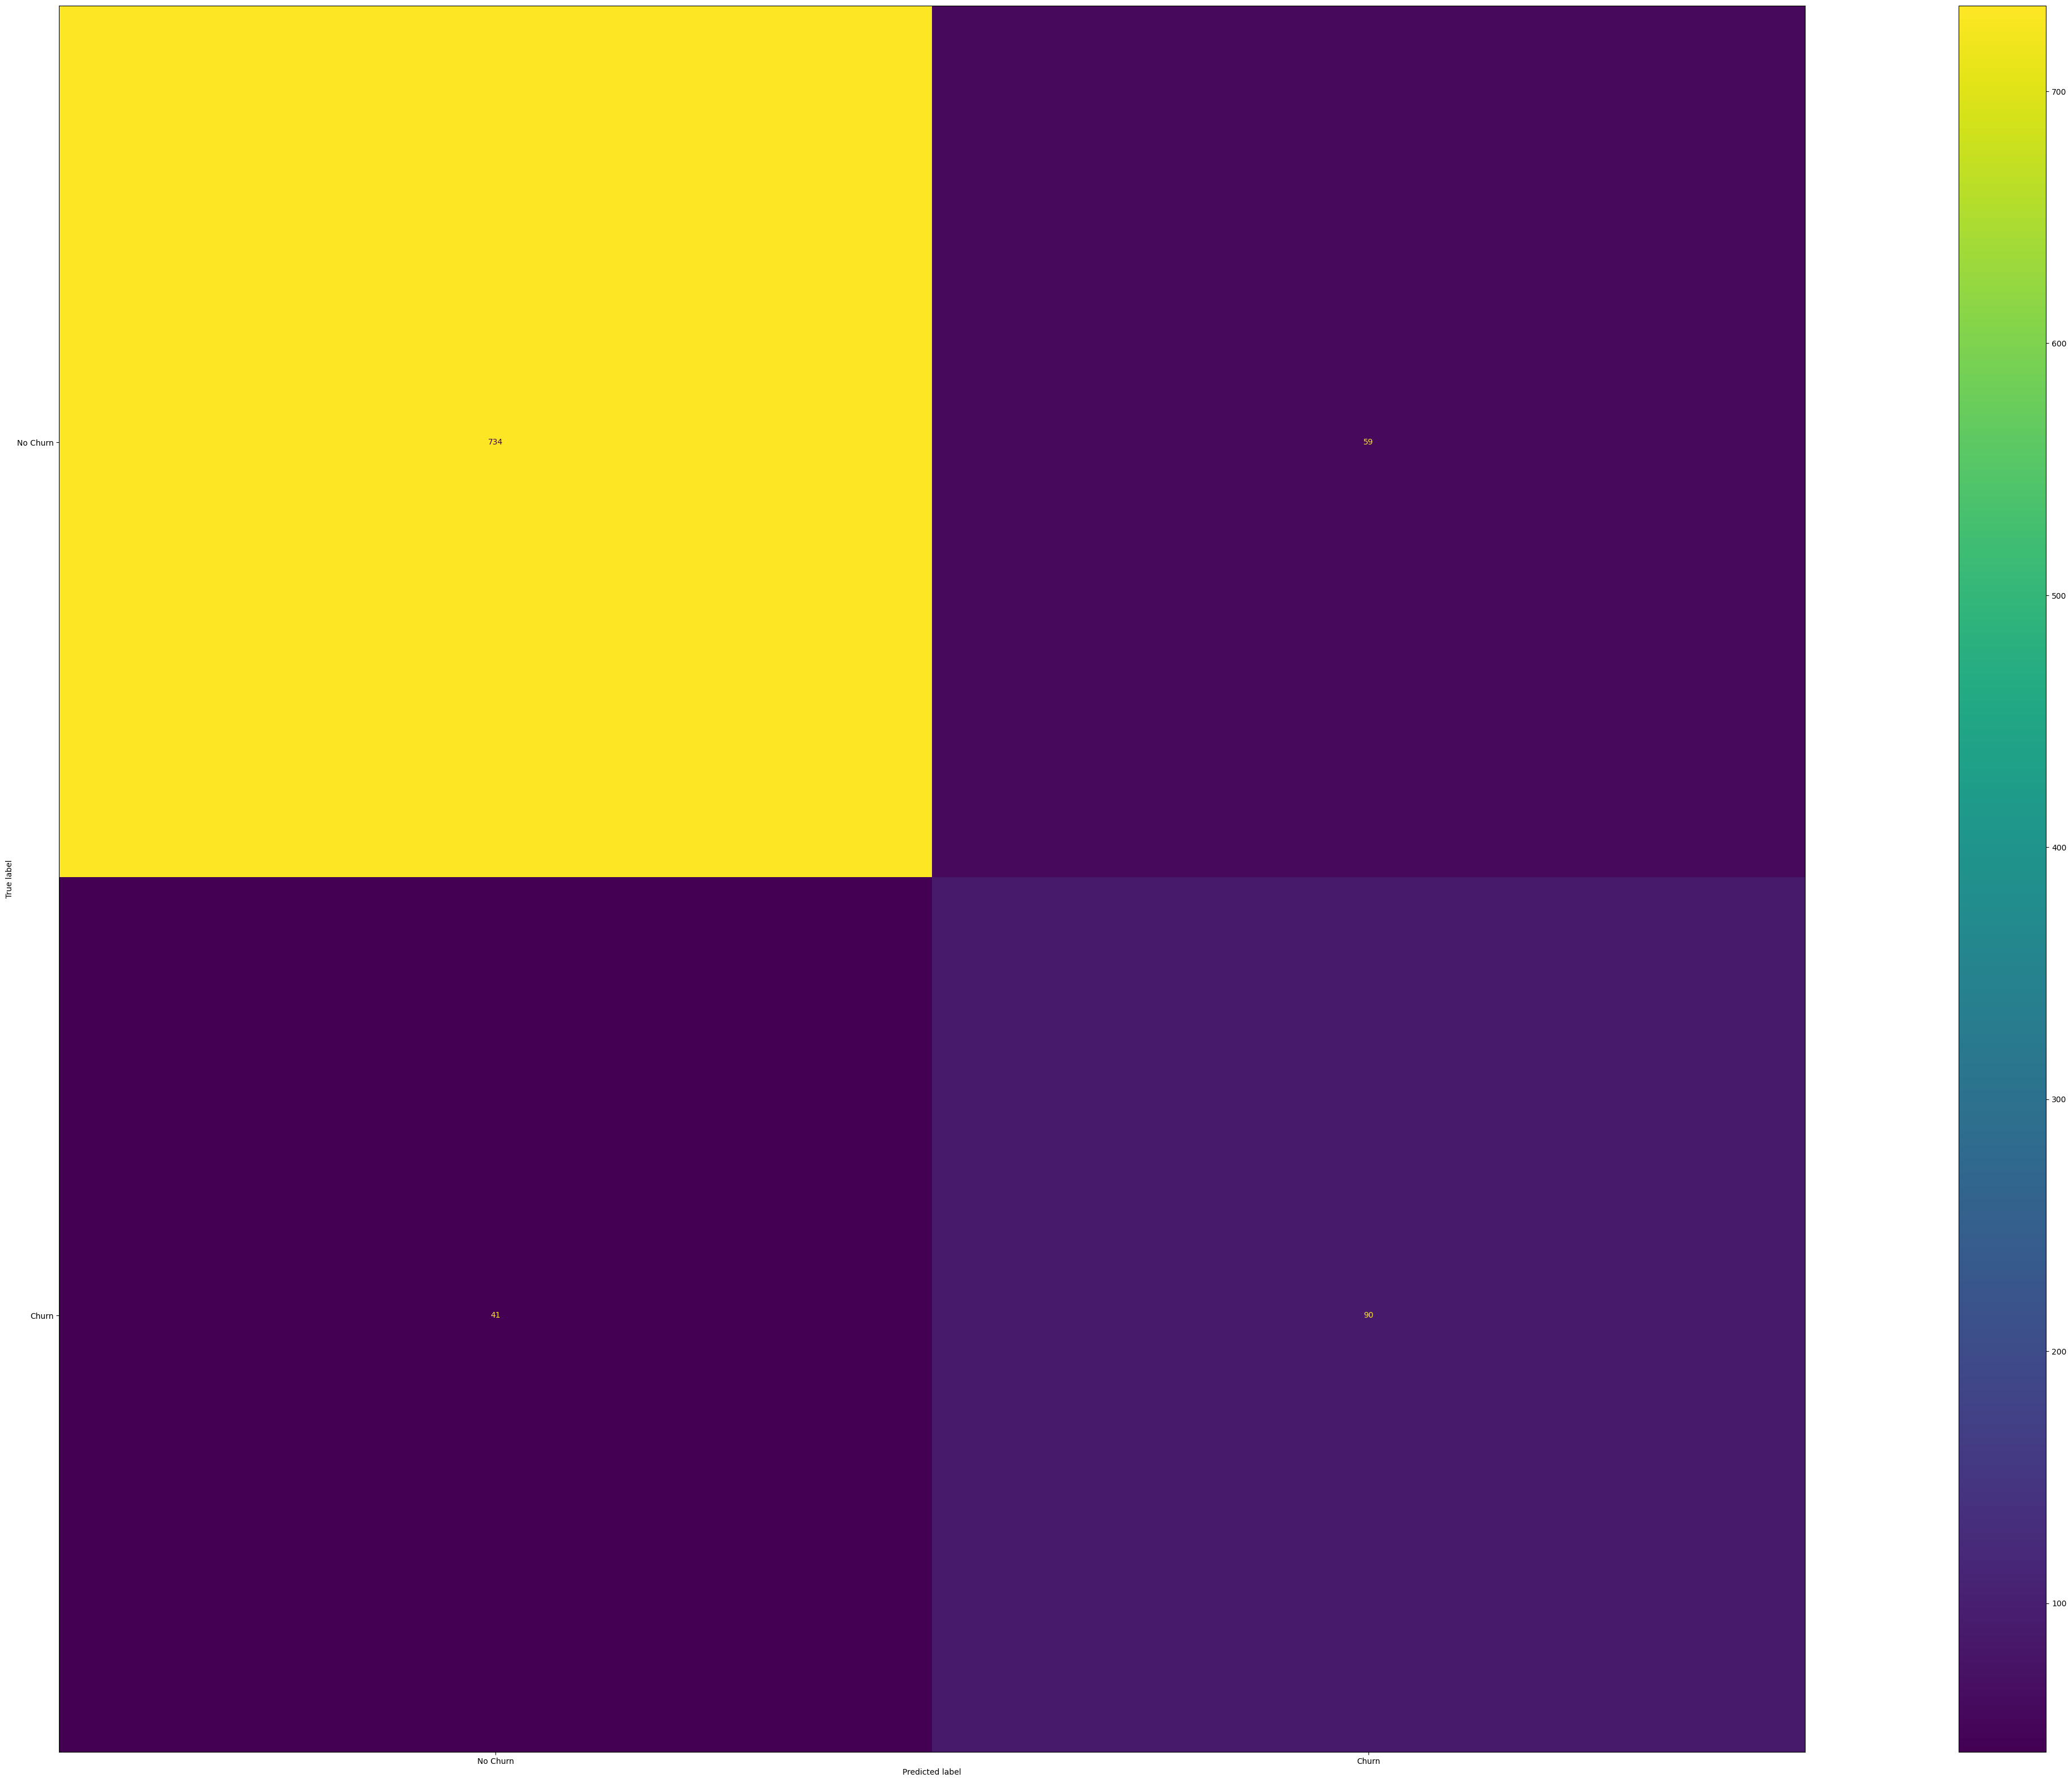

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train Models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42)
}

model_results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
    
    model_results[model_name] = {
        'roc_auc': roc_auc,
        'classification_report': report,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Step 3: Display Results
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"ROC AUC: {results['roc_auc']}")
    print("Classification Report:")
    print(results['classification_report'])
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results['confusion_matrix'], display_labels=['No Churn', 'Churn']).plot()
    print("-" * 50)


Although SMOTE is a popular method for balancing classes, it can sometimes lead to overfitting. Other techniques like ADASYN or NearMiss might give different results.

In [78]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Train models on the resampled data
for model_name, model in models.items():
    print(f"Training {model_name} with ADASYN...")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
    
    print(f"ROC AUC: {roc_auc}")
    print("Classification Report:")
    print(report)
    print("-" * 50)


Training Logistic Regression with ADASYN...
ROC AUC: 0.7616260600868283
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.93      0.75      0.83       793
       Churn       0.30      0.65      0.41       131

    accuracy                           0.74       924
   macro avg       0.61      0.70      0.62       924
weighted avg       0.84      0.74      0.77       924

--------------------------------------------------
Training Random Forest with ADASYN...
ROC AUC: 0.8798022775622575
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.94      0.94      0.94       793
       Churn       0.63      0.63      0.63       131

    accuracy                           0.90       924
   macro avg       0.79      0.79      0.79       924
weighted avg       0.90      0.90      0.90       924

--------------------------------------------------
Training Gradient Boosting with ADASYN...
ROC AUC: 0.8772080

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Randomized search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      rf_param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random_search.fit(X_resampled, y_resampled)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", rf_random_search.best_params_)

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]  # Adjust for imbalanced data
}

# Randomized search for XGBoost
xgb_random_search = RandomizedSearchCV(XGBClassifier(random_state=42),
                                       xgb_param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_resampled, y_resampled)

# Best parameters for XGBoost
print("Best parameters for XGBoost:", xgb_random_search.best_params_)


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None, 'class_weight': 'balanced'}
Best parameters for XGBoost: {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [81]:
from sklearn.ensemble import VotingClassifier

In [82]:
# 2. Threshold Adjustment Function (same as before)
def adjust_threshold(model, X_test, y_test, threshold=0.3):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)  # Adjust predictions
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred_adjusted, target_names=['No Churn', 'Churn'])
    return roc_auc, report

# 3. Evaluate Random Forest with adjusted threshold
rf_best = RandomForestClassifier(n_estimators=200, min_samples_split=2, max_depth=None, class_weight='balanced', random_state=42)
rf_best.fit(X_resampled, y_resampled)
roc_auc_rf, report_rf = adjust_threshold(rf_best, X_test, y_test, threshold=0.3)

# 4. Evaluate XGBoost with adjusted threshold
xgb_best = XGBClassifier(subsample=0.9, scale_pos_weight=1, n_estimators=300, max_depth=7, learning_rate=0.05, colsample_bytree=0.7, random_state=42)
xgb_best.fit(X_resampled, y_resampled)
roc_auc_xgb, report_xgb = adjust_threshold(xgb_best, X_test, y_test, threshold=0.3)

# 5. Ensemble Method - Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('xgb', xgb_best)
], voting='soft')

voting_clf.fit(X_resampled, y_resampled)
roc_auc_voting, report_voting = adjust_threshold(voting_clf, X_test, y_test, threshold=0.3)

# Print results
print("Random Forest - ROC AUC:", roc_auc_rf)
print(report_rf)

print("XGBoost - ROC AUC:", roc_auc_xgb)
print(report_xgb)

print("Voting Classifier - ROC AUC:", roc_auc_voting)
print(report_voting)


Random Forest - ROC AUC: 0.8807167679023516
              precision    recall  f1-score   support

    No Churn       0.97      0.87      0.91       793
       Churn       0.50      0.83      0.63       131

    accuracy                           0.86       924
   macro avg       0.74      0.85      0.77       924
weighted avg       0.90      0.86      0.87       924

XGBoost - ROC AUC: 0.8744549156262335
              precision    recall  f1-score   support

    No Churn       0.95      0.93      0.94       793
       Churn       0.62      0.68      0.65       131

    accuracy                           0.90       924
   macro avg       0.78      0.81      0.79       924
weighted avg       0.90      0.90      0.90       924

Voting Classifier - ROC AUC: 0.8804424208003235
              precision    recall  f1-score   support

    No Churn       0.95      0.91      0.93       793
       Churn       0.56      0.70      0.62       131

    accuracy                           0.88       92